
### Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from statistics import mean, stdev
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer

### Importing Required Datasets

In [3]:
# Reading all the Datasets
hgen = pd.read_csv(r'C:\Users\pragy\Downloads\Healthcare Project\Hospital General Information.csv', encoding='cp1252')
hreadmissions_death = pd.read_csv(r'C:\Users\pragy\Downloads\Healthcare Project\Readmissions and Deaths - Hospital.csv')
hcomplications = pd.read_csv(r'C:\Users\pragy\Downloads\Healthcare Project\Complications - Hospital.csv')
htimely_effective_care = pd.read_csv(r'C:\Users\pragy\Downloads\Healthcare Project\Timely and Effective Care - Hospital.csv')
hinfections = pd.read_csv(r'C:\Users\pragy\Downloads\Healthcare Project\Healthcare Associated Infections - Hospital.csv')
himaging = pd.read_csv(r'C:\Users\pragy\Downloads\Healthcare Project\Outpatient Imaging Efficiency - Hospital.csv')
hHCAHPS = pd.read_csv(r'C:\Users\pragy\Downloads\Healthcare Project\HCAHPS - Hospital.csv', encoding='cp1252')

In [4]:
#Inspecting Data Hospital_General_Information
hgen.head()

Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON    3344933541  Acute Care Hospitals   
4   LUVERNE    AL     36049    CRENSHAW    3343353374  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Meets criteria for meaningful use of EHRs Hospital overall rating  \
0                                         Y                       3   
1                                         Y                       3   
2                                         Y                       2   
3                                         Y                       3   
4                                         Y                       3   

  Hospital overall rating footnote Mortality national comparison  \
0                              NaN  Same as the National average   
1                              NaN    Below the National average   
2                              NaN    Below the National average   
3                              NaN  Same as the National average   
4                              NaN  Same as the National average   

  Mortality national comparison footnote Safety of care national comparison  \
0                                    NaN         Above the National average   
1                                    NaN       Same as the National average   
2                                    NaN       Same as the National average   
3                                    NaN       Same as the National average   
4                                    NaN                      Not Available   

         Safety of care national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Results are not available for this reporting p...   

  Readmission national comparison Readmission national comparison footnote  \
0    Same as the National average                                      NaN   
1      Above the National average                                      NaN   
2    Same as the National average                                      NaN   
3      Below the National average                                      NaN   
4    Same as the National average                                      NaN   

  Patient experience national comparison  \
0             Below the National average   
1           Same as the National average   
2             Below the National average   
3           Same as the National average   
4                          Not Available   

     Patient experience national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                         

 We observed that there are many "Not Available" values  in all the datasets, let's impute them with np.NaN

In [5]:
# Imputing datasets with Nan
hgen = hgen.replace('Not Available', np.NaN)
hreadmissions_death = hreadmissions_death.replace('Not Available', np.NaN)
hcomplications = hcomplications.replace('Not Available', np.NaN)
htimely_effective_care = htimely_effective_care.replace('Not Available', np.NaN)
hinfections = hinfections.replace('Not Available', np.NaN)
himaging = himaging.replace('Not Available', np.NaN)
hHCAHPS = hHCAHPS.replace('Not Available', np.NaN)

In [6]:
# Shape of hospital general information dataset
hgen.shape

(4818, 28)

In [7]:
# Info of hospital general informal dataset
hgen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4818 non-null   int64 
 1   Hospital Name                                                  4818 non-null   object
 2   Address                                                        4818 non-null   object
 3   City                                                           4818 non-null   object
 4   State                                                          4818 non-null   object
 5   ZIP Code                                                       4818 non-null   int64 
 6   County Name                                                    4803 non-null   object
 7   Phone Number                                                   4818 n

 Most of the columns are object type and only three of them are integer types.

In [8]:
# Removing Unnecessary Columns
del_cols = ['Address', 'ZIP Code', 'City', 'County Name', 'Phone Number', 'State']
hgen.drop(columns=del_cols, axis=1, inplace=True)

We also can observe that there are multiple footnote type columns, which are not required for our analysis

In [9]:
# Removing footnote columns
footnote_columns = []
for col in hgen:
    if 'footnote' in col:
        footnote_columns.append(col)
hgen.drop(footnote_columns,axis = 1, inplace=True)
hgen.head()

Provider ID                     Hospital Name         Hospital Type  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  Acute Care Hospitals   
1        10005     MARSHALL MEDICAL CENTER SOUTH  Acute Care Hospitals   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL  Acute Care Hospitals   
3        10007          MIZELL MEMORIAL HOSPITAL  Acute Care Hospitals   
4        10008       CRENSHAW COMMUNITY HOSPITAL  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Meets criteria for meaningful use of EHRs Hospital overall rating  \
0                                         Y                       3   
1                                         Y                       3   
2                                         Y                       2   
3                                         Y                       3   
4                                         Y                       3   

  Mortality national comparison Safety of care national comparison  \
0  Same as the National average         Above the National average   
1    Below the National average       Same as the National average   
2    Below the National average       Same as the National average   
3  Same as the National average       Same as the National average   
4  Same as the National average                                NaN   

  Readmission national comparison Patient experience national comparison  \
0    Same as the National average             Below the National average   
1      Above the National average           Same as the National average   
2    Same as the National average             Below the National average   
3      Below the National average           Same as the National average   
4    Same as the National average                                    NaN   

  Effectiveness of care national comparison  \
0              Same as the National average   
1              Same as the National average   
2              Same as the National average   
3              Same as the National average   
4              Same as the National average   

  Timeliness of care national comparison  \
0           Same as the National average   
1             Above the National average   
2             Above the National average   
3             Above the National average   
4             Above the National average   

  Efficient use of medical imaging national comparison  
0                       Same as the National average    
1                         Below the National average    
2                       Same as the National average    
3                                                NaN    
4                                                NaN

In [10]:
#Insepcting column - 'Meets criteria for meaningful use of EHRs'
hgen['Meets criteria for meaningful use of EHRs'].value_counts(normalize=True)*100

Y    100.0
Name: Meets criteria for meaningful use of EHRs, dtype: float64

In [11]:
# Since all records are Y this columns is not of any use to us
hgen.drop('Meets criteria for meaningful use of EHRs',axis=1, inplace=True)
hgen.head(5)

Provider ID                     Hospital Name         Hospital Type  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  Acute Care Hospitals   
1        10005     MARSHALL MEDICAL CENTER SOUTH  Acute Care Hospitals   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL  Acute Care Hospitals   
3        10007          MIZELL MEMORIAL HOSPITAL  Acute Care Hospitals   
4        10008       CRENSHAW COMMUNITY HOSPITAL  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Hospital overall rating Mortality national comparison  \
0                       3  Same as the National average   
1                       3    Below the National average   
2                       2    Below the National average   
3                       3  Same as the National average   
4                       3  Same as the National average   

  Safety of care national comparison Readmission national comparison  \
0         Above the National average    Same as the National average   
1       Same as the National average      Above the National average   
2       Same as the National average    Same as the National average   
3       Same as the National average      Below the National average   
4                                NaN    Same as the National average   

  Patient experience national comparison  \
0             Below the National average   
1           Same as the National average   
2             Below the National average   
3           Same as the National average   
4                                    NaN   

  Effectiveness of care national comparison  \
0              Same as the National average   
1              Same as the National average   
2              Same as the National average   
3              Same as the National average   
4              Same as the National average   

  Timeliness of care national comparison  \
0           Same as the National average   
1             Above the National average   
2             Above the National average   
3             Above the National average   
4             Above the National average   

  Efficient use of medical imaging national comparison  
0                       Same as the National average    
1                         Below the National average    
2                       Same as the National average    
3                                                NaN    
4                                                NaN

Apart from Hospital_General_Information there are 6 more measures, let's Review them one by one

#### 1.1)  GROUP 1 - MORTALITY 

We can find the data for the Mortality in two datasets - 
- Readmissions and Deaths Datasets
- Complications Dataset

In [12]:
# Inspecting the Readmissions & Deaths Datsets
hreadmissions_death.head(5)

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name    Measure ID  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2  Death rate for chronic obstructive pulmonary d...  MORT_30_COPD   
3           Heart failure (HF) 30-Day Mortality Rate    MORT_30_HF   
4               Pneumonia (PN) 30-Day Mortality Rate    MORT_30_PN   

                  Compared to National Denominator Score Lower Estimate  \
0  No Different than the National Rate         733  12.5           10.6   
1  No Different than the National Rate         278   4.2            2.6   
2  No Different than the National Rate         586   9.3            7.3   
3  No Different than the National Rate         797  12.4           10.4   
4  No Different than the National Rate         599  15.5           13.0   

  Higher Estimate Footnote Measure Start Date Measure End Date  
0            14.9      NaN         07/01/2012       06/30/2015  
1             6.8      NaN         07/01/2012       06/30/2015  
2            11.8      NaN         07/01/2012       06/30/2015  
3            14.6      NaN         07/01/2012       06/30/2015  
4            18.5      NaN         07/01/2012       06/30/2015

In [13]:
#Inspecting the Complications Dataset
hcomplications.head(5)

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name  \
0  Rate of complications for hip/knee replacement...   
1                  Serious blood clots after surgery   
2               Blood stream infection after surgery   
3  A wound that splits open  after surgery on the...   
4   Accidental cuts and tears from medical treatment   

                  Measure ID                 Compared to National Denominator  \
0              COMP_HIP_KNEE  No Different than the National Rate         331   
1  PSI_12_POSTOP_PULMEMB_DVT  No Different than the National Rate        4549   
2         PSI_13_POST_SEPSIS  No Different than the National Rate         578   
3        PSI_14_POSTOP_DEHIS  No Different than the National Rate         445   
4             PSI_15_ACC_LAC  No Different than the National Rate       16429   

  Score Lower Estimate Higher Estimate Footnote Measure Start Date  \
0   3.8            2.6             5.5      NaN         04/01/2012   
1  3.32           1.25            5.38      NaN         07/01/2013   
2  5.72           0.00           11.48      NaN         07/01/2013   
3  2.72           0.65            4.79      NaN         07/01/2013   
4  1.35           0.76            1.95      NaN         07/01/2013   

  Measure End Date  
0       03/31/2015  
1       06/30/2015  
2       06/30/2015  
3       06/30/2015  
4       06/30/2015

Both datasets are having similar columns

In [14]:
#Removing Unwanted columns
del_cols_1 = ['Address', 'City', 'State', 'ZIP Code', 
               'County Name', 'Phone Number', 'Footnote', 
               'Measure Start Date', 'Measure End Date']
hreadmissions_death.drop(del_cols_1, axis=1, inplace=True)
hcomplications.drop(del_cols_1, axis=1, inplace=True)

In [15]:
hreadmissions_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           67452 non-null  int64 
 1   Hospital Name         67452 non-null  object
 2   Measure Name          67452 non-null  object
 3   Measure ID            67452 non-null  object
 4   Compared to National  52902 non-null  object
 5   Denominator           41710 non-null  object
 6   Score                 41710 non-null  object
 7   Lower Estimate        41710 non-null  object
 8   Higher Estimate       41710 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [16]:
hcomplications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           52998 non-null  int64 
 1   Hospital Name         52998 non-null  object
 2   Measure Name          52998 non-null  object
 3   Measure ID            52998 non-null  object
 4   Compared to National  34588 non-null  object
 5   Denominator           27900 non-null  object
 6   Score                 31124 non-null  object
 7   Lower Estimate        31124 non-null  object
 8   Higher Estimate       31124 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


In [17]:
# Looks like important column "Score" is not numeric type, let's convert it to numeric
hreadmissions_death['Score'] = pd.to_numeric(hreadmissions_death['Score'])
hcomplications['Score'] = pd.to_numeric(hcomplications['Score'])

In [18]:
##### Creating PIVOT summaries for above 2 datasets:
hreadmissions_death_PIVOT = pd.pivot_table(hreadmissions_death, index='Provider ID', columns = 'Measure ID', values='Score')
hreadmissions_death_PIVOT.head(5)

Measure ID   MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  MORT_30_PN  \
Provider ID                                                                    
10001               12.5           4.2           9.3        12.4        15.5   
10005               16.0           NaN           7.6        15.5        20.8   
10006               16.7           4.1           7.1        15.6        18.2   
10007                NaN           NaN           9.3        14.4        18.8   
10008                NaN           NaN           8.2        12.7        15.7   

Measure ID   MORT_30_STK  READM_30_AMI  READM_30_CABG  READM_30_COPD  \
Provider ID                                                            
10001               15.4          16.5           15.1           21.1   
10005               15.5          16.7            NaN           18.0   
10006               17.9          16.1           15.2           19.8   
10007               16.6           NaN            NaN           19.9   
10008                NaN           NaN            NaN           19.2   

Measure ID   READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  READM_30_PN  \
Provider ID                                                                    
10001               21.4                5.1                15.4         18.7   
10005               21.9                5.7                14.9         16.4   
10006               20.6                5.0                15.4         17.9   
10007               21.1                NaN                16.6         17.3   
10008               23.1                NaN                15.7         16.0   

Measure ID   READM_30_STK  
Provider ID                
10001                12.7  
10005                13.4  
10006                12.0  
10007                12.7  
10008                 NaN

In [19]:
hcomplications_PIVOT = pd.pivot_table(hcomplications, index='Provider ID', columns = 'Measure ID', values='Score')
hcomplications_PIVOT.head(5)

Measure ID   COMP_HIP_KNEE  PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  \
Provider ID                                                                 
10001                  3.8                       3.32                5.72   
10005                  3.0                       5.63                9.18   
10006                  3.8                       3.85                 NaN   
10007                  NaN                       4.57                9.89   
10008                  NaN                        NaN                 NaN   

Measure ID   PSI_14_POSTOP_DEHIS  PSI_15_ACC_LAC  PSI_3_ULCER  \
Provider ID                                                     
10001                       2.72            1.35         0.07   
10005                       2.11            1.25         0.14   
10006                       2.50            1.93         0.09   
10007                        NaN            1.20         0.35   
10008                        NaN            1.41         0.45   

Measure ID   PSI_4_SURG_COMP  PSI_6_IAT_PTX  PSI_7_CVCBI  PSI_8_POST_HIP  \
Provider ID                                                                
10001                 168.26           0.36         0.12            0.06   
10005                 179.05           0.47         0.11            0.06   
10006                 198.33           0.41         0.24            0.06   
10007                    NaN           0.40         0.16            0.06   
10008                    NaN           0.41         0.17             NaN   

Measure ID   PSI_90_SAFETY  
Provider ID                 
10001                 0.68  
10005                 0.85  
10006                 0.91  
10007                 0.79  
10008                 0.90

In [20]:
# Making list of the significant measures useful for our further analysis
mortality_hdeath = ['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 
                         'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK']
mortality_hcomplications = ['PSI_4_SURG_COMP']

temp_df_1 = hreadmissions_death_PIVOT[mortality_hdeath]
temp_df_2 = hcomplications_PIVOT[mortality_hcomplications]

# merging the above into final dataframe
mortality_final = pd.concat([temp_df_1, temp_df_2], axis=1)
mortality_final.head(5)

Measure ID   MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  MORT_30_PN  \
Provider ID                                                                    
10001               12.5           4.2           9.3        12.4        15.5   
10005               16.0           NaN           7.6        15.5        20.8   
10006               16.7           4.1           7.1        15.6        18.2   
10007                NaN           NaN           9.3        14.4        18.8   
10008                NaN           NaN           8.2        12.7        15.7   

Measure ID   MORT_30_STK  PSI_4_SURG_COMP  
Provider ID                                
10001               15.4           168.26  
10005               15.5           179.05  
10006               17.9           198.33  
10007               16.6              NaN  
10008                NaN              NaN

In [21]:
# Renaming the columns to uniquely identify measures in MORTALITY group
mortality_final.rename(columns={'MORT_30_AMI':'Mortality_MORT_30_AMI', 
                                'MORT_30_CABG':'Mortality_MORT_30_CABG', 
                                'MORT_30_COPD':'Mortality_MORT_30_COPD', 
                                'MORT_30_HF':'Mortality_MORT_30_HF', 
                                'MORT_30_PN':'Mortality_MORT_30_PN', 
                                'MORT_30_STK':'Mortality_MORT_30_STK',
                                'PSI_4_SURG_COMP':'Mortality_PSI_4_SURG_COMP'}, 
                       inplace=True)
mortality_final.head(5)

Measure ID   Mortality_MORT_30_AMI  Mortality_MORT_30_CABG  \
Provider ID                                                  
10001                         12.5                     4.2   
10005                         16.0                     NaN   
10006                         16.7                     4.1   
10007                          NaN                     NaN   
10008                          NaN                     NaN   

Measure ID   Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   
10007                           9.3                  14.4   
10008                           8.2                  12.7   

Measure ID   Mortality_MORT_30_PN  Mortality_MORT_30_STK  \
Provider ID                                                
10001                        15.5                   15.4   
10005                        20.8                   15.5   
10006                        18.2                   17.9   
10007                        18.8                   16.6   
10008                        15.7                    NaN   

Measure ID   Mortality_PSI_4_SURG_COMP  
Provider ID                             
10001                           168.26  
10005                           179.05  
10006                           198.33  
10007                              NaN  
10008                              NaN

In [22]:
hgen.set_index('Provider ID', inplace=True)

In [23]:
# Merging Mortality_final dataset to main hgen data
hgen = pd.concat([hgen,mortality_final],axis=1)
hgen.head(3)

Hospital Name         Hospital Type  \
Provider ID                                                           
10001        SOUTHEAST ALABAMA MEDICAL CENTER  Acute Care Hospitals   
10005           MARSHALL MEDICAL CENTER SOUTH  Acute Care Hospitals   
10006          ELIZA COFFEE MEMORIAL HOSPITAL  Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   

            Hospital overall rating Mortality national comparison  \
Provider ID                                                         
10001                             3  Same as the National average   
10005                             3    Below the National average   
10006                             2    Below the National average   

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   
10006             Same as the National average   

            Readmission national comparison  \
Provider ID                                   
10001          Same as the National average   
10005            Above the National average   
10006          Same as the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   
10006                   Below the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   
10006                    Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   
10006                   Above the National average   

            Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     
10006                             Same as the National average     

             Mortality_MORT_30_AMI  Mortality_MORT_30_CABG  \
Provider ID                                                  
10001                         12.5                     4.2   
10005                         16.0                     NaN   
10006                         16.7                     4.1   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Mortality_MORT_30_STK  \
Provider ID                                                
10001                        15.5                   15.4   
10005                        20.8                   15.5   
10006                        18.2                   17.9   

             Mortality_PSI_4_SURG_COMP  
Provider ID                             
10001                           168.26  
10005                           179.05  
10006                           198.33

#### 1.2)  GROUP 2 - READMISSION

In [24]:
# We have already created pivots for readmission "hreadmissions_death_PIVOT" , let's look at ir
hreadmissions_death_PIVOT.head(5)

Measure ID   MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  MORT_30_PN  \
Provider ID                                                                    
10001               12.5           4.2           9.3        12.4        15.5   
10005               16.0           NaN           7.6        15.5        20.8   
10006               16.7           4.1           7.1        15.6        18.2   
10007                NaN           NaN           9.3        14.4        18.8   
10008                NaN           NaN           8.2        12.7        15.7   

Measure ID   MORT_30_STK  READM_30_AMI  READM_30_CABG  READM_30_COPD  \
Provider ID                                                            
10001               15.4          16.5           15.1           21.1   
10005               15.5          16.7            NaN           18.0   
10006               17.9          16.1           15.2           19.8   
10007               16.6           NaN            NaN           19.9   
10008                NaN           NaN            NaN           19.2   

Measure ID   READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  READM_30_PN  \
Provider ID                                                                    
10001               21.4                5.1                15.4         18.7   
10005               21.9                5.7                14.9         16.4   
10006               20.6                5.0                15.4         17.9   
10007               21.1                NaN                16.6         17.3   
10008               23.1                NaN                15.7         16.0   

Measure ID   READM_30_STK  
Provider ID                
10001                12.7  
10005                13.4  
10006                12.0  
10007                12.7  
10008                 NaN

In [25]:
# We need only below required columns in readmissions:
readmission_death_cols = ['READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD', 'READM_30_HIP_KNEE']

In [26]:
# Taking the required columns from the dataset
readmissions_final = hreadmissions_death_PIVOT[readmission_death_cols]
readmissions_final.head(5)

Measure ID   READM_30_AMI  READM_30_CABG  READM_30_COPD  READM_30_HIP_KNEE
Provider ID                                                               
10001                16.5           15.1           21.1                5.1
10005                16.7            NaN           18.0                5.7
10006                16.1           15.2           19.8                5.0
10007                 NaN            NaN           19.9                NaN
10008                 NaN            NaN           19.2                NaN

In [27]:
# Renaming the columns
readmissions_final.rename(columns={'READM_30_AMI':'Readmissions_READM_30_AMI', 
                                   'READM_30_CABG':'Readmissions_READM_30_CABG',
                                   'READM_30_COPD':'Readmissions_READM_30_COPD', 
                                   'READM_30_HIP_KNEE':'Readmissions_READM_30_HIP_KNEE'}, 
                       inplace=True)
readmissions_final.head(3)

Measure ID   Readmissions_READM_30_AMI  Readmissions_READM_30_CABG  \
Provider ID                                                          
10001                             16.5                        15.1   
10005                             16.7                         NaN   
10006                             16.1                        15.2   

Measure ID   Readmissions_READM_30_COPD  Readmissions_READM_30_HIP_KNEE  
Provider ID                                                              
10001                              21.1                             5.1  
10005                              18.0                             5.7  
10006                              19.8                             5.0

In [28]:
# Merging readmissions_final dataset to main hgen data
hgen = pd.concat([hgen,readmissions_final],axis=1)
hgen.head(3)

Hospital Name         Hospital Type  \
Provider ID                                                           
10001        SOUTHEAST ALABAMA MEDICAL CENTER  Acute Care Hospitals   
10005           MARSHALL MEDICAL CENTER SOUTH  Acute Care Hospitals   
10006          ELIZA COFFEE MEMORIAL HOSPITAL  Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   

            Hospital overall rating Mortality national comparison  \
Provider ID                                                         
10001                             3  Same as the National average   
10005                             3    Below the National average   
10006                             2    Below the National average   

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   
10006             Same as the National average   

            Readmission national comparison  \
Provider ID                                   
10001          Same as the National average   
10005            Above the National average   
10006          Same as the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   
10006                   Below the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   
10006                    Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   
10006                   Above the National average   

            Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     
10006                             Same as the National average     

             Mortality_MORT_30_AMI  Mortality_MORT_30_CABG  \
Provider ID                                                  
10001                         12.5                     4.2   
10005                         16.0                     NaN   
10006                         16.7                     4.1   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Mortality_MORT_30_STK  \
Provider ID                                                
10001                        15.5                   15.4   
10005                        20.8                   15.5   
10006                        18.2                   17.9   

             Mortality_PSI_4_SURG_COMP  Readmissions_READM_30_AMI  \
Provider ID                                                         
10001                           168.26                       16.5   
10005                           179.05                       16.7   
10006                           198.33                       16.1   

             R

In [29]:
# We can drop 'Hospital Name' as provider id is enough
hgen.drop('Hospital Name', axis=1, inplace=True)

In [30]:
hgen.head(3)

Hospital Type  \
Provider ID                         
10001        Acute Care Hospitals   
10005        Acute Care Hospitals   
10006        Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   

            Hospital overall rating Mortality national comparison  \
Provider ID                                                         
10001                             3  Same as the National average   
10005                             3    Below the National average   
10006                             2    Below the National average   

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   
10006             Same as the National average   

            Readmission national comparison  \
Provider ID                                   
10001          Same as the National average   
10005            Above the National average   
10006          Same as the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   
10006                   Below the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   
10006                    Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   
10006                   Above the National average   

            Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     
10006                             Same as the National average     

             Mortality_MORT_30_AMI  Mortality_MORT_30_CABG  \
Provider ID                                                  
10001                         12.5                     4.2   
10005                         16.0                     NaN   
10006                         16.7                     4.1   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Mortality_MORT_30_STK  \
Provider ID                                                
10001                        15.5                   15.4   
10005                        20.8                   15.5   
10006                        18.2                   17.9   

             Mortality_PSI_4_SURG_COMP  Readmissions_READM_30_AMI  \
Provider ID                                                         
10001                           168.26                       16.5   
10005                           179.05                       16.7   
10006                           198.33                       16.1   

             Readmissions_READM_30_CABG  Readmissions_READM_30_COPD  \
Provider ID                                                           
10001                         

#### 1.3)  GROUP 3 - SAFETY OF CARE

We can find the data for this in two datasets - 
- Healthcare Associated Infections
- Complications Dataset

We already have created pivot table for 'complications dataset' above, thus only need to work on Associated infections dataset

In [31]:
# Inspecting the Healthcare Associated Infections dataset
hinfections.head(2)

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   

                     Measure Name      Measure ID Compared to National  Score  \
0  CLABSI: Lower Confidence Limit  HAI_1_CI_LOWER                  NaN   1.03   
1  CLABSI: Upper Confidence Limit  HAI_1_CI_UPPER                  NaN  2.765   

  Footnote Measure Start Date Measure End Date  
0      NaN           1/1/2015       12/31/2015  
1      NaN           1/1/2015       12/31/2015

In [32]:
# Removing unwanted columns
del_cols_2 = ['Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number', 'Footnote', 
               'Measure Start Date', 'Measure End Date']

hinfections.drop(del_cols_2, axis=1, inplace=True)
hinfections.head(3)

Provider ID                     Hospital Name  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER   

                     Measure Name       Measure ID Compared to National  Score  
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER                  NaN   1.03  
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER                  NaN  2.765  
2   CLABSI: Number of Device Days  HAI_1_DOPC_DAYS                  NaN   7117

In [33]:
hinfections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           231264 non-null  int64 
 1   Hospital Name         231264 non-null  object
 2   Measure Name          231264 non-null  object
 3   Measure ID            231264 non-null  object
 4   Compared to National  17534 non-null   object
 5   Score                 129378 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.6+ MB


In [34]:
# Looks like as above datasets 'Score' column is of object type, let's convert it into numeric
hinfections['Score'] = pd.to_numeric(hinfections['Score'])

In [35]:
# Let's create pivot table for hinfections dataset
hinfections_PIVOT = pd.pivot_table(hinfections,index='Provider ID', columns='Measure ID', values='Score')
hinfections_PIVOT.head(3)

Measure ID   HAI_1_CI_LOWER  HAI_1_CI_UPPER  HAI_1_DOPC_DAYS  HAI_1_ELIGCASES  \
Provider ID                                                                     
10001                 1.030           2.765           7117.0            9.198   
10005                 0.337           2.561           2786.0            3.767   
10006                 0.138           0.710          11159.0           17.577   

Measure ID   HAI_1_NUMERATOR  HAI_1_SIR  HAI_1a_CI_LOWER  HAI_1a_CI_UPPER  \
Provider ID                                                                 
10001                   16.0      1.740            1.130            4.620   
10005                    4.0      1.062            0.032            3.196   
10006                    6.0      0.341            0.141            1.068   

Measure ID   HAI_1a_DOPC_DAYS  HAI_1a_ELIGCASES  HAI_1a_NUMERATOR  HAI_1a_SIR  \
Provider ID                                                                     
10001                  2191.0             3.288               8.0       2.433   
10005                  1028.0             1.543               1.0       0.648   
10006                  5377.0             9.038               4.0       0.443   

Measure ID   HAI_2_CI_LOWER  HAI_2_CI_UPPER  HAI_2_DOPC_DAYS  HAI_2_ELIGCASES  \
Provider ID                                                                     
10001                 0.974           2.023          14326.0           20.321   
10005                 0.167           1.011           7368.0           10.965   
10006                 0.373           1.034          13235.0           23.383   

Measure ID   HAI_2_NUMERATOR  HAI_2_SIR  HAI_2a_CI_LOWER  HAI_2a_CI_UPPER  \
Provider ID                                                                 
10001                   29.0      1.427            1.410            3.575   
10005                    5.0      0.456            0.178            1.900   
10006                   15.0      0.641            0.407            1.427   

Measure ID   HAI_2a_DOPC_DAYS  HAI_2a_ELIGCASES  HAI_2a_NUMERATOR  HAI_2a_SIR  \
Provider ID                                                                     
10001                  6502.0             7.803              18.0       2.307   
10005                  3305.0             4.297               3.0       0.698   
10006                  7399.0            12.488              10.0       0.801   

Measure ID   HAI_3_CI_LOWER  HAI_3_CI_UPPER  HAI_3_DOPC_DAYS  HAI_3_ELIGCASES  \
Provider ID                                                                     
10001                 0.950           3.334            156.0            5.347   
10005                 0.019           1.901             74.0            2.594   
10006                 0.016           1.529             93.0            3.226   

Measure ID   HAI_3_NUMERATOR  HAI_3_SIR  HAI_4_CI_LOWER  HAI_4_CI_UPPER  \
Provider ID                                                               
10001                   10.0      1.870             NaN           1.741   
10005                    1.0      0.386             NaN             NaN   
10006                    1.0      0.310             NaN             NaN   

Measure ID   HAI_4_DOPC_DAYS  HAI_4_ELIGCASES  HAI_4_NUMERATOR  HAI_4_SIR  \
Provider ID                                                                 
10001                  154.0            1.721              0.0        0.0   
10005                   43.0            0.454              0.0        NaN   
10006                   55.0            0.679              2.0        NaN   

Measure ID   HAI_5_CI_LOWER  HAI_5_CI_UPPER  HAI_5_DOPC_DAYS  HAI_5_ELIGCASES  \
Provider ID                                                                     
10001                 0.107           1.148          83773.0            7.111   
10005                 0.233           4.585          36123.0            1.441   
10006                 0.401           3.040          64858.0            3.173   

Measure ID   HAI_5_NUMERATOR  

In [36]:
# Inspecting other data set "complications"
hcomplications_PIVOT.head(3)

Measure ID   COMP_HIP_KNEE  PSI_12_POSTOP_PULMEMB_DVT  PSI_13_POST_SEPSIS  \
Provider ID                                                                 
10001                  3.8                       3.32                5.72   
10005                  3.0                       5.63                9.18   
10006                  3.8                       3.85                 NaN   

Measure ID   PSI_14_POSTOP_DEHIS  PSI_15_ACC_LAC  PSI_3_ULCER  \
Provider ID                                                     
10001                       2.72            1.35         0.07   
10005                       2.11            1.25         0.14   
10006                       2.50            1.93         0.09   

Measure ID   PSI_4_SURG_COMP  PSI_6_IAT_PTX  PSI_7_CVCBI  PSI_8_POST_HIP  \
Provider ID                                                                
10001                 168.26           0.36         0.12            0.06   
10005                 179.05           0.47         0.11            0.06   
10006                 198.33           0.41         0.24            0.06   

Measure ID   PSI_90_SAFETY  
Provider ID                 
10001                 0.68  
10005                 0.85  
10006                 0.91

In [37]:
# Listing the columns we require only for safety of care
measure_list1 = ['HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR']
measure_list2 = ['COMP_HIP_KNEE', 'PSI_90_SAFETY']

temp_df_3 = hinfections_PIVOT[measure_list1]
temp_df_4 = hcomplications_PIVOT[measure_list2]

safetyofcare_final = pd.concat([temp_df_3,temp_df_4],axis=1)
safetyofcare_final.head(3)

Measure ID   HAI_1_SIR  HAI_2_SIR  HAI_3_SIR  HAI_4_SIR  HAI_5_SIR  HAI_6_SIR  \
Provider ID                                                                     
10001            1.740      1.427      1.870        0.0      0.422      0.787   
10005            1.062      0.456      0.386        NaN      1.388      0.405   
10006            0.341      0.641      0.310        NaN      1.261      0.513   

Measure ID   COMP_HIP_KNEE  PSI_90_SAFETY  
Provider ID                                
10001                  3.8           0.68  
10005                  3.0           0.85  
10006                  3.8           0.91

In [38]:
# Renaming the columns
safetyofcare_final.rename(columns={'HAI_1_SIR':'Safetyofcare_HAI_1_SIR', 
                                   'HAI_2_SIR':'Safetyofcare_HAI_2_SIR',
                                   'HAI_3_SIR':'Safetyofcare_HAI_3_SIR', 
                                   'HAI_4_SIR':'Safetyofcare_HAI_4_SIR',
                                   'HAI_5_SIR':'Safetyofcare_HAI_5_SIR',
                                   'HAI_6_SIR':'Safetyofcare_HAI_6_SIR', 
                                   'COMP_HIP_KNEE':'Safetyofcare_COMP_HIP_KNEE', 
                                   'PSI_90_SAFETY':'Safetyofcare_PSI_90_SAFETY'}, 
                       inplace=True)
safetyofcare_final.head(3)

Measure ID   Safetyofcare_HAI_1_SIR  Safetyofcare_HAI_2_SIR  \
Provider ID                                                   
10001                         1.740                   1.427   
10005                         1.062                   0.456   
10006                         0.341                   0.641   

Measure ID   Safetyofcare_HAI_3_SIR  Safetyofcare_HAI_4_SIR  \
Provider ID                                                   
10001                         1.870                     0.0   
10005                         0.386                     NaN   
10006                         0.310                     NaN   

Measure ID   Safetyofcare_HAI_5_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
10001                         0.422                   0.787   
10005                         1.388                   0.405   
10006                         1.261                   0.513   

Measure ID   Safetyofcare_COMP_HIP_KNEE  Safetyofcare_PSI_90_SAFETY  
Provider ID                                                          
10001                               3.8                        0.68  
10005                               3.0                        0.85  
10006                               3.8                        0.91

In [39]:
# Merging final dataset of safety of care with out main data set hgen
hgen = pd.concat([hgen,safetyofcare_final], axis=1)
hgen.head(3)

Hospital Type  \
Provider ID                         
10001        Acute Care Hospitals   
10005        Acute Care Hospitals   
10006        Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   

            Hospital overall rating Mortality national comparison  \
Provider ID                                                         
10001                             3  Same as the National average   
10005                             3    Below the National average   
10006                             2    Below the National average   

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   
10006             Same as the National average   

            Readmission national comparison  \
Provider ID                                   
10001          Same as the National average   
10005            Above the National average   
10006          Same as the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   
10006                   Below the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   
10006                    Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   
10006                   Above the National average   

            Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     
10006                             Same as the National average     

             Mortality_MORT_30_AMI  Mortality_MORT_30_CABG  \
Provider ID                                                  
10001                         12.5                     4.2   
10005                         16.0                     NaN   
10006                         16.7                     4.1   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Mortality_MORT_30_STK  \
Provider ID                                                
10001                        15.5                   15.4   
10005                        20.8                   15.5   
10006                        18.2                   17.9   

             Mortality_PSI_4_SURG_COMP  Readmissions_READM_30_AMI  \
Provider ID                                                         
10001                           168.26                       16.5   
10005                           179.05                       16.7   
10006                           198.33                       16.1   

             Readmissions_READM_30_CABG  Readmissions_READM_30_COPD  \
Provider ID                                                           
10001                         

#### 1.4)  GROUP 4 - PATIENT EXPERIENCE

We can find the data for this in the HCAHPS dataset

In [40]:
hHCAHPS.head(3)

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON    3347938701     H_STAR_RATING   
1  DOTHAN    AL     36301     HOUSTON    3347938701   H_CLEAN_HSP_A_P   
2  DOTHAN    AL     36301     HOUSTON    3347938701  H_CLEAN_HSP_SN_P   

                                     HCAHPS Question  \
0                                Summary star rating   
1  Patients who reported that their room and bath...   
2  Patients who reported that their room and bath...   

               HCAHPS Answer Description Patient Survey Star Rating  \
0                    Summary star rating                          3   
1                Room was "always" clean             Not Applicable   
2  Room was "sometimes" or "never" clean             Not Applicable   

  Patient Survey Star Rating Footnote HCAHPS Answer Percent  \
0                                 NaN        Not Applicable   
1                                 NaN                    66   
2                                 NaN                    12   

  HCAHPS Answer Percent Footnote HCAHPS Linear Mean Value  \
0                            NaN           Not Applicable   
1                            NaN           Not Applicable   
2                            NaN           Not Applicable   

  Number of Completed Surveys Number of Completed Surveys Footnote  \
0                        1194                                  NaN   
1                        1194                                  NaN   
2                        1194                                  NaN   

  Survey Response Rate Percent Survey Response Rate Percent Footnote  \
0                           27                                   NaN   
1                           27                                   NaN   
2                           27                                   NaN   

  Measure Start Date Measure End Date  
0         01/01/2015       12/31/2015  
1         01/01/2015       12/31/2015  
2         01/01/2015       12/31/2015

In [41]:
# Removing unwanted columns
del_cols_3 = ['Address', 'City', 'State', 'ZIP Code', 
               'County Name', 'Phone Number', 'Patient Survey Star Rating Footnote', 
               'Measure Start Date', 'Measure End Date', 'HCAHPS Answer Percent', 
               'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value', 
               'Number of Completed Surveys Footnote', 'Survey Response Rate Percent Footnote']
hHCAHPS.drop(del_cols_3, axis=1, inplace=True)
hHCAHPS.head(3)

Provider ID                     Hospital Name HCAHPS Measure ID  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER     H_STAR_RATING   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER   H_CLEAN_HSP_A_P   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  H_CLEAN_HSP_SN_P   

                                     HCAHPS Question  \
0                                Summary star rating   
1  Patients who reported that their room and bath...   
2  Patients who reported that their room and bath...   

               HCAHPS Answer Description Patient Survey Star Rating  \
0                    Summary star rating                          3   
1                Room was "always" clean             Not Applicable   
2  Room was "sometimes" or "never" clean             Not Applicable   

  Number of Completed Surveys Survey Response Rate Percent  
0                        1194                           27  
1                        1194                           27  
2                        1194                           27

In [42]:
hHCAHPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Provider ID                   264990 non-null  int64 
 1   Hospital Name                 264990 non-null  object
 2   HCAHPS Measure ID             264990 non-null  object
 3   HCAHPS Question               264990 non-null  object
 4   HCAHPS Answer Description     264990 non-null  object
 5   Patient Survey Star Rating    249270 non-null  object
 6   Number of Completed Surveys   233255 non-null  object
 7   Survey Response Rate Percent  233145 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.2+ MB


In [43]:
# Looks like 'Patient Survey Star Rating' column is of object type, let's insepct it
hHCAHPS['Patient Survey Star Rating'].value_counts()

Not Applicable    207174
3                  15388
4                  13096
2                   8201
5                   3344
1                   2067
Name: Patient Survey Star Rating, dtype: int64

In [44]:
# This column is not numeric because of "Not Applicable" value being a string, let's replace it with np.NaN
hHCAHPS['Patient Survey Star Rating'] = hHCAHPS['Patient Survey Star Rating'].replace({'Not Applicable':np.NaN})

In [45]:
hHCAHPS['Patient Survey Star Rating'].value_counts()

3    15388
4    13096
2     8201
5     3344
1     2067
Name: Patient Survey Star Rating, dtype: int64

In [46]:
# Type conversion into int
hHCAHPS['Patient Survey Star Rating'] = pd.to_numeric(hHCAHPS['Patient Survey Star Rating'])

In [47]:
# Let's create pivot table for HCAHPS dataset
hHCAHPS_PIVOT = pd.pivot_table(hHCAHPS, index='Provider ID', columns='HCAHPS Measure ID', values='Patient Survey Star Rating')
hHCAHPS_PIVOT.head(3)

HCAHPS Measure ID  H_CLEAN_STAR_RATING  H_COMP_1_STAR_RATING  \
Provider ID                                                    
10001                              2.0                   3.0   
10005                              2.0                   3.0   
10006                              2.0                   3.0   

HCAHPS Measure ID  H_COMP_2_STAR_RATING  H_COMP_3_STAR_RATING  \
Provider ID                                                     
10001                               3.0                   2.0   
10005                               4.0                   3.0   
10006                               4.0                   3.0   

HCAHPS Measure ID  H_COMP_4_STAR_RATING  H_COMP_5_STAR_RATING  \
Provider ID                                                     
10001                               3.0                   3.0   
10005                               3.0                   3.0   
10006                               3.0                   3.0   

HCAHPS Measure ID  H_COMP_6_STAR_RATING  H_COMP_7_STAR_RATING  \
Provider ID                                                     
10001                               3.0                   3.0   
10005                               4.0                   2.0   
10006                               2.0                   2.0   

HCAHPS Measure ID  H_HSP_RATING_STAR_RATING  H_QUIET_STAR_RATING  \
Provider ID                                                        
10001                                   4.0                  4.0   
10005                                   4.0                  4.0   
10006                                   2.0                  4.0   

HCAHPS Measure ID  H_RECMND_STAR_RATING  H_STAR_RATING  
Provider ID                                             
10001                               4.0            3.0  
10005                               3.0            3.0  
10006                               2.0            3.0

In [48]:
# Listing the columns we require only for safety of care
measure_list3 = ['H_CLEAN_STAR_RATING', 'H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING', 
                'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING', 'H_COMP_7_STAR_RATING', 'H_HSP_RATING_STAR_RATING',
                'H_QUIET_STAR_RATING' ,'H_RECMND_STAR_RATING']

patientexperience_final = hHCAHPS_PIVOT[measure_list3]
patientexperience_final.head(3)

HCAHPS Measure ID  H_CLEAN_STAR_RATING  H_COMP_1_STAR_RATING  \
Provider ID                                                    
10001                              2.0                   3.0   
10005                              2.0                   3.0   
10006                              2.0                   3.0   

HCAHPS Measure ID  H_COMP_2_STAR_RATING  H_COMP_3_STAR_RATING  \
Provider ID                                                     
10001                               3.0                   2.0   
10005                               4.0                   3.0   
10006                               4.0                   3.0   

HCAHPS Measure ID  H_COMP_5_STAR_RATING  H_COMP_6_STAR_RATING  \
Provider ID                                                     
10001                               3.0                   3.0   
10005                               3.0                   4.0   
10006                               3.0                   2.0   

HCAHPS Measure ID  H_COMP_7_STAR_RATING  H_HSP_RATING_STAR_RATING  \
Provider ID                                                         
10001                               3.0                       4.0   
10005                               2.0                       4.0   
10006                               2.0                       2.0   

HCAHPS Measure ID  H_QUIET_STAR_RATING  H_RECMND_STAR_RATING  
Provider ID                                                   
10001                              4.0                   4.0  
10005                              4.0                   3.0  
10006                              4.0                   2.0

In [49]:
# Renaming the columns to make them clear
patientexperience_final.rename(columns={'H_CLEAN_STAR_RATING':'PatientExperience_H_CLEAN',
                                     'H_COMP_1_STAR_RATING':'PatientExperience_H_COMP_1', 
                                     'H_COMP_2_STAR_RATING':'PatientExperience_H_COMP_2', 
                                     'H_COMP_3_STAR_RATING':'PatientExperience_H_COMP_3', 
                                     'H_COMP_5_STAR_RATING':'PatientExperience_H_COMP_5', 
                                     'H_COMP_6_STAR_RATING':'PatientExperience_H_COMP_6', 
                                     'H_COMP_7_STAR_RATING':'PatientExperience_H_COMP_7', 
                                     'H_HSP_RATING_STAR_RATING':'PatientExperience_H_HSP_RATING', 
                                     'H_QUIET_STAR_RATING':'PatientExperience_H_QUIET_HSP', 
                                     'H_RECMND_STAR_RATING':'PatientExperience_H_RECMND'}, 
                            inplace=True)
patientexperience_final.head(2)

HCAHPS Measure ID  PatientExperience_H_CLEAN  PatientExperience_H_COMP_1  \
Provider ID                                                                
10001                                    2.0                         3.0   
10005                                    2.0                         3.0   

HCAHPS Measure ID  PatientExperience_H_COMP_2  PatientExperience_H_COMP_3  \
Provider ID                                                                 
10001                                     3.0                         2.0   
10005                                     4.0                         3.0   

HCAHPS Measure ID  PatientExperience_H_COMP_5  PatientExperience_H_COMP_6  \
Provider ID                                                                 
10001                                     3.0                         3.0   
10005                                     3.0                         4.0   

HCAHPS Measure ID  PatientExperience_H_COMP_7  PatientExperience_H_HSP_RATING  \
Provider ID                                                                     
10001                                     3.0                             4.0   
10005                                     2.0                             4.0   

HCAHPS Measure ID  PatientExperience_H_QUIET_HSP  PatientExperience_H_RECMND  
Provider ID                                                                   
10001                                        4.0                         4.0  
10005                                        4.0                         3.0

In [50]:
# Merging patient_experience with our main hgen dataset
hgen = pd.concat([hgen, patientexperience_final], axis=1)
hgen.head(3)

Hospital Type  \
Provider ID                         
10001        Acute Care Hospitals   
10005        Acute Care Hospitals   
10006        Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   

            Hospital overall rating Mortality national comparison  \
Provider ID                                                         
10001                             3  Same as the National average   
10005                             3    Below the National average   
10006                             2    Below the National average   

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   
10006             Same as the National average   

            Readmission national comparison  \
Provider ID                                   
10001          Same as the National average   
10005            Above the National average   
10006          Same as the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   
10006                   Below the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   
10006                    Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   
10006                   Above the National average   

            Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     
10006                             Same as the National average     

             Mortality_MORT_30_AMI  Mortality_MORT_30_CABG  \
Provider ID                                                  
10001                         12.5                     4.2   
10005                         16.0                     NaN   
10006                         16.7                     4.1   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Mortality_MORT_30_STK  \
Provider ID                                                
10001                        15.5                   15.4   
10005                        20.8                   15.5   
10006                        18.2                   17.9   

             Mortality_PSI_4_SURG_COMP  Readmissions_READM_30_AMI  \
Provider ID                                                         
10001                           168.26                       16.5   
10005                           179.05                       16.7   
10006                           198.33                       16.1   

             Readmissions_READM_30_CABG  Readmissions_READM_30_COPD  \
Provider ID                                                           
10001                         

#### 1.5)  GROUP 5 - EFFECTIVENESS OF CARE

We can find the data for the Effectiveness of Care in the "Timely and Effective Care" Dataset.

In [51]:
# Inspecting dataset
htimely_effective_care.head(3)

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   

                    Condition Measure ID  \
0  Heart Attack or Chest Pain     AMI_7a   
1  Heart Attack or Chest Pain     AMI_8a   
2           Children's Asthma      CAC_3   

                                        Measure Name Score Sample  \
0  Fibrinolytic Therapy Received Within 30 Minute...   NaN    NaN   
1  Primary PCI Received Within 90 Minutes of Hosp...    92     24   
2              Home Management Plan of Care Document   NaN    NaN   

                                            Footnote Measure Start Date  \
0    7 - No cases met the criteria for this measure.         01/01/2015   
1  3 - Results are based on a shorter time period...         01/01/2015   
2  5 - Results are not available for this reporti...         01/01/2015   

  Measure End Date  
0       12/31/2015  
1       09/30/2015  
2       12/31/2015

In [52]:
# Removing unwanted columns
del_cols_4 = ['Address', 'City', 'State', 'ZIP Code', 
               'County Name', 'Phone Number', 'Footnote', 
               'Measure Start Date', 'Measure End Date']


htimely_effective_care.drop(del_cols_4,axis=1, inplace=True)
htimely_effective_care.head(3)

Provider ID                     Hospital Name                   Condition  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  Heart Attack or Chest Pain   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  Heart Attack or Chest Pain   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER           Children's Asthma   

  Measure ID                                       Measure Name Score Sample  
0     AMI_7a  Fibrinolytic Therapy Received Within 30 Minute...   NaN    NaN  
1     AMI_8a  Primary PCI Received Within 90 Minutes of Hosp...    92     24  
2      CAC_3              Home Management Plan of Care Document   NaN    NaN

In [53]:
htimely_effective_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Provider ID    207174 non-null  int64 
 1   Hospital Name  207174 non-null  object
 2   Condition      207174 non-null  object
 3   Measure ID     207174 non-null  object
 4   Measure Name   207174 non-null  object
 5   Score          78150 non-null   object
 6   Sample         74869 non-null   object
dtypes: int64(1), object(6)
memory usage: 11.1+ MB


In [54]:
htimely_effective_care['Score'].value_counts()

100                                           14414
99                                             4502
98                                             3912
97                                             2918
0                                              2792
96                                             2430
95                                             1999
94                                             1866
1                                              1510
93                                             1437
92                                             1368
2                                              1177
91                                             1079
Low (0 - 19,999 patients annually)             1072
Medium (20,000 - 39,999 patients annually)      978
90                                              921
88                                              855
3                                               762
89                                              713
86          

In [55]:
htimely_effective_care[htimely_effective_care['Measure ID'] == 'EDV'].head(10)

Provider ID                     Hospital Name             Condition  \
5          10001  SOUTHEAST ALABAMA MEDICAL CENTER  Emergency Department   
48         10005     MARSHALL MEDICAL CENTER SOUTH  Emergency Department   
91         10006    ELIZA COFFEE MEMORIAL HOSPITAL  Emergency Department   
134        10007          MIZELL MEMORIAL HOSPITAL  Emergency Department   
177        10008       CRENSHAW COMMUNITY HOSPITAL  Emergency Department   
220        10011                 ST VINCENT'S EAST  Emergency Department   
263        10012    DEKALB REGIONAL MEDICAL CENTER  Emergency Department   
306        10016     SHELBY BAPTIST MEDICAL CENTER  Emergency Department   
349        10018             CALLAHAN EYE HOSPITAL  Emergency Department   
392        10019    HELEN KELLER MEMORIAL HOSPITAL  Emergency Department   

    Measure ID                 Measure Name  \
5          EDV  Emergency department volume   
48         EDV  Emergency department volume   
91         EDV  Emergency department volume   
134        EDV  Emergency department volume   
177        EDV  Emergency department volume   
220        EDV  Emergency department volume   
263        EDV  Emergency department volume   
306        EDV  Emergency department volume   
349        EDV  Emergency department volume   
392        EDV  Emergency department volume   

                                          Score Sample  
5      High (40,000 - 59,999 patients annually)    NaN  
48        Very High (60,000+ patients annually)    NaN  
91     High (40,000 - 59,999 patients annually)    NaN  
134          Low (0 - 19,999 patients annually)    NaN  
177          Low (0 - 19,999 patients annually)    NaN  
220    High (40,000 - 59,999 patients annually)    NaN  
263  Medium (20,000 - 39,999 patients annually)    NaN  
306    High (40,000 - 59,999 patients annually)    NaN  
349          Low (0 - 19,999 patients annually)    NaN  
392    High (40,000 - 59,999 patients annually)    NaN

In [56]:
#From the above we can see that 'Score' column contains string values where Measure ID ='EDV', let's remove those rows
htimely_effective_care = htimely_effective_care[htimely_effective_care["Measure ID"]!='EDV']

In [57]:
#like above datasets 'Score' column is object type, let's convert into numeric
htimely_effective_care['Score'] = pd.to_numeric(htimely_effective_care['Score'])

In [58]:
htimely_effective_care['Score'].value_counts()

100.0     14414
99.0       4502
98.0       3912
97.0       2918
0.0        2792
96.0       2430
95.0       1999
94.0       1866
1.0        1510
93.0       1437
92.0       1368
2.0        1177
91.0       1079
90.0        921
88.0        855
3.0         762
89.0        713
86.0        649
4.0         622
87.0        606
85.0        585
82.0        549
83.0        525
6.0         496
5.0         489
84.0        480
8.0         459
80.0        413
7.0         401
81.0        391
79.0        368
78.0        361
75.0        355
10.0        353
77.0        342
73.0        331
76.0        320
9.0         308
74.0        297
64.0        296
71.0        283
50.0        277
60.0        277
58.0        271
69.0        270
67.0        264
70.0        252
12.0        248
72.0        247
56.0        246
68.0        242
62.0        241
55.0        238
14.0        235
65.0        233
18.0        229
52.0        225
48.0        221
40.0        219
42.0        219
11.0        218
44.0        217
46.0    

In [59]:
#Let's create pivot for the same
htimely_effective_care_PIVOT = pd.pivot_table(htimely_effective_care, index='Provider ID', columns='Measure ID', values='Score')
htimely_effective_care_PIVOT.head(3)

Measure ID   AMI_7a  AMI_8a  CAC_3  ED_1b  ED_2b   HF_2  IMM_2  \
Provider ID                                                      
10001           NaN    92.0    NaN  269.0   68.0  100.0   97.0   
10005           NaN     NaN    NaN  243.0   71.0   97.0   99.0   
10006           NaN     NaN    NaN  217.0   78.0    NaN  100.0   

Measure ID   IMM_3_OP_27_FAC_ADHPCT  OP_1  OP_18b  OP_2  OP_20  OP_21  OP_22  \
Provider ID                                                                    
10001                          81.0   NaN   196.0   NaN   65.0   99.0    4.0   
10005                          83.0   NaN   117.0   NaN   27.0   60.0    2.0   
10006                          87.0   NaN   133.0   NaN   10.0   58.0    1.0   

Measure ID   OP_23  OP_29  OP_30  OP_3b  OP_4  OP_5  PC_01  PN_6  SCIP_CARD_2  \
Provider ID                                                                     
10001          NaN    NaN   82.0    NaN   NaN   NaN    0.0  98.0         98.0   
10005         86.0   92.0   92.0    NaN  99.0  12.0    1.0  98.0        100.0   
10006          NaN   70.0   88.0    NaN   NaN   NaN    0.0   NaN          NaN   

Measure ID   SCIP_INF_1  SCIP_INF_2  SCIP_INF_3  SCIP_INF_9  SCIP_VTE_2  \
Provider ID                                                               
10001             100.0       100.0        99.0        96.0       100.0   
10005             100.0        99.0       100.0       100.0       100.0   
10006               NaN         NaN         NaN         NaN         NaN   

Measure ID   STK_1  STK_10  STK_2  STK_3  STK_4  STK_5  STK_6  STK_8  VTE_1  \
Provider ID                                                                   
10001         99.0    96.0  100.0    NaN   67.0   98.0   99.0   87.0   97.0   
10005         98.0    99.0  100.0  100.0    NaN   99.0   88.0  100.0   95.0   
10006         99.0   100.0  100.0   94.0    NaN   99.0   97.0   90.0   98.0   

Measure ID   VTE_2  VTE_3  VTE_4  VTE_5  VTE_6  
Provider ID                                     
10001         99.0   91.0    NaN   90.0    0.0  
10005         94.0  100.0  100.0  100.0    NaN  
10006         89.0   86.0  100.0   92.0    0.0

In [60]:
# listing down only the required measures for Effectiveness of Care
effectivenessofcare_list = ['IMM_2', 'OP_22', 'OP_23','OP_29', 
                              'OP_30', 'PC_01', 'VTE_6']

effectivenessofcare_final = htimely_effective_care_PIVOT[effectivenessofcare_list]
effectivenessofcare_final.head(3)

Measure ID   IMM_2  OP_22  OP_23  OP_29  OP_30  PC_01  VTE_6
Provider ID                                                 
10001         97.0    4.0    NaN    NaN   82.0    0.0    0.0
10005         99.0    2.0   86.0   92.0   92.0    1.0    NaN
10006        100.0    1.0    NaN   70.0   88.0    0.0    0.0

In [61]:
# Renaming the columns for better understanding
effectivenessofcare_final.rename(columns={'IMM_2':'Effectivenessofcare_MORT_30_AMI', 
                                            'OP_22':'Effectivenessofcare_OP_22', 
                                            'OP_23':'Effectivenessofcare_OP_23', 
                                            'OP_29':'Effectivenessofcare_OP_29', 
                                            'OP_30':'Effectivenessofcare_OP_30', 
                                            'PC_01':'Effectivenessofcare_PC_01',
                                            'VTE_6':'Effectivenessofcare_VTE_6'}, 
                                   inplace=True)
effectivenessofcare_final.head()

Measure ID   Effectivenessofcare_MORT_30_AMI  Effectivenessofcare_OP_22  \
Provider ID                                                               
10001                                   97.0                        4.0   
10005                                   99.0                        2.0   
10006                                  100.0                        1.0   
10007                                   99.0                        1.0   
10008                                   95.0                        1.0   

Measure ID   Effectivenessofcare_OP_23  Effectivenessofcare_OP_29  \
Provider ID                                                         
10001                              NaN                        NaN   
10005                             86.0                       92.0   
10006                              NaN                       70.0   
10007                              NaN                        0.0   
10008                              NaN                       96.0   

Measure ID   Effectivenessofcare_OP_30  Effectivenessofcare_PC_01  \
Provider ID                                                         
10001                             82.0                        0.0   
10005                             92.0                        1.0   
10006                             88.0                        0.0   
10007                              0.0                        NaN   
10008                             97.0                        NaN   

Measure ID   Effectivenessofcare_VTE_6  
Provider ID                             
10001                              0.0  
10005                              NaN  
10006                              0.0  
10007                              NaN  
10008                              NaN

In [62]:
# Merging effectivenessofcare_final with main dataset hgen
hgen = pd.concat([hgen, effectivenessofcare_final], axis=1)
hgen.head(3)

Hospital Type  \
Provider ID                         
10001        Acute Care Hospitals   
10005        Acute Care Hospitals   
10006        Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   

            Hospital overall rating Mortality national comparison  \
Provider ID                                                         
10001                             3  Same as the National average   
10005                             3    Below the National average   
10006                             2    Below the National average   

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   
10006             Same as the National average   

            Readmission national comparison  \
Provider ID                                   
10001          Same as the National average   
10005            Above the National average   
10006          Same as the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   
10006                   Below the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   
10006                    Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   
10006                   Above the National average   

            Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     
10006                             Same as the National average     

             Mortality_MORT_30_AMI  Mortality_MORT_30_CABG  \
Provider ID                                                  
10001                         12.5                     4.2   
10005                         16.0                     NaN   
10006                         16.7                     4.1   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Mortality_MORT_30_STK  \
Provider ID                                                
10001                        15.5                   15.4   
10005                        20.8                   15.5   
10006                        18.2                   17.9   

             Mortality_PSI_4_SURG_COMP  Readmissions_READM_30_AMI  \
Provider ID                                                         
10001                           168.26                       16.5   
10005                           179.05                       16.7   
10006                           198.33                       16.1   

             Readmissions_READM_30_CABG  Readmissions_READM_30_COPD  \
Provider ID                                                           
10001                         

####  1.6)  GROUP 6 - TIMELINESS OF CARE

We can find the data for the TIMELINESS OF CARE in the "Timely and Effective Care" Dataset


In [63]:
# looks like we have already inspected and created pivot for Timely and Effective Care' dataset
htimely_effective_care_PIVOT.head(3)

Measure ID   AMI_7a  AMI_8a  CAC_3  ED_1b  ED_2b   HF_2  IMM_2  \
Provider ID                                                      
10001           NaN    92.0    NaN  269.0   68.0  100.0   97.0   
10005           NaN     NaN    NaN  243.0   71.0   97.0   99.0   
10006           NaN     NaN    NaN  217.0   78.0    NaN  100.0   

Measure ID   IMM_3_OP_27_FAC_ADHPCT  OP_1  OP_18b  OP_2  OP_20  OP_21  OP_22  \
Provider ID                                                                    
10001                          81.0   NaN   196.0   NaN   65.0   99.0    4.0   
10005                          83.0   NaN   117.0   NaN   27.0   60.0    2.0   
10006                          87.0   NaN   133.0   NaN   10.0   58.0    1.0   

Measure ID   OP_23  OP_29  OP_30  OP_3b  OP_4  OP_5  PC_01  PN_6  SCIP_CARD_2  \
Provider ID                                                                     
10001          NaN    NaN   82.0    NaN   NaN   NaN    0.0  98.0         98.0   
10005         86.0   92.0   92.0    NaN  99.0  12.0    1.0  98.0        100.0   
10006          NaN   70.0   88.0    NaN   NaN   NaN    0.0   NaN          NaN   

Measure ID   SCIP_INF_1  SCIP_INF_2  SCIP_INF_3  SCIP_INF_9  SCIP_VTE_2  \
Provider ID                                                               
10001             100.0       100.0        99.0        96.0       100.0   
10005             100.0        99.0       100.0       100.0       100.0   
10006               NaN         NaN         NaN         NaN         NaN   

Measure ID   STK_1  STK_10  STK_2  STK_3  STK_4  STK_5  STK_6  STK_8  VTE_1  \
Provider ID                                                                   
10001         99.0    96.0  100.0    NaN   67.0   98.0   99.0   87.0   97.0   
10005         98.0    99.0  100.0  100.0    NaN   99.0   88.0  100.0   95.0   
10006         99.0   100.0  100.0   94.0    NaN   99.0   97.0   90.0   98.0   

Measure ID   VTE_2  VTE_3  VTE_4  VTE_5  VTE_6  
Provider ID                                     
10001         99.0   91.0    NaN   90.0    0.0  
10005         94.0  100.0  100.0  100.0    NaN  
10006         89.0   86.0  100.0   92.0    0.0

In [64]:
# listing down only the required measures for Effectiveness of Care
measure_list_timeliness = ['ED_1b', 'ED_2b','OP_3b','OP_5', 'OP_18b']

timelinessofcare_final = htimely_effective_care_PIVOT[measure_list_timeliness]
timelinessofcare_final.head(3)

Measure ID   ED_1b  ED_2b  OP_3b  OP_5  OP_18b
Provider ID                                   
10001        269.0   68.0    NaN   NaN   196.0
10005        243.0   71.0    NaN  12.0   117.0
10006        217.0   78.0    NaN   NaN   133.0

In [65]:
# Renaming the columns for better understanding
timelinessofcare_final.rename(columns={'ED_1b':'Timelinessofcare_ED_1b', 
                                         'ED_2b':'Timelinessofcare_ED_2b', 
                                         'OP_3b':'Timelinessofcare_OP_3b', 
                                         'OP_5':'Timelinessofcare_OP_5', 
                                         'OP_18b':'Timelinessofcare_OP_18b'}, 
                                inplace=True)
timelinessofcare_final.head()

Measure ID   Timelinessofcare_ED_1b  Timelinessofcare_ED_2b  \
Provider ID                                                   
10001                         269.0                    68.0   
10005                         243.0                    71.0   
10006                         217.0                    78.0   
10007                         219.0                    68.0   
10008                         180.0                    56.0   

Measure ID   Timelinessofcare_OP_3b  Timelinessofcare_OP_5  \
Provider ID                                                  
10001                           NaN                    NaN   
10005                           NaN                   12.0   
10006                           NaN                    NaN   
10007                           NaN                    7.0   
10008                           NaN                    NaN   

Measure ID   Timelinessofcare_OP_18b  
Provider ID                           
10001                          196.0  
10005                          117.0  
10006                          133.0  
10007                          119.0  
10008                           98.0

In [66]:
# Merging timelinessofcare_final with our main dataset hgen
hgen = pd.concat([hgen, timelinessofcare_final], axis=1)
hgen.head(3)

Hospital Type  \
Provider ID                         
10001        Acute Care Hospitals   
10005        Acute Care Hospitals   
10006        Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   

            Hospital overall rating Mortality national comparison  \
Provider ID                                                         
10001                             3  Same as the National average   
10005                             3    Below the National average   
10006                             2    Below the National average   

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   
10006             Same as the National average   

            Readmission national comparison  \
Provider ID                                   
10001          Same as the National average   
10005            Above the National average   
10006          Same as the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   
10006                   Below the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   
10006                    Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   
10006                   Above the National average   

            Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     
10006                             Same as the National average     

             Mortality_MORT_30_AMI  Mortality_MORT_30_CABG  \
Provider ID                                                  
10001                         12.5                     4.2   
10005                         16.0                     NaN   
10006                         16.7                     4.1   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Mortality_MORT_30_STK  \
Provider ID                                                
10001                        15.5                   15.4   
10005                        20.8                   15.5   
10006                        18.2                   17.9   

             Mortality_PSI_4_SURG_COMP  Readmissions_READM_30_AMI  \
Provider ID                                                         
10001                           168.26                       16.5   
10005                           179.05                       16.7   
10006                           198.33                       16.1   

             Readmissions_READM_30_CABG  Readmissions_READM_30_COPD  \
Provider ID                                                           
10001                         

### 2.7)  GROUP 7 - EFFICIENT USE OF MEDICAL IMAGING

We can find the data for the EFFICIENT USE OF MEDICAL IMAGING in the "Outpatient Imaging Efficiency" Dataset

In [67]:
himaging.head(3)

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number Measure ID  \
0  DOTHAN    AL     36301     HOUSTON    3347938701      OP_10   
1  DOTHAN    AL     36301     HOUSTON    3347938701      OP_11   
2  DOTHAN    AL     36301     HOUSTON    3347938701      OP_13   

                                        Measure Name Score Footnote  \
0                Abdomen CT Use of Contrast Material   6.4      NaN   
1                 Thorax CT Use of Contrast Material   0.9      NaN   
2  Outpatients who got cardiac imaging stress tes...   7.1      NaN   

  Measure Start Date Measure End Date  
0         07/01/2014       06/30/2015  
1         07/01/2014       06/30/2015  
2         07/01/2014       06/30/2015

In [68]:
#Removing unwanted columns
del_cols_5 = ['Address', 'ZIP Code', 'City', 
            'County Name', 'Phone Number', 
            'State', 'Footnote', 
            'Measure Start Date', 'Measure End Date']

himaging.drop(del_cols_5,axis=1,inplace=True)
himaging.head(3)

Provider ID                     Hospital Name Measure ID  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      OP_10   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER      OP_11   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER      OP_13   

                                        Measure Name Score  
0                Abdomen CT Use of Contrast Material   6.4  
1                 Thorax CT Use of Contrast Material   0.9  
2  Outpatients who got cardiac imaging stress tes...   7.1

In [69]:
himaging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provider ID    28908 non-null  int64 
 1   Hospital Name  28908 non-null  object
 2   Measure ID     28908 non-null  object
 3   Measure Name   28908 non-null  object
 4   Score          16313 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [70]:
himaging['Score'].value_counts()

0.0     1075
4.4      178
4.0      175
0.5      168
4.5      167
2.2      164
2.0      164
3.6      164
4.3      163
3.8      160
4.2      156
2.1      155
3.1      154
2.6      153
3.9      152
3.0      152
5.3      151
5.1      151
5.2      149
1.7      149
4.9      149
4.8      147
1.9      147
2.7      147
4.1      147
2.3      147
3.3      146
0.3      146
0.4      143
1.5      141
1.1      140
4.7      140
2.9      139
1.6      139
1.8      139
0.6      138
2.8      137
5.0      137
0.7      137
5.4      135
6.3      135
3.4      135
1.3      134
3.5      133
3.2      133
0.2      132
1.4      131
2.5      131
3.7      127
5.6      126
2.4      126
6.1      126
0.9      126
4.6      123
1.0      122
5.8      115
5.5      114
6.0      114
1.2      114
5.9      111
7.0      111
6.7      111
0.8      110
6.5      108
5.7      108
6.2      106
0.1       97
8.0       97
6.4       96
6.6       94
6.9       91
7.9       90
7.4       90
6.8       89
7.5       85
7.2       80
7.6       80

In [71]:
#like above datasets 'Score' column is object type, let's convert into numeric
himaging['Score'] = pd.to_numeric(himaging['Score'])

In [72]:
# let's create pivot table for the same
himaging_PIVOT = pd.pivot_table(himaging,index = 'Provider ID',columns='Measure ID',values='Score')
himaging_PIVOT.head(3)

Measure ID   OP_10  OP_11  OP_13  OP_14  OP_8  OP_9
Provider ID                                        
10001          6.4    0.9    7.1    2.4  38.1   6.9
10005         13.3   10.2    5.3    4.0  42.8   5.1
10006         11.8    4.6    0.0    4.6  45.6   9.1

In [73]:
# listing down the required measures
himaging_list = ['OP_8','OP_10', 'OP_11', 'OP_13', 'OP_14']

medicalimaging_final = himaging_PIVOT[himaging_list]
medicalimaging_final.head(3)

Measure ID   OP_8  OP_10  OP_11  OP_13  OP_14
Provider ID                                  
10001        38.1    6.4    0.9    7.1    2.4
10005        42.8   13.3   10.2    5.3    4.0
10006        45.6   11.8    4.6    0.0    4.6

In [74]:
# Renaming the columns for better understanding
medicalimaging_final.rename(columns={'OP_8':'Medical_Imaging_OP_8', 
                                   'OP_10':'Medical_Imaging_OP_10',
                                   'OP_11':'Medical_Imaging_OP_11', 
                                   'OP_13':'Medical_Imaging_OP_13',
                                   'OP_14':'Medical_Imaging_OP_14'}, 
                       inplace=True)
medicalimaging_final.head(3)

Measure ID   Medical_Imaging_OP_8  Medical_Imaging_OP_10  \
Provider ID                                                
10001                        38.1                    6.4   
10005                        42.8                   13.3   
10006                        45.6                   11.8   

Measure ID   Medical_Imaging_OP_11  Medical_Imaging_OP_13  \
Provider ID                                                 
10001                          0.9                    7.1   
10005                         10.2                    5.3   
10006                          4.6                    0.0   

Measure ID   Medical_Imaging_OP_14  
Provider ID                         
10001                          2.4  
10005                          4.0  
10006                          4.6

In [75]:
# merging medicalimaging_final with our main dataset hgen
hgen = pd.concat([hgen, medicalimaging_final], axis=1)
hgen.head(3)

Hospital Type  \
Provider ID                         
10001        Acute Care Hospitals   
10005        Acute Care Hospitals   
10006        Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   

            Hospital overall rating Mortality national comparison  \
Provider ID                                                         
10001                             3  Same as the National average   
10005                             3    Below the National average   
10006                             2    Below the National average   

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   
10006             Same as the National average   

            Readmission national comparison  \
Provider ID                                   
10001          Same as the National average   
10005            Above the National average   
10006          Same as the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   
10006                   Below the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   
10006                    Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   
10006                   Above the National average   

            Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     
10006                             Same as the National average     

             Mortality_MORT_30_AMI  Mortality_MORT_30_CABG  \
Provider ID                                                  
10001                         12.5                     4.2   
10005                         16.0                     NaN   
10006                         16.7                     4.1   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Mortality_MORT_30_STK  \
Provider ID                                                
10001                        15.5                   15.4   
10005                        20.8                   15.5   
10006                        18.2                   17.9   

             Mortality_PSI_4_SURG_COMP  Readmissions_READM_30_AMI  \
Provider ID                                                         
10001                           168.26                       16.5   
10005                           179.05                       16.7   
10006                           198.33                       16.1   

             Readmissions_READM_30_CABG  Readmissions_READM_30_COPD  \
Provider ID                                                           
10001                         

### Working on the Merged Data

In [76]:
hgen.shape

(4818, 57)

In [77]:
# creating user-defined function for checking nulls
def null_inspection(df):
    
    Null_results_Count = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), 
                              columns=['Null_Count'])
    
    Null_results_Percentage = pd.DataFrame(round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending=False),
                                   columns=['Null_Percentage'])
    
    return pd.concat([Null_results_Count, Null_results_Percentage], axis = 1)

In [78]:
null_inspection(hgen)

Null_Count  \
Timelinessofcare_OP_3b                                    4425   
Safetyofcare_HAI_4_SIR                                    3962   
Readmissions_READM_30_CABG                                3791   
Mortality_MORT_30_CABG                                    3780   
Effectivenessofcare_OP_23                                 3608   
Effectivenessofcare_VTE_6                                 3560   
Medical_Imaging_OP_8                                      3294   
Mortality_PSI_4_SURG_COMP                                 3000   
Safetyofcare_HAI_5_SIR                                    2988   
Safetyofcare_HAI_3_SIR                                    2775   
Readmissions_READM_30_AMI                                 2655   
Medical_Imaging_OP_13                                     2585   
Timelinessofcare_OP_5                                     2574   
Medical_Imaging_OP_14                                     2514   
Safetyofcare_HAI_1_SIR                                    2443   
Mortality_MORT_30_AMI                                     2430   
Effectivenessofcare_PC_01                                 2296   
Effectivenessofcare_OP_30                                 2191   
Mortality_MORT_30_STK                                     2142   
Safetyofcare_COMP_HIP_KNEE                                2104   
Effectivenessofcare_OP_29                                 2087   
Readmissions_READM_30_HIP_KNEE                            2087   
Efficient use of medical imaging national compa...        2026   
Safetyofcare_HAI_2_SIR                                    1929   
Safety of care national comparison                        1892   
Safetyofcare_PSI_90_SAFETY                                1594   
Safetyofcare_HAI_6_SIR                                    1546   
Effectivenessofcare_OP_22                                 1543   
Medical_Imaging_OP_11                                     1469   
Patient experience national comparison                    1355   
Mortality national comparison                             1337   
Timeliness of care national comparison                    1331   
PatientExperience_H_QUIET_HSP                             1310   
PatientExperience_H_COMP_7                                1310   
PatientExperience_H_RECMND                                1310   
PatientExperience_H_HSP_RATING                            1310   
PatientExperience_H_COMP_5                                1310   
PatientExperience_H_COMP_6                                1310   
PatientExperience_H_COMP_3                                1310   
PatientExperience_H_COMP_2                                1310   
PatientExperience_H_COMP_1                                1310   
PatientExperience_H_CLEAN                                 1310   
Timelinessofcare_ED_2b                                    1238   
Timelinessofcare_OP_18b                                   1234   
Mortality_MORT_30_COPD                                    1227   
Timelinessofcare_ED_1b                                    1222   
Mortality_MORT_30_HF                                      1200   
Medical_Imaging_OP_10                                     1189   
Hospital overall rating                                   1170   
Readmissions_READM_30_COPD                                1170   
Effectiveness of care national comparison                 1116   
Effectivenessofcare_MORT_30_AMI                           1034   
Readmission national comparison                           1002   
Mortality_MORT_30_PN                                       730   
Hospital Ownership                                           0   
Emergency Services                                           0   
Hospital Type                                                0   

                                                    Null_Percentage  
Timelinessofcare_OP_3b                                        91.84  
Safetyofcare_HAI_4_SIR                                        82.23  
Readmissions_

The null % in our final dataset ranges from 15 % to 92%, our target variable 'Hospital overall rating' has 24.28 % null values This means that some of the important measures were missing for these 1170 rows which may have caused a NULL value for the 'Hospital overall rating' column

In [79]:
# let's drop rows where 'Hospital overall rating' is null
hgen.dropna(subset=['Hospital overall rating'], inplace=True)

In [80]:
hgen.shape

(3648, 57)

In [81]:
null_inspection(hgen)

Null_Count  \
Timelinessofcare_OP_3b                                    3267   
Safetyofcare_HAI_4_SIR                                    2804   
Readmissions_READM_30_CABG                                2623   
Mortality_MORT_30_CABG                                    2612   
Effectivenessofcare_OP_23                                 2467   
Effectivenessofcare_VTE_6                                 2417   
Medical_Imaging_OP_8                                      2141   
Safetyofcare_HAI_5_SIR                                    1860   
Mortality_PSI_4_SURG_COMP                                 1831   
Safetyofcare_HAI_3_SIR                                    1642   
Timelinessofcare_OP_5                                     1582   
Readmissions_READM_30_AMI                                 1490   
Medical_Imaging_OP_14                                     1438   
Medical_Imaging_OP_13                                     1429   
Safetyofcare_HAI_1_SIR                                    1322   
Mortality_MORT_30_AMI                                     1267   
Effectivenessofcare_PC_01                                 1203   
Effectivenessofcare_OP_30                                 1095   
Effectivenessofcare_OP_29                                 1008   
Safetyofcare_COMP_HIP_KNEE                                1007   
Readmissions_READM_30_HIP_KNEE                             992   
Mortality_MORT_30_STK                                      984   
Efficient use of medical imaging national compa...         894   
Safetyofcare_HAI_2_SIR                                     818   
Safety of care national comparison                         743   
Safetyofcare_PSI_90_SAFETY                                 605   
Effectivenessofcare_OP_22                                  546   
Safetyofcare_HAI_6_SIR                                     497   
Medical_Imaging_OP_11                                      455   
Timelinessofcare_OP_18b                                    381   
Timeliness of care national comparison                     355   
Timelinessofcare_ED_2b                                     350   
Timelinessofcare_ED_1b                                     347   
Medical_Imaging_OP_10                                      287   
Mortality national comparison                              285   
Patient experience national comparison                     273   
PatientExperience_H_RECMND                                 273   
PatientExperience_H_QUIET_HSP                              273   
PatientExperience_H_HSP_RATING                             273   
PatientExperience_H_COMP_7                                 273   
PatientExperience_H_COMP_6                                 273   
PatientExperience_H_COMP_3                                 273   
PatientExperience_H_COMP_2                                 273   
PatientExperience_H_COMP_1                                 273   
PatientExperience_H_CLEAN                                  273   
PatientExperience_H_COMP_5                                 273   
Mortality_MORT_30_COPD                                     257   
Effectivenessofcare_MORT_30_AMI                            242   
Readmissions_READM_30_COPD                                 231   
Mortality_MORT_30_HF                                       221   
Effectiveness of care national comparison                  205   
Mortality_MORT_30_PN                                       131   
Readmission national comparison                            124   
Hospital Ownership                                           0   
Hospital overall rating                                      0   
Emergency Services                                           0   
Hospital Type                                                0   

                                                    Null_Percentage  
Timelinessofcare_OP_3b                                        89.56  
Safetyofcare_HAI_4_SIR                                        76.86  
Readmissions_

In [82]:
# Since dataset size is very less , we can remove records with null values greater than 25%
df_x = null_inspection(hgen)

cols_with_25percent = df_x[df_x['Null_Percentage'] >25.00]
drop_cols_list = list(cols_with_25percent.index)
drop_cols_list

['Timelinessofcare_OP_3b',
 'Safetyofcare_HAI_4_SIR',
 'Readmissions_READM_30_CABG',
 'Mortality_MORT_30_CABG',
 'Effectivenessofcare_OP_23',
 'Effectivenessofcare_VTE_6',
 'Medical_Imaging_OP_8',
 'Safetyofcare_HAI_5_SIR',
 'Mortality_PSI_4_SURG_COMP',
 'Safetyofcare_HAI_3_SIR',
 'Timelinessofcare_OP_5',
 'Readmissions_READM_30_AMI',
 'Medical_Imaging_OP_14',
 'Medical_Imaging_OP_13',
 'Safetyofcare_HAI_1_SIR',
 'Mortality_MORT_30_AMI',
 'Effectivenessofcare_PC_01',
 'Effectivenessofcare_OP_30',
 'Effectivenessofcare_OP_29',
 'Safetyofcare_COMP_HIP_KNEE',
 'Readmissions_READM_30_HIP_KNEE',
 'Mortality_MORT_30_STK']

In [83]:
#dropping columns
hgen.drop(drop_cols_list, axis=1, inplace=True)
hgen.shape

(3648, 35)

In [84]:
null_inspection(hgen)

Null_Count  \
Efficient use of medical imaging national compa...         894   
Safetyofcare_HAI_2_SIR                                     818   
Safety of care national comparison                         743   
Safetyofcare_PSI_90_SAFETY                                 605   
Effectivenessofcare_OP_22                                  546   
Safetyofcare_HAI_6_SIR                                     497   
Medical_Imaging_OP_11                                      455   
Timelinessofcare_OP_18b                                    381   
Timeliness of care national comparison                     355   
Timelinessofcare_ED_2b                                     350   
Timelinessofcare_ED_1b                                     347   
Medical_Imaging_OP_10                                      287   
Mortality national comparison                              285   
Patient experience national comparison                     273   
PatientExperience_H_COMP_5                                 273   
PatientExperience_H_RECMND                                 273   
PatientExperience_H_QUIET_HSP                              273   
PatientExperience_H_HSP_RATING                             273   
PatientExperience_H_COMP_7                                 273   
PatientExperience_H_COMP_6                                 273   
PatientExperience_H_COMP_3                                 273   
PatientExperience_H_COMP_2                                 273   
PatientExperience_H_COMP_1                                 273   
PatientExperience_H_CLEAN                                  273   
Mortality_MORT_30_COPD                                     257   
Effectivenessofcare_MORT_30_AMI                            242   
Readmissions_READM_30_COPD                                 231   
Mortality_MORT_30_HF                                       221   
Effectiveness of care national comparison                  205   
Mortality_MORT_30_PN                                       131   
Readmission national comparison                            124   
Hospital Ownership                                           0   
Hospital overall rating                                      0   
Emergency Services                                           0   
Hospital Type                                                0   

                                                    Null_Percentage  
Efficient use of medical imaging national compa...            24.51  
Safetyofcare_HAI_2_SIR                                        22.42  
Safety of care national comparison                            20.37  
Safetyofcare_PSI_90_SAFETY                                    16.58  
Effectivenessofcare_OP_22                                     14.97  
Safetyofcare_HAI_6_SIR                                        13.62  
Medical_Imaging_OP_11                                         12.47  
Timelinessofcare_OP_18b                                       10.44  
Timeliness of care national comparison                         9.73  
Timelinessofcare_ED_2b                                         9.59  
Timelinessofcare_ED_1b                                         9.51  
Medical_Imaging_OP_10                                          7.87  
Mortality national comparison                                  7.81  
Patient experience national comparison                         7.48  
PatientExperience_H_COMP_5                                     7.48  
PatientExperience_H_RECMND                                     7.48  
PatientExperience_H_QUIET_HSP                                  7.48  
PatientExperience_H_HSP_RATING                                 7.48  
PatientExperience_H_COMP_7                                     7.48  
PatientExperience_H_COMP_6                                     7.48  
PatientExperience_H_COMP_3                                     7.48  
PatientExperience_H_COMP_2                                     7.48  
PatientExperience_H_COMP_1                                     7.

In [85]:
# making a seperate dataframe for further actions
hfinal=hgen.copy()

In [86]:
# For remaining null columns we need to do some imputations, let's divide the dataset into 3 parts target variable,
# numerical variables, categorical variables and do imputations accordingly

Y = hfinal['Hospital overall rating']
x = hfinal.copy()
x.drop('Hospital overall rating', axis=1, inplace=True)

In [87]:
# Creating list of columns with object/string type for categorical variables
categorical_columns = ['Efficient use of medical imaging national comparison', 'Safety of care national comparison', 
                   'Timeliness of care national comparison', 'Mortality national comparison', 
                   'Patient experience national comparison','Effectiveness of care national comparison', 
                   'Readmission national comparison', 'Hospital Type', 'Hospital Ownership', 'Emergency Services']
cat_df = x[categorical_columns]
x.drop(categorical_columns,axis=1, inplace=True)
num_df = x.copy()

In [88]:
cat_df.head(2)

Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   

            Mortality national comparison  \
Provider ID                                 
10001        Same as the National average   
10005          Below the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   

            Readmission national comparison         Hospital Type  \
Provider ID                                                         
10001          Same as the National average  Acute Care Hospitals   
10005            Above the National average  Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  
Provider ID                                                                  
10001        Government - Hospital District or Authority                Yes  
10005        Government - Hospital District or Authority                Yes

In [89]:
num_df.head(2)

Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
10001                        15.5                        21.1   
10005                        20.8                        18.0   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
10001                         1.427                   0.787   
10005                         0.456                   0.405   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
10001                              0.68                        2.0   
10005                              0.85                        2.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
10001                               3.0                         3.0   
10005                               3.0                         4.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
10001                               2.0                         3.0   
10005                               3.0                         3.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
10001                               3.0                         3.0   
10005                               4.0                         2.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
10001                                   4.0                            4.0   
10005                                   4.0                            4.0   

             PatientExperience_H_RECMND  Effectivenessofcare_MORT_30_AMI  \
Provider ID                                                                
10001                               4.0                             97.0   
10005                               3.0                             99.0   

             Effectivenessofcare_OP_22  Timelinessofcare_ED_1b  \
Provider ID                                                      
10001                              4.0                   269.0   
10005                              2.0                   243.0   

             Timelinessofcare_ED_2b  Timelinessofcare_OP_18b  \
Provider ID                                                    
10001                          68.0                    196.0   
10005                          71.0                    117.0   

             Medical_Imaging_OP_10  Medical_Imaging_OP_11  
Provider ID                                                
10001                          6.4                    0.9  
10005                         13.3                   10.2

In [90]:
null_inspection(cat_df)

Null_Count  \
Efficient use of medical imaging national compa...         894   
Safety of care national comparison                         743   
Timeliness of care national comparison                     355   
Mortality national comparison                              285   
Patient experience national comparison                     273   
Effectiveness of care national comparison                  205   
Readmission national comparison                            124   
Hospital Type                                                0   
Hospital Ownership                                           0   
Emergency Services                                           0   

                                                    Null_Percentage  
Efficient use of medical imaging national compa...            24.51  
Safety of care national comparison                            20.37  
Timeliness of care national comparison                         9.73  
Mortality national comparison                                  7.81  
Patient experience national comparison                         7.48  
Effectiveness of care national comparison                      5.62  
Readmission national comparison                                3.40  
Hospital Type                                                  0.00  
Hospital Ownership                                             0.00  
Emergency Services                                             0.00

In [91]:
# Imputing categorical columns' null values with their respective mode values(most frequently repeating)
for col in categorical_columns:
    mode_value = cat_df[col].mode()[0]
    cat_df[col] = cat_df[col].fillna(mode_value)

In [92]:
null_inspection(cat_df) # checking nulls

Null_Count  \
Efficient use of medical imaging national compa...           0   
Safety of care national comparison                           0   
Timeliness of care national comparison                       0   
Mortality national comparison                                0   
Patient experience national comparison                       0   
Effectiveness of care national comparison                    0   
Readmission national comparison                              0   
Hospital Type                                                0   
Hospital Ownership                                           0   
Emergency Services                                           0   

                                                    Null_Percentage  
Efficient use of medical imaging national compa...              0.0  
Safety of care national comparison                              0.0  
Timeliness of care national comparison                          0.0  
Mortality national comparison                                   0.0  
Patient experience national comparison                          0.0  
Effectiveness of care national comparison                       0.0  
Readmission national comparison                                 0.0  
Hospital Type                                                   0.0  
Hospital Ownership                                              0.0  
Emergency Services                                              0.0

Categorical values are successfully imputed with mode

In [93]:
null_inspection(num_df)

Null_Count  Null_Percentage
Safetyofcare_HAI_2_SIR                  818            22.42
Safetyofcare_PSI_90_SAFETY              605            16.58
Effectivenessofcare_OP_22               546            14.97
Safetyofcare_HAI_6_SIR                  497            13.62
Medical_Imaging_OP_11                   455            12.47
Timelinessofcare_OP_18b                 381            10.44
Timelinessofcare_ED_2b                  350             9.59
Timelinessofcare_ED_1b                  347             9.51
Medical_Imaging_OP_10                   287             7.87
PatientExperience_H_COMP_7              273             7.48
PatientExperience_H_RECMND              273             7.48
PatientExperience_H_QUIET_HSP           273             7.48
PatientExperience_H_HSP_RATING          273             7.48
PatientExperience_H_COMP_6              273             7.48
PatientExperience_H_COMP_5              273             7.48
PatientExperience_H_COMP_3              273             7.48
PatientExperience_H_COMP_2              273             7.48
PatientExperience_H_COMP_1              273             7.48
PatientExperience_H_CLEAN               273             7.48
Mortality_MORT_30_COPD                  257             7.04
Effectivenessofcare_MORT_30_AMI         242             6.63
Readmissions_READM_30_COPD              231             6.33
Mortality_MORT_30_HF                    221             6.06
Mortality_MORT_30_PN                    131             3.59

In [94]:
# Using KNN Imputation method that helps us to find the kth nearest neighbour/value to impute with missing values
knn_imputation = KNNImputer(n_neighbors=5)
num_encoded_df = pd.DataFrame(np.round(knn_imputation.fit_transform(num_df),2),columns=num_df.columns, index=num_df.index)

In [95]:
null_inspection(num_encoded_df)

Null_Count  Null_Percentage
Mortality_MORT_30_COPD                    0              0.0
Mortality_MORT_30_HF                      0              0.0
Medical_Imaging_OP_10                     0              0.0
Timelinessofcare_OP_18b                   0              0.0
Timelinessofcare_ED_2b                    0              0.0
Timelinessofcare_ED_1b                    0              0.0
Effectivenessofcare_OP_22                 0              0.0
Effectivenessofcare_MORT_30_AMI           0              0.0
PatientExperience_H_RECMND                0              0.0
PatientExperience_H_QUIET_HSP             0              0.0
PatientExperience_H_HSP_RATING            0              0.0
PatientExperience_H_COMP_7                0              0.0
PatientExperience_H_COMP_6                0              0.0
PatientExperience_H_COMP_5                0              0.0
PatientExperience_H_COMP_3                0              0.0
PatientExperience_H_COMP_2                0              0.0
PatientExperience_H_COMP_1                0              0.0
PatientExperience_H_CLEAN                 0              0.0
Safetyofcare_PSI_90_SAFETY                0              0.0
Safetyofcare_HAI_6_SIR                    0              0.0
Safetyofcare_HAI_2_SIR                    0              0.0
Readmissions_READM_30_COPD                0              0.0
Mortality_MORT_30_PN                      0              0.0
Medical_Imaging_OP_11                     0              0.0

In [96]:
num_encoded_df.head(3)

Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
10001                        15.5                        21.1   
10005                        20.8                        18.0   
10006                        18.2                        19.8   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
10001                          1.43                    0.79   
10005                          0.46                    0.40   
10006                          0.64                    0.51   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
10001                              0.68                        2.0   
10005                              0.85                        2.0   
10006                              0.91                        2.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
10001                               3.0                         3.0   
10005                               3.0                         4.0   
10006                               3.0                         4.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
10001                               2.0                         3.0   
10005                               3.0                         3.0   
10006                               3.0                         3.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
10001                               3.0                         3.0   
10005                               4.0                         2.0   
10006                               2.0                         2.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
10001                                   4.0                            4.0   
10005                                   4.0                            4.0   
10006                                   2.0                            4.0   

             PatientExperience_H_RECMND  Effectivenessofcare_MORT_30_AMI  \
Provider ID                                                                
10001                               4.0                             97.0   
10005                               3.0                             99.0   
10006                               2.0                            100.0   

             Effectivenessofcare_OP_22  Timelinessofcare_ED_1b  \
Provider ID                                                      
10001                              4.0                   269.0   
10005                              2.0                   243.0   
10006                              1.0                   217.0   

             Timelinessofcare_ED_2b  Timelinessofcare_OP_18b  \
Provider ID                                                    
10001                          68.0                    196.0   
10005                          71.0                    117.0   
10006                          78.0                    133.0   

             Medical_Imaging_OP_10  Medical_Imaging_OP_11  
Provider ID                                                
10001                          6.4                    0.9  
10005                         13.3        

Finally we can obvserver that all of the nulls have been imputed using the K-Nearest neighbour

In [97]:
# Now combining all the imputed datasets into one main final dataset
hfinal = pd.DataFrame()
hfinal = pd.concat([cat_df,num_encoded_df,Y], axis=1)
hfinal.head(3)

Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                             Same as the National average     
10005                               Below the National average     
10006                             Same as the National average     

            Safety of care national comparison  \
Provider ID                                      
10001               Above the National average   
10005             Same as the National average   
10006             Same as the National average   

            Timeliness of care national comparison  \
Provider ID                                          
10001                 Same as the National average   
10005                   Above the National average   
10006                   Above the National average   

            Mortality national comparison  \
Provider ID                                 
10001        Same as the National average   
10005          Below the National average   
10006          Below the National average   

            Patient experience national comparison  \
Provider ID                                          
10001                   Below the National average   
10005                 Same as the National average   
10006                   Below the National average   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                    Same as the National average   
10005                    Same as the National average   
10006                    Same as the National average   

            Readmission national comparison         Hospital Type  \
Provider ID                                                         
10001          Same as the National average  Acute Care Hospitals   
10005            Above the National average  Acute Care Hospitals   
10006          Same as the National average  Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
10001                        15.5                        21.1   
10005                        20.8                        18.0   
10006                        18.2                        19.8   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
10001                          1.43                    0.79   
10005                          0.46                    0.40   
10006                          0.64                    0.51   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
10001                              0.68                        2.0   
10005                              0.85                        2.0   
10006                              0.91                        2.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
10001                               3.0                         3.0   
10005                               3.0                         4.0   
10006                               3.0  

In [98]:
hfinal.shape

(3648, 35)

In [99]:
hfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 10001 to 650001
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Efficient use of medical imaging national comparison  3648 non-null   object 
 1   Safety of care national comparison                    3648 non-null   object 
 2   Timeliness of care national comparison                3648 non-null   object 
 3   Mortality national comparison                         3648 non-null   object 
 4   Patient experience national comparison                3648 non-null   object 
 5   Effectiveness of care national comparison             3648 non-null   object 
 6   Readmission national comparison                       3648 non-null   object 
 7   Hospital Type                                         3648 non-null   object 
 8   Hospital Ownership                                  

In [100]:
#rechecking null values if any
null_inspection(hfinal)

Null_Count  \
Efficient use of medical imaging national compa...           0   
PatientExperience_H_RECMND                                   0   
PatientExperience_H_COMP_3                                   0   
PatientExperience_H_COMP_5                                   0   
PatientExperience_H_COMP_6                                   0   
PatientExperience_H_COMP_7                                   0   
PatientExperience_H_HSP_RATING                               0   
PatientExperience_H_QUIET_HSP                                0   
Effectivenessofcare_MORT_30_AMI                              0   
PatientExperience_H_COMP_1                                   0   
Effectivenessofcare_OP_22                                    0   
Timelinessofcare_ED_1b                                       0   
Timelinessofcare_ED_2b                                       0   
Timelinessofcare_OP_18b                                      0   
Medical_Imaging_OP_10                                        0   
Medical_Imaging_OP_11                                        0   
PatientExperience_H_COMP_2                                   0   
PatientExperience_H_CLEAN                                    0   
Safety of care national comparison                           0   
Hospital Ownership                                           0   
Timeliness of care national comparison                       0   
Mortality national comparison                                0   
Patient experience national comparison                       0   
Effectiveness of care national comparison                    0   
Readmission national comparison                              0   
Hospital Type                                                0   
Emergency Services                                           0   
Safetyofcare_PSI_90_SAFETY                                   0   
Mortality_MORT_30_COPD                                       0   
Mortality_MORT_30_HF                                         0   
Mortality_MORT_30_PN                                         0   
Readmissions_READM_30_COPD                                   0   
Safetyofcare_HAI_2_SIR                                       0   
Safetyofcare_HAI_6_SIR                                       0   
Hospital overall rating                                      0   

                                                    Null_Percentage  
Efficient use of medical imaging national compa...              0.0  
PatientExperience_H_RECMND                                      0.0  
PatientExperience_H_COMP_3                                      0.0  
PatientExperience_H_COMP_5                                      0.0  
PatientExperience_H_COMP_6                                      0.0  
PatientExperience_H_COMP_7                                      0.0  
PatientExperience_H_HSP_RATING                                  0.0  
PatientExperience_H_QUIET_HSP                                   0.0  
Effectivenessofcare_MORT_30_AMI                                 0.0  
PatientExperience_H_COMP_1                                      0.0  
Effectivenessofcare_OP_22                                       0.0  
Timelinessofcare_ED_1b                                          0.0  
Timelinessofcare_ED_2b                                          0.0  
Timelinessofcare_OP_18b                                         0.0  
Medical_Imaging_OP_10                                           0.0  
Medical_Imaging_OP_11                                           0.0  
PatientExperience_H_COMP_2                                      0.0  
PatientExperience_H_CLEAN                                       0.0  
Safety of care national comparison                              0.0  
Hospital Ownership                                              0.0  
Timeliness of care national comparison                          0.0  
Mortality national comparison                                   0.0  
Patient experience national comparison                          0

#### Feature Engineering 

1) We can replace "Same as the national average" to Same
2) We can replace "Below the National average" to Below
3) We can replace "Above the National average" to Above

In [101]:
# Let's create a user-defined function for replacing the same
def replacefunc(x):
    if x=='Same as the National average':
        return "Same"
    elif x=='Below the National average':
        return "Below"
    elif x=='Above the National average':
        return "Above"

In [102]:
# Let's impute values:
hfinal['Efficient use of medical imaging national comparison'] = hfinal['Efficient use of medical imaging national comparison'].apply(replacefunc)
hfinal['Safety of care national comparison'] = hfinal['Safety of care national comparison'].apply(replacefunc)
hfinal['Timeliness of care national comparison'] = hfinal['Timeliness of care national comparison'].apply(replacefunc)
hfinal['Mortality national comparison'] = hfinal['Mortality national comparison'].apply(replacefunc)
hfinal['Patient experience national comparison'] = hfinal['Patient experience national comparison'].apply(replacefunc)
hfinal['Effectiveness of care national comparison'] = hfinal['Effectiveness of care national comparison'].apply(replacefunc)
hfinal['Readmission national comparison'] = hfinal['Readmission national comparison'].apply(replacefunc)

hfinal.head()

Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                                                     Same     
10005                                                    Below     
10006                                                     Same     
10007                                                     Same     
10008                                                     Same     

            Safety of care national comparison  \
Provider ID                                      
10001                                    Above   
10005                                     Same   
10006                                     Same   
10007                                     Same   
10008                                     Same   

            Timeliness of care national comparison  \
Provider ID                                          
10001                                         Same   
10005                                        Above   
10006                                        Above   
10007                                        Above   
10008                                        Above   

            Mortality national comparison  \
Provider ID                                 
10001                                Same   
10005                               Below   
10006                               Below   
10007                                Same   
10008                                Same   

            Patient experience national comparison  \
Provider ID                                          
10001                                        Below   
10005                                         Same   
10006                                        Below   
10007                                         Same   
10008                                         Same   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                                            Same   
10005                                            Same   
10006                                            Same   
10007                                            Same   
10008                                            Same   

            Readmission national comparison         Hospital Type  \
Provider ID                                                         
10001                                  Same  Acute Care Hospitals   
10005                                 Above  Acute Care Hospitals   
10006                                  Same  Acute Care Hospitals   
10007                                 Below  Acute Care Hospitals   
10008                                  Same  Acute Care Hospitals   

                                      Hospital Ownership Emergency Services  \
Provider ID                                                                   
10001        Government - Hospital District or Authority                Yes   
10005        Government - Hospital District or Authority                Yes   
10006        Government - Hospital District or Authority                Yes   
10007                     Voluntary non-profit - Private                Yes   
10008                                        Proprietary                Yes   

             Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                           9.3                  12.4   
10005                           7.6                  15.5   
10006                           7.1                  15.6   
10007                           9.3                  14.4   
10008                           8.2                  12.7   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
10001                        15.5                        21.1   
10005                        20.8                

In [103]:
# We can do similar replacement_imputation for 'Hospital_Type' column
# 1) Replacing 'Acute Care Hospitals' with 'Acute_Care' else 'Critical_Access'
print("Before Imputation : \n",hfinal['Hospital Type'].value_counts())

Before Imputation : 
 Acute Care Hospitals         3061
Critical Access Hospitals     587
Name: Hospital Type, dtype: int64


In [104]:
# Creating function for the same
def replacehosptype(x):
    if x=='Acute Care Hospitals':
        return "Acute_Care"
    else:
        return "Critical_Access"

hfinal['Hospital Type'] = hfinal['Hospital Type'].apply(replacehosptype)

print("\n After replacement_imputation - \n", hfinal['Hospital Type'].value_counts())


 After replacement_imputation - 
 Acute_Care         3061
Critical_Access     587
Name: Hospital Type, dtype: int64


In [105]:
hfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 10001 to 650001
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Efficient use of medical imaging national comparison  3648 non-null   object 
 1   Safety of care national comparison                    3648 non-null   object 
 2   Timeliness of care national comparison                3648 non-null   object 
 3   Mortality national comparison                         3648 non-null   object 
 4   Patient experience national comparison                3648 non-null   object 
 5   Effectiveness of care national comparison             3648 non-null   object 
 6   Readmission national comparison                       3648 non-null   object 
 7   Hospital Type                                         3648 non-null   object 
 8   Hospital Ownership                                  

In [106]:
# Looks like 'Hospital overall rating' target column is object, let's convert to numeric
hfinal['Hospital overall rating'] = pd.to_numeric(hfinal['Hospital overall rating'])
hfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 10001 to 650001
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Efficient use of medical imaging national comparison  3648 non-null   object 
 1   Safety of care national comparison                    3648 non-null   object 
 2   Timeliness of care national comparison                3648 non-null   object 
 3   Mortality national comparison                         3648 non-null   object 
 4   Patient experience national comparison                3648 non-null   object 
 5   Effectiveness of care national comparison             3648 non-null   object 
 6   Readmission national comparison                       3648 non-null   object 
 7   Hospital Type                                         3648 non-null   object 
 8   Hospital Ownership                                  

In [107]:
# Also we see that column - "Emergency Services" is a binary type column, let's convert it into (1,0)
# Creating user-defined function for the same

def emergencyservicesreplace(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
hfinal['Emergency Services'] = hfinal['Emergency Services'].apply(emergencyservicesreplace)

In [108]:
hfinal['Emergency Services'].value_counts()

1    3538
0     110
Name: Emergency Services, dtype: int64

In [109]:
# Listing categorial and numeric columns
categorical_cols = ['Efficient use of medical imaging national comparison', 
                    'Safety of care national comparison', 
                    'Timeliness of care national comparison', 
                    'Mortality national comparison', 
                    'Patient experience national comparison', 
                    'Effectiveness of care national comparison', 
                    'Readmission national comparison', 
                    'Hospital Type', 'Hospital Ownership']
tempdf = hfinal.copy()
tempdf.drop(categorical_columns, axis=1 ,inplace=True)
tempdf.drop('Hospital overall rating', axis=1 ,inplace=True)
numerical_cols = list(tempdf.columns)

In [110]:
hfinal["Mortality_MORT_30_COPD"].max()

14.1

In [111]:
# Let's convert the Numerical Columns to the scale of 100
for col in numerical_cols:
    hfinal[col] = (((hfinal[col])/(hfinal[col].max()))*100).round(2)
hfinal[numerical_cols].head(2)

Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                         65.96                 69.27   
10005                         53.90                 86.59   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
10001                       57.84                       80.84   
10005                       77.61                       68.97   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
10001                         28.32                   21.12   
10005                          9.11                   10.70   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
10001                             31.78                       40.0   
10005                             39.72                       40.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
10001                              60.0                        60.0   
10005                              60.0                        80.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
10001                              40.0                        60.0   
10005                              60.0                        60.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
10001                              60.0                        60.0   
10005                              80.0                        40.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
10001                                  80.0                           80.0   
10005                                  80.0                           80.0   

             PatientExperience_H_RECMND  Effectivenessofcare_MORT_30_AMI  \
Provider ID                                                                
10001                              80.0                             97.0   
10005                              60.0                             99.0   

             Effectivenessofcare_OP_22  Timelinessofcare_ED_1b  \
Provider ID                                                      
10001                            11.76                   25.97   
10005                             5.88                   23.46   

             Timelinessofcare_ED_2b  Timelinessofcare_OP_18b  \
Provider ID                                                    
10001                         10.30                    45.79   
10005                         10.76                    27.34   

             Medical_Imaging_OP_10  Medical_Imaging_OP_11  
Provider ID                                                
10001                         7.75                   1.60  
10005                        16.10                  18.12

#### Univariate & Bivariate Analysis 

In [112]:
#Numeric Columns:
hfinal[numerical_cols].head(5)

Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                 
10001                         65.96                 69.27   
10005                         53.90                 86.59   
10006                         50.35                 87.15   
10007                         65.96                 80.45   
10008                         58.16                 70.95   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
10001                       57.84                       80.84   
10005                       77.61                       68.97   
10006                       67.91                       75.86   
10007                       70.15                       76.25   
10008                       58.58                       73.56   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
10001                         28.32                   21.12   
10005                          9.11                   10.70   
10006                         12.67                   13.64   
10007                          0.00                    0.00   
10008                         10.30                   15.51   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
10001                             31.78                       40.0   
10005                             39.72                       40.0   
10006                             42.52                       40.0   
10007                             36.92                       60.0   
10008                             42.06                       76.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
10001                              60.0                        60.0   
10005                              60.0                        80.0   
10006                              60.0                        80.0   
10007                              60.0                       100.0   
10008                              80.0                        76.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
10001                              40.0                        60.0   
10005                              60.0                        60.0   
10006                              60.0                        60.0   
10007                              80.0                        80.0   
10008                              76.0                        72.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
10001                              60.0                        60.0   
10005                              80.0                        40.0   
10006                              40.0                        40.0   
10007                              60.0                        60.0   
10008                              80.0                        64.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
10001                                  80.0                           80.0   
10005                                  80.0                           80.0   
10006                                  40.0                           80.0   
10007                                  60.0                          100.0   
10008                                  76.0                           76.0   

             PatientExperience_H_RECMND  Effectivenessofcare_MORT_30_AMI  \
Provider ID                                                                
100

In [113]:
#Categorical columns
hfinal[categorical_columns].head(5)

Efficient use of medical imaging national comparison  \
Provider ID                                                        
10001                                                     Same     
10005                                                    Below     
10006                                                     Same     
10007                                                     Same     
10008                                                     Same     

            Safety of care national comparison  \
Provider ID                                      
10001                                    Above   
10005                                     Same   
10006                                     Same   
10007                                     Same   
10008                                     Same   

            Timeliness of care national comparison  \
Provider ID                                          
10001                                         Same   
10005                                        Above   
10006                                        Above   
10007                                        Above   
10008                                        Above   

            Mortality national comparison  \
Provider ID                                 
10001                                Same   
10005                               Below   
10006                               Below   
10007                                Same   
10008                                Same   

            Patient experience national comparison  \
Provider ID                                          
10001                                        Below   
10005                                         Same   
10006                                        Below   
10007                                         Same   
10008                                         Same   

            Effectiveness of care national comparison  \
Provider ID                                             
10001                                            Same   
10005                                            Same   
10006                                            Same   
10007                                            Same   
10008                                            Same   

            Readmission national comparison Hospital Type  \
Provider ID                                                 
10001                                  Same    Acute_Care   
10005                                 Above    Acute_Care   
10006                                  Same    Acute_Care   
10007                                 Below    Acute_Care   
10008                                  Same    Acute_Care   

                                      Hospital Ownership  Emergency Services  
Provider ID                                                                   
10001        Government - Hospital District or Authority                   1  
10005        Government - Hospital District or Authority                   1  
10006        Government - Hospital District or Authority                   1  
10007                     Voluntary non-profit - Private                   1  
10008                                        Proprietary                   1

#### Univariate Analysis

In [114]:
#Checking Numerical Columns

hfinal[numerical_cols].describe()

Mortality_MORT_30_COPD  Mortality_MORT_30_HF  Mortality_MORT_30_PN  \
count             3648.000000           3648.000000           3648.000000   
mean                57.320691             67.952955             61.165263   
std                  7.788445              8.050570              7.903293   
min                 32.620000             36.870000             32.460000   
25%                 52.480000             62.570000             55.970000   
50%                 56.740000             68.040000             60.820000   
75%                 61.700000             72.630000             66.040000   
max                100.000000            100.000000            100.000000   

       Readmissions_READM_30_COPD  Safetyofcare_HAI_2_SIR  \
count                 3648.000000             3648.000000   
mean                    76.577963                9.000378   
std                      4.801252                8.022013   
min                     60.920000                0.000000   
25%                     73.560000                3.170000   
50%                     76.250000                7.920000   
75%                     79.310000               13.070000   
max                    100.000000              100.000000   

       Safetyofcare_HAI_6_SIR  Safetyofcare_PSI_90_SAFETY  \
count             3648.000000                 3648.000000   
mean                20.681445                   41.161143   
std                 13.421847                    7.751785   
min                  0.000000                   20.560000   
25%                 11.500000                   36.450000   
50%                 19.790000                   40.190000   
75%                 28.610000                   43.930000   
max                100.000000                  100.000000   

       PatientExperience_H_CLEAN  PatientExperience_H_COMP_1  \
count                3648.000000                 3648.000000   
mean                   58.222588                   71.651316   
std                    19.726977                   18.219787   
min                    20.000000                   20.000000   
25%                    40.000000                   60.000000   
50%                    60.000000                   80.000000   
75%                    80.000000                   80.000000   
max                   100.000000                  100.000000   

       PatientExperience_H_COMP_2  PatientExperience_H_COMP_3  \
count                 3648.000000                 3648.000000   
mean                    65.625000                   67.360746   
std                     20.688234                   20.172639   
min                     20.000000                   20.000000   
25%                     60.000000                   60.000000   
50%                     60.000000                   80.000000   
75%                     80.000000                   80.000000   
max                    100.000000                  100.000000   

       PatientExperience_H_COMP_5  PatientExperience_H_COMP_6  \
count                 3648.000000                 3648.000000   
mean                    62.668860                   67.762061   
std                     17.925049                   17.521075   
min                     20.000000                   20.000000   
25%                     40.000000                   60.000000   
50%                     60.000000                   60.000000   
75%                     80.000000                   80.000000   
max                    100.000000                  100.000000   

       PatientExperience_H_COMP_7  PatientExperience_H_HSP_RATING  \
count                 3648.000000                     3648.000000   
mean                    53.946272                       70.729167   
std                     20.274761                       17.902368   
min                     20.000000                       20.000000   
25%                     40.000000                       60.000000   
50%                     60.000000                 

Text(0.5, 1.0, 'Distribution - Hospital overall rating\n')

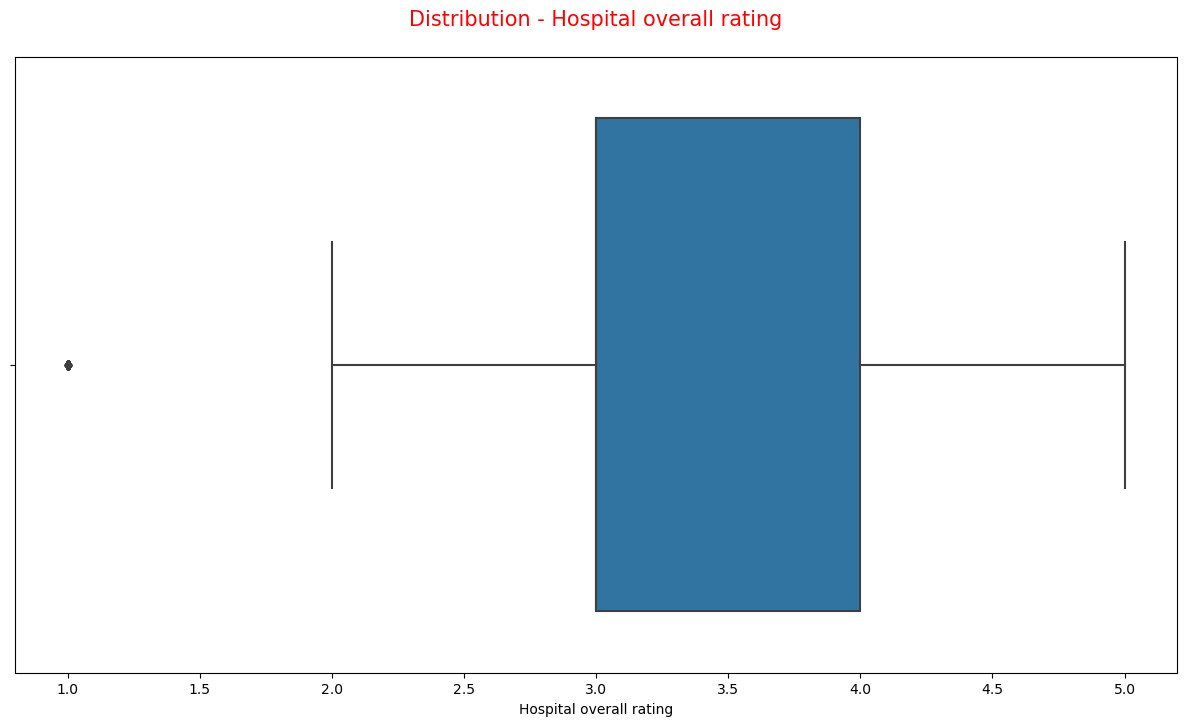

In [115]:
# Let's check main target variable 'Hospital overall rating'

plt.figure(figsize=(15,8))
sns.boxplot(hfinal['Hospital overall rating'])
plt.title('Distribution - Hospital overall rating\n', fontdict={'color':'red', 'size':'15'})

- From the above we can we see that there are very new/no outliers in the target variable, however the median rating stands at 3.5 and all the hospitals' rating falls between Minimum of 2 and maximum of 5

_____________________________________________________________________________________________________________________


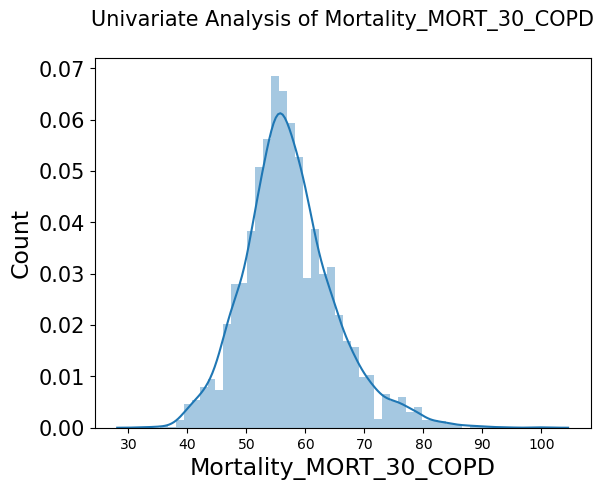

_____________________________________________________________________________________________________________________


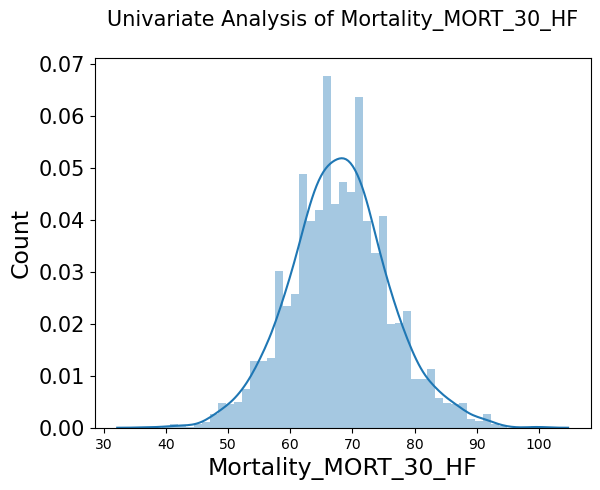

_____________________________________________________________________________________________________________________


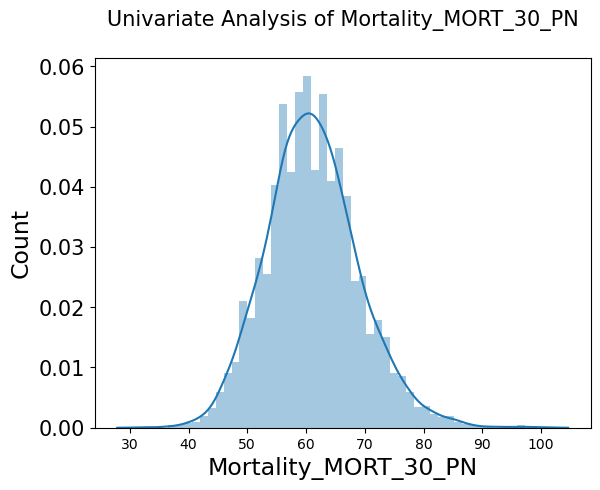

_____________________________________________________________________________________________________________________


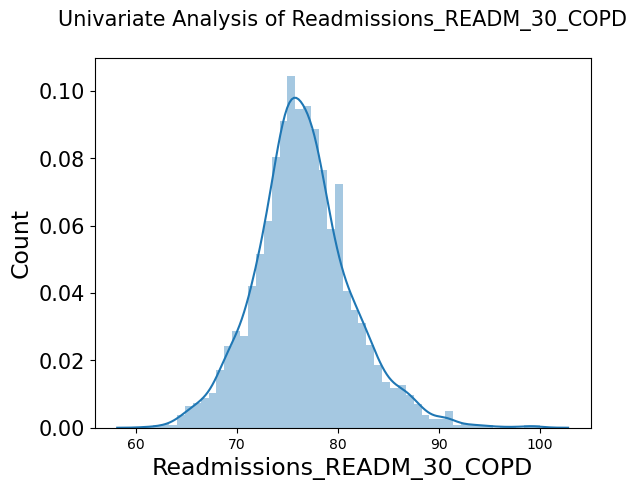

_____________________________________________________________________________________________________________________


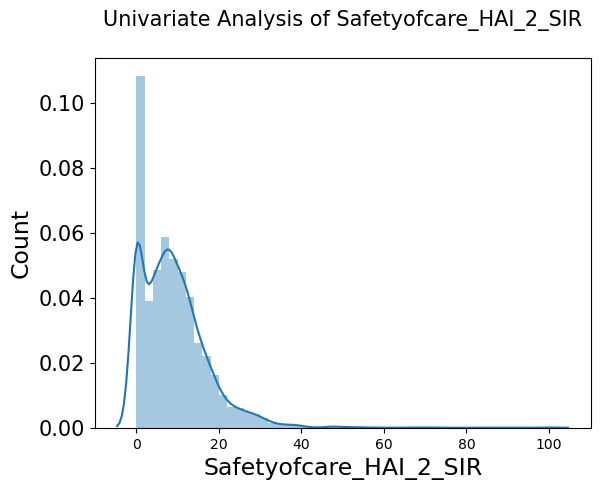

_____________________________________________________________________________________________________________________


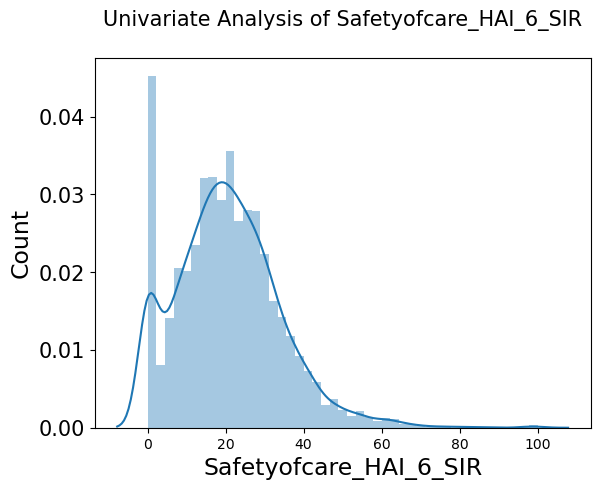

_____________________________________________________________________________________________________________________


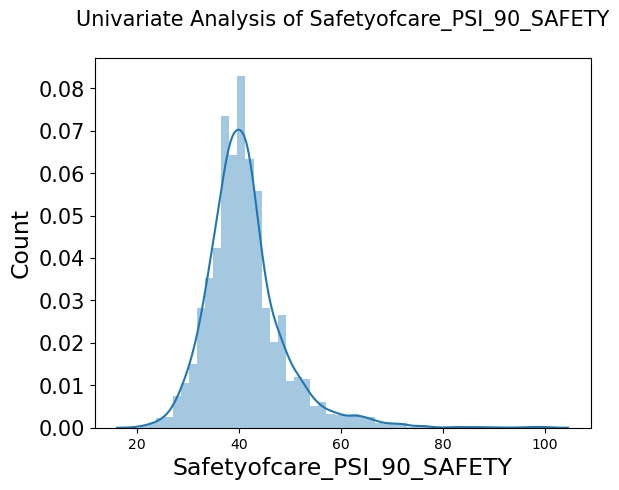

_____________________________________________________________________________________________________________________


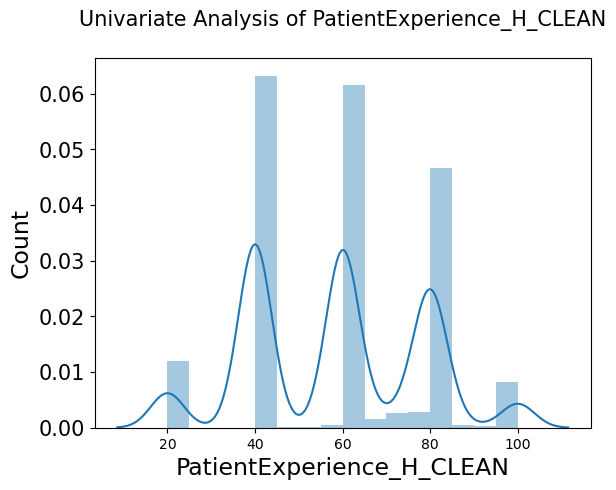

_____________________________________________________________________________________________________________________


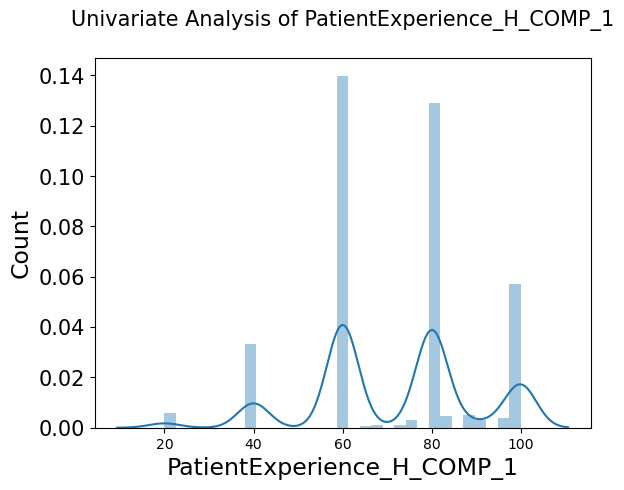

_____________________________________________________________________________________________________________________


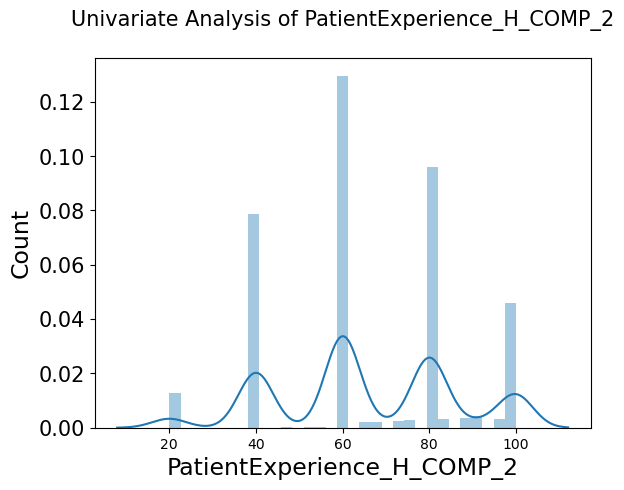

_____________________________________________________________________________________________________________________


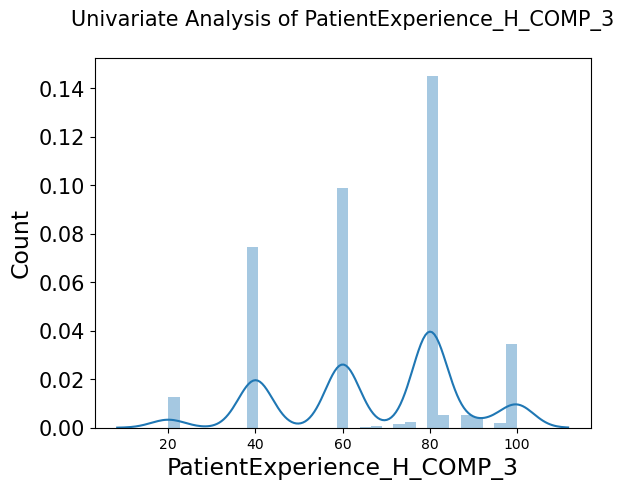

_____________________________________________________________________________________________________________________


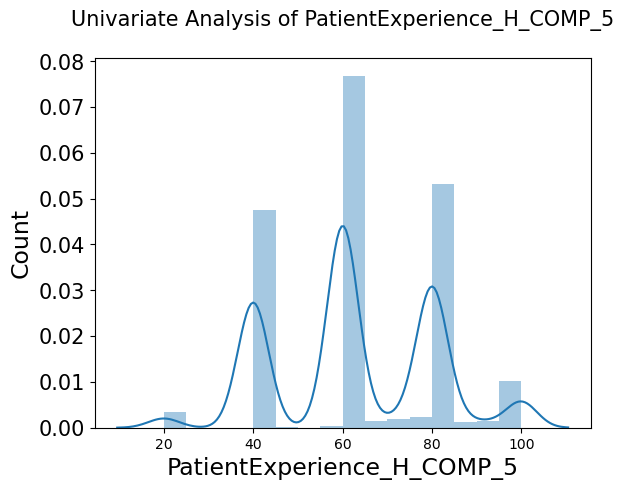

_____________________________________________________________________________________________________________________


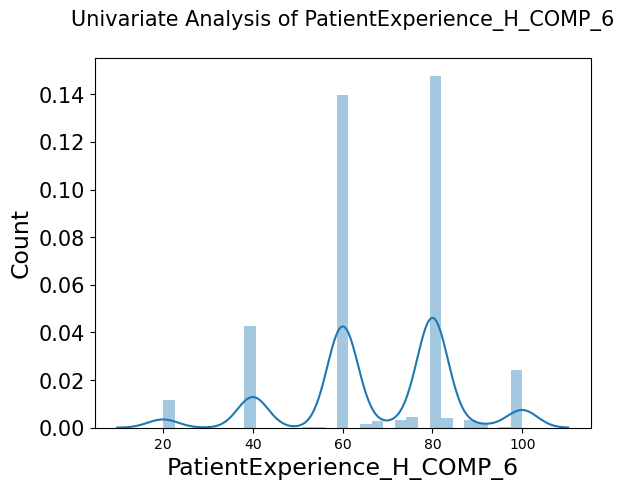

_____________________________________________________________________________________________________________________


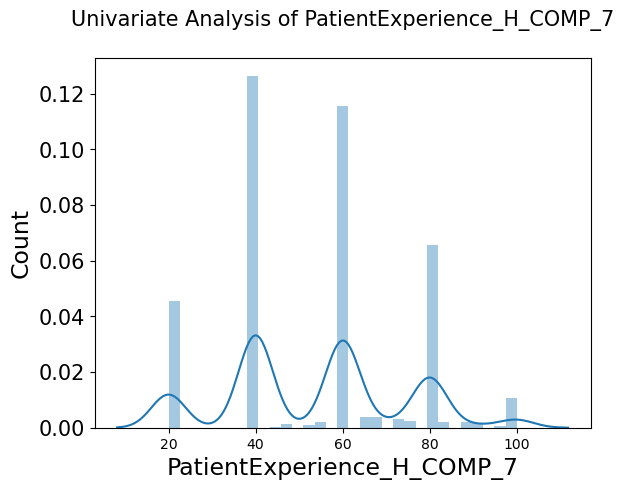

_____________________________________________________________________________________________________________________


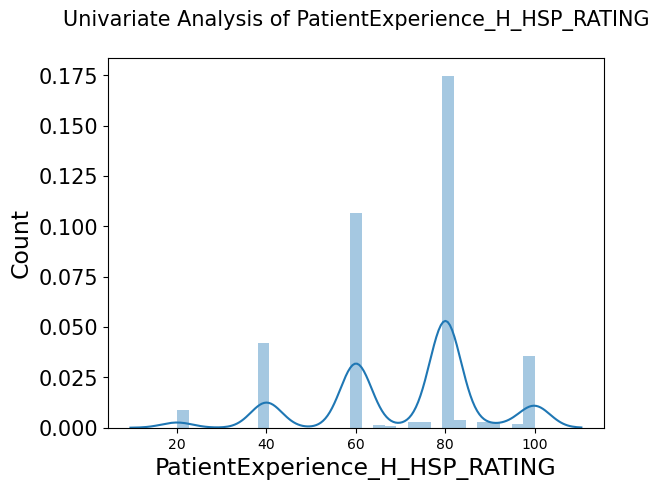

_____________________________________________________________________________________________________________________


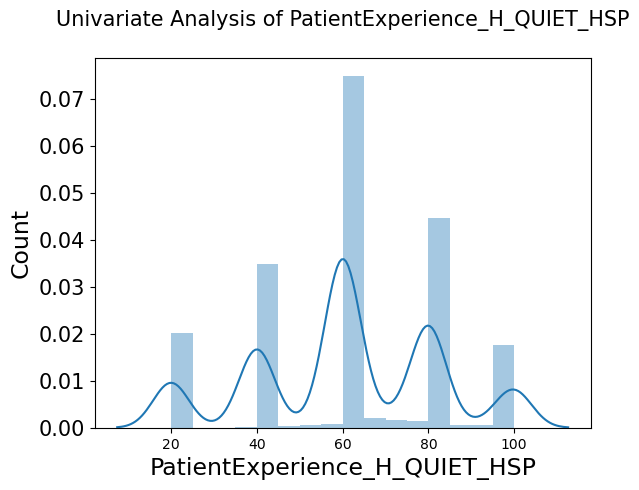

_____________________________________________________________________________________________________________________


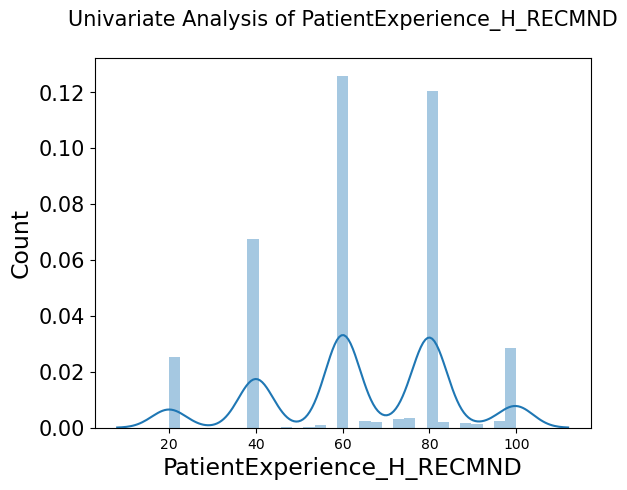

_____________________________________________________________________________________________________________________


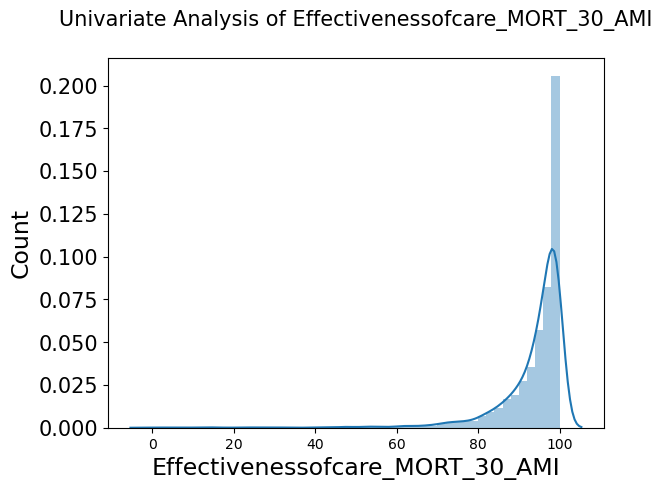

_____________________________________________________________________________________________________________________


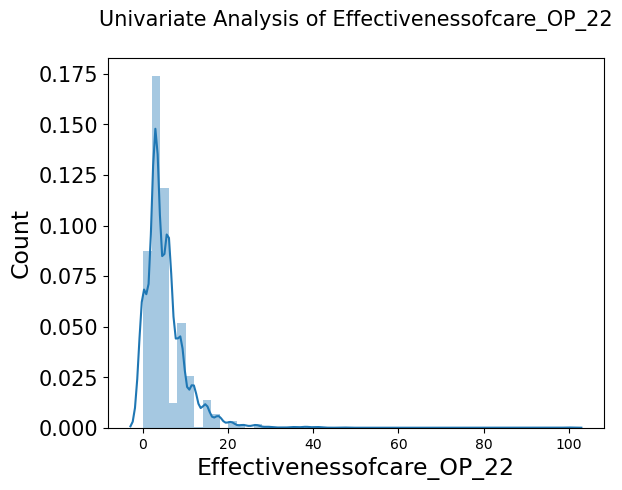

_____________________________________________________________________________________________________________________


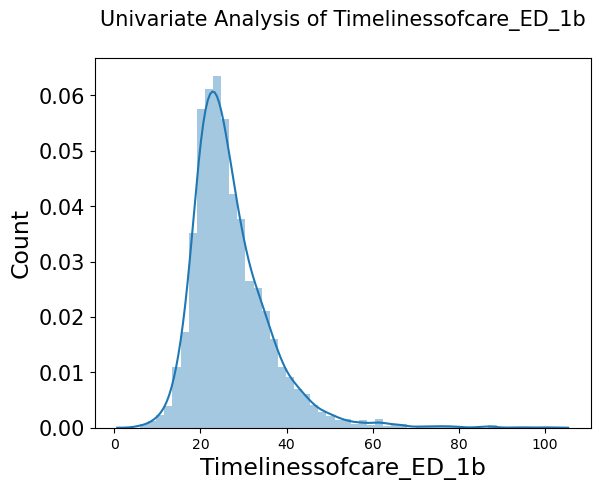

_____________________________________________________________________________________________________________________


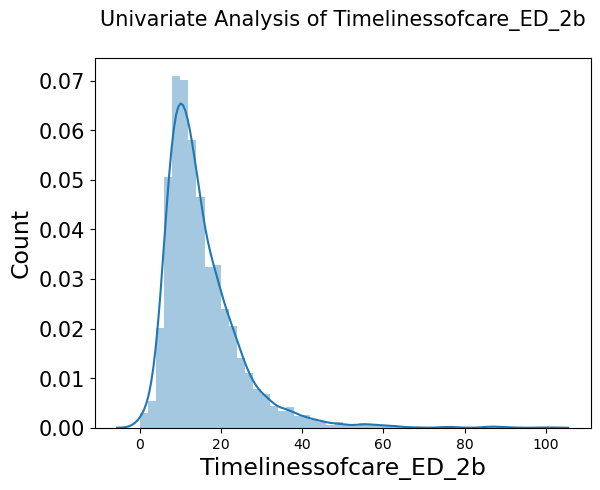

_____________________________________________________________________________________________________________________


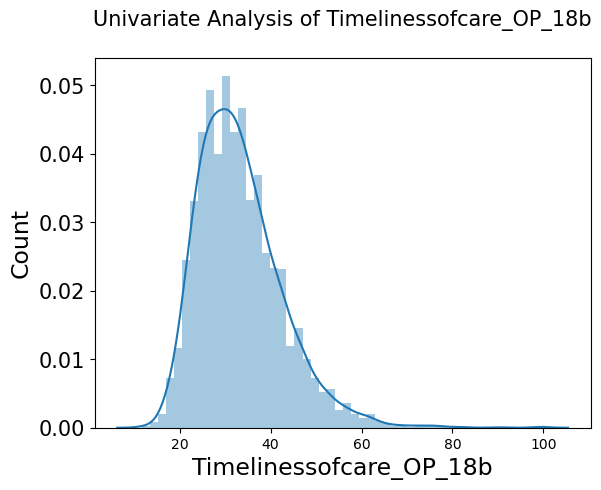

_____________________________________________________________________________________________________________________


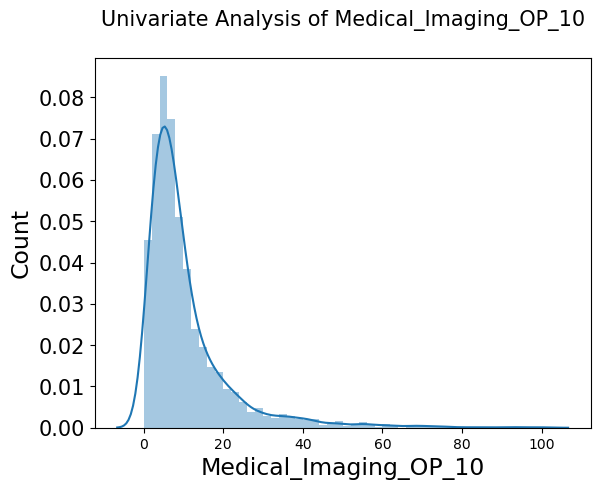

_____________________________________________________________________________________________________________________


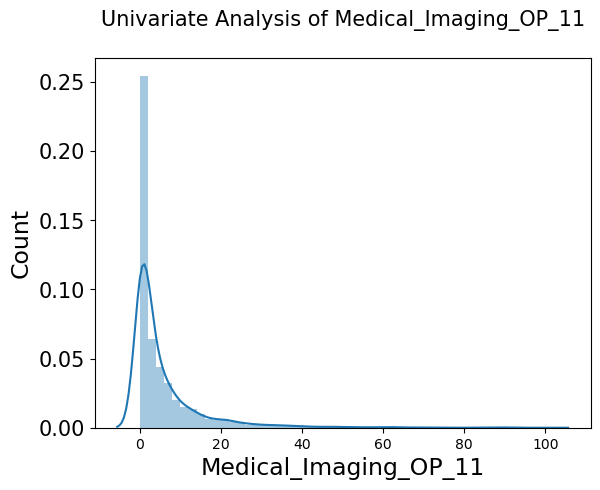

In [116]:
# Univariate analysis of Numeric variables
for col in hfinal[numerical_cols]:
    
    sns.distplot(hfinal[col])
    plt.title(f'Univariate Analysis of {col}\n', fontdict={'size':15})
    
    
    plt.yticks(size=15)
    plt.xlabel(col,size=17)
    plt.ylabel('Count',size=17)
    print('_____________________________________________________________________________________________________________________')
    plt.show()

#### Inferences from Univariate analysis of Numerical_columns:

- From the above we can infer that majority of the Mortality & Readmission data is normally distributed, however the columns of Safety_of_Care are left-skewed raging between 0 & 60
- Although the patient_experience is very much volatile ratings accross various measures which looks normal.
- The effectiveness_of_care for MORT_30_AMI is very much right-skewed majority ranging between 80-100, also the OP_22 is left-skewed ranging between 0-20
- Timeliness_of_care is looking good even though it is little left-skewed but distribution is close to normal as values are ranging from 20-60
- Medical imaging is also left skewed with values ranging from 0-40

_____________________________________________________________________________________________________________________


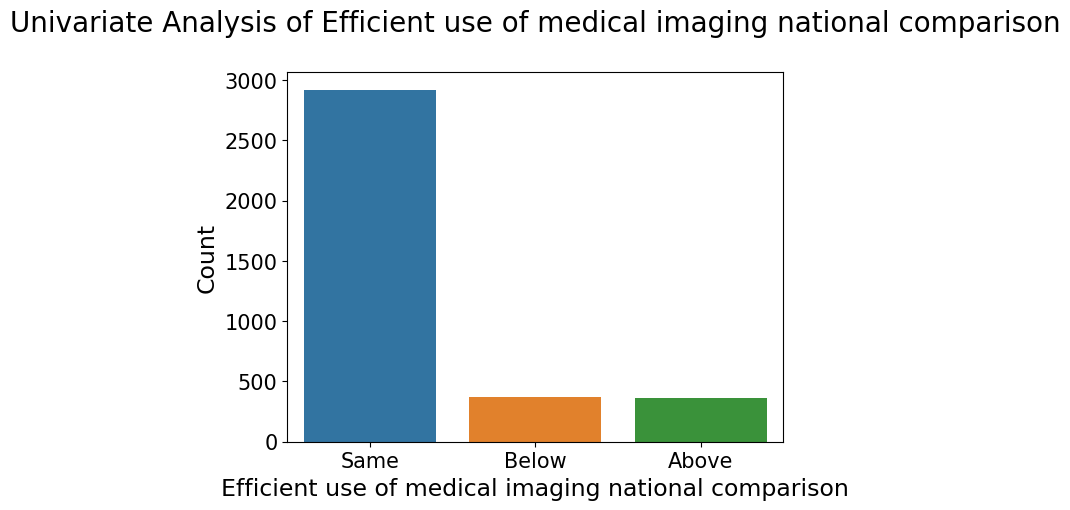

_____________________________________________________________________________________________________________________


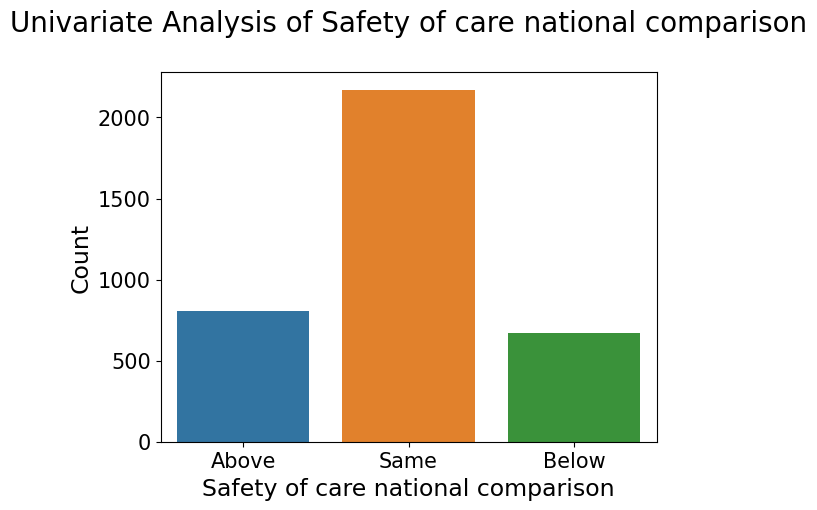

_____________________________________________________________________________________________________________________


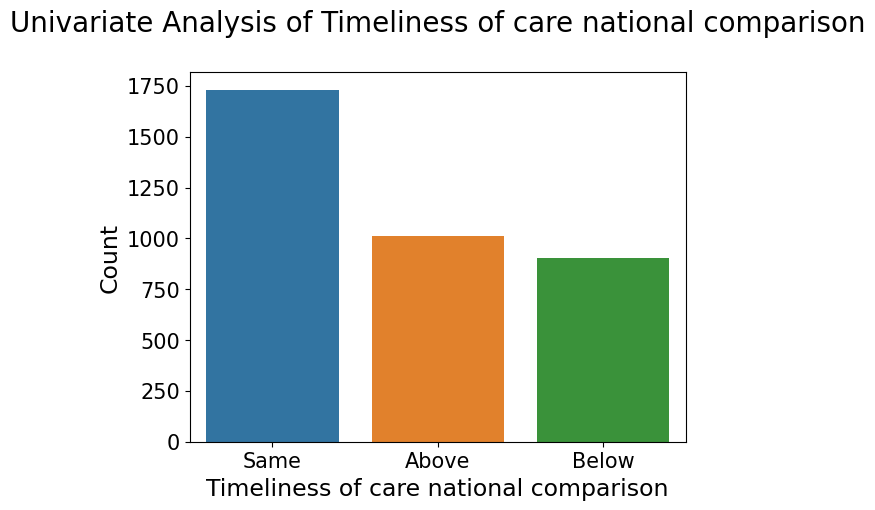

_____________________________________________________________________________________________________________________


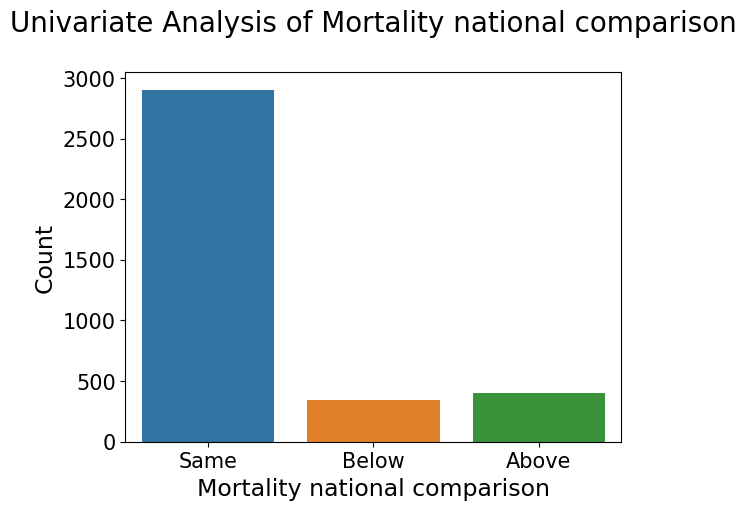

_____________________________________________________________________________________________________________________


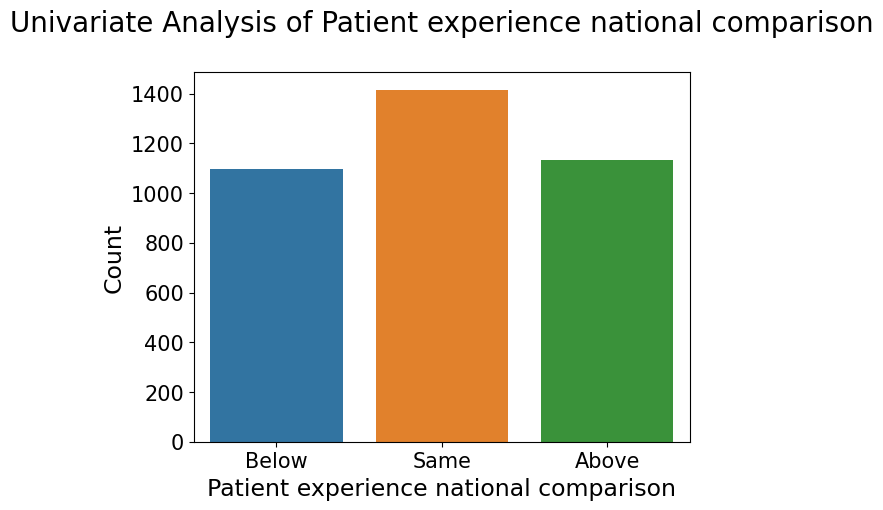

_____________________________________________________________________________________________________________________


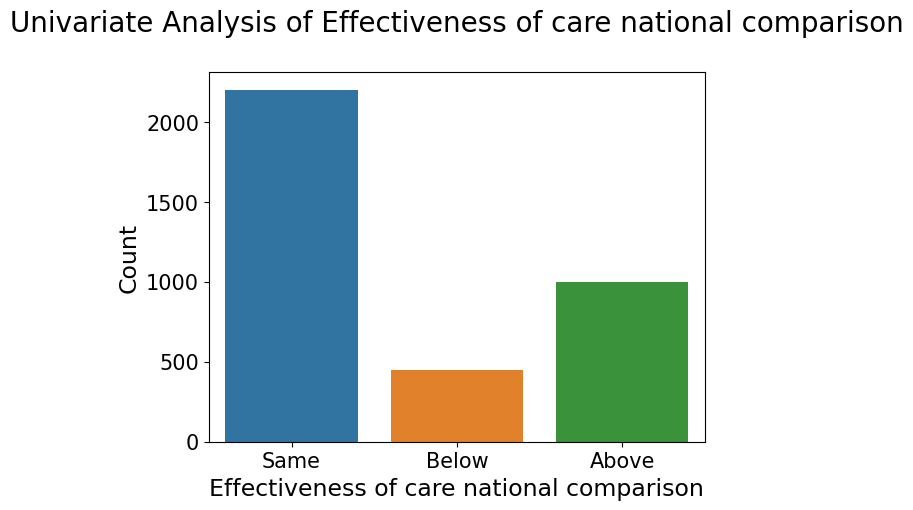

_____________________________________________________________________________________________________________________


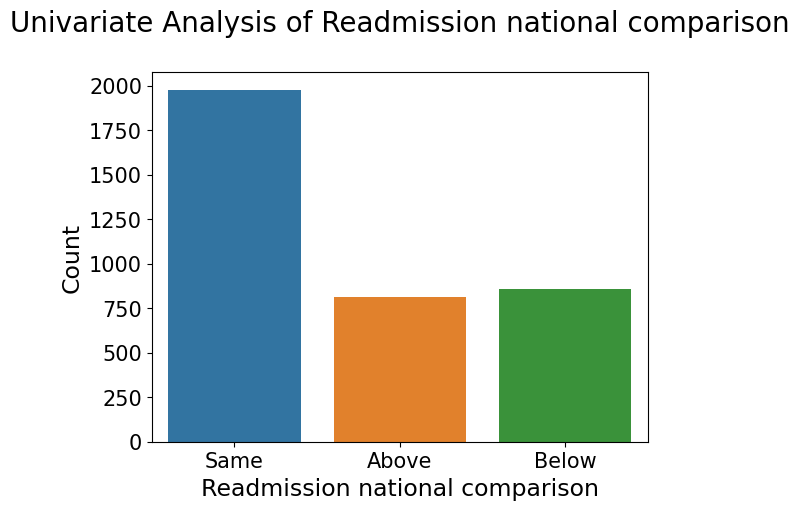

_____________________________________________________________________________________________________________________


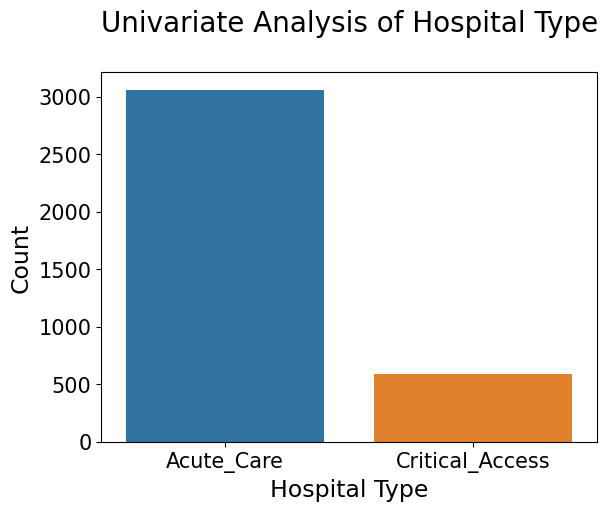

_____________________________________________________________________________________________________________________


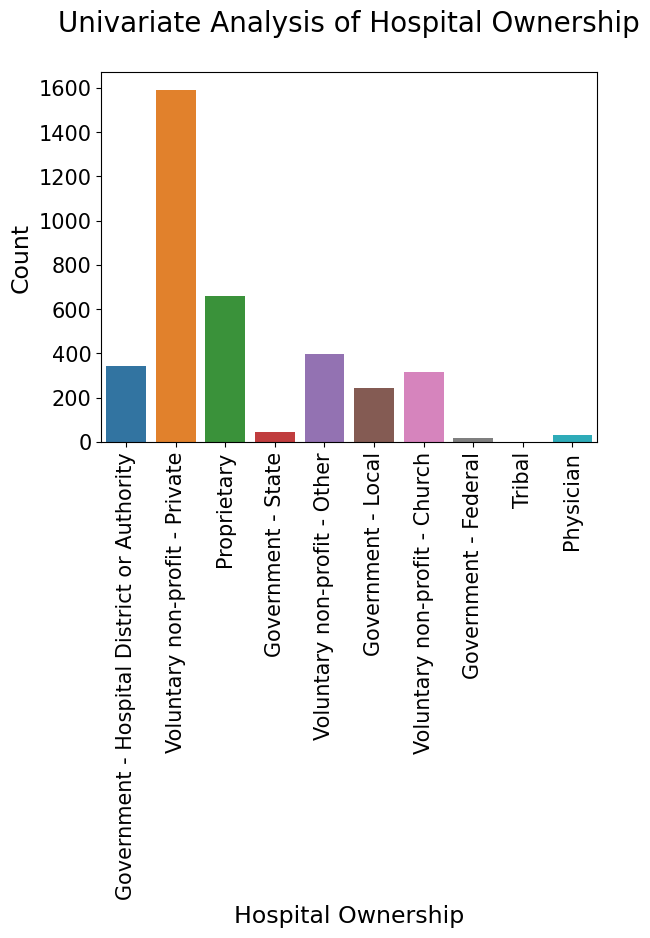

_____________________________________________________________________________________________________________________


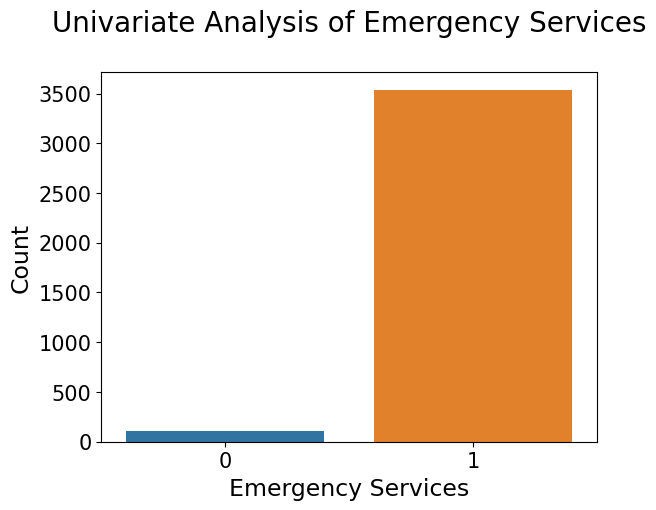

In [117]:
#Univariate Analysis of Categorical_columns


for i in categorical_columns:
    sns.countplot(hfinal[i])
    plt.title(f'Univariate Analysis of {i}\n', fontdict={'size':20})
    if len(hfinal[i].value_counts()) > 4:
        plt.xticks(rotation=90, size=15)
    else:
        plt.xticks(rotation=0, size=15)
    
    plt.yticks(size=15)
    plt.xlabel(i,size=17)
    plt.ylabel('Count',size=17)
    print('_____________________________________________________________________________________________________________________')
    plt.show()

#### Inferences from Univariate Analysis of categorical_columns:

- Majority of Hospitals are Acute_Care hospitals & provide for Emergency Services.
- Majority of hospitals approximately 1600 hospitals are privately owned hospitals & around 650 hospitals are Proprietary hospitals.
- With Respect to other measures in the above plots, majority of the measures are inline or are same as national average levels

#### Bivariate Analysis

_____________________________________________________________________________________________________________________


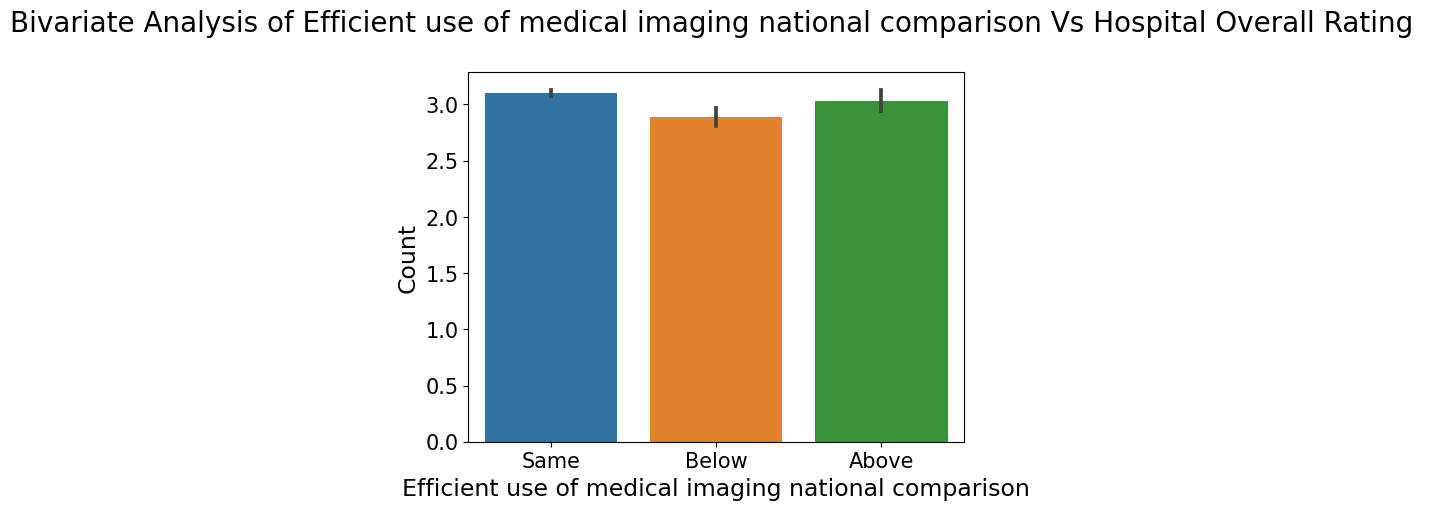

_____________________________________________________________________________________________________________________


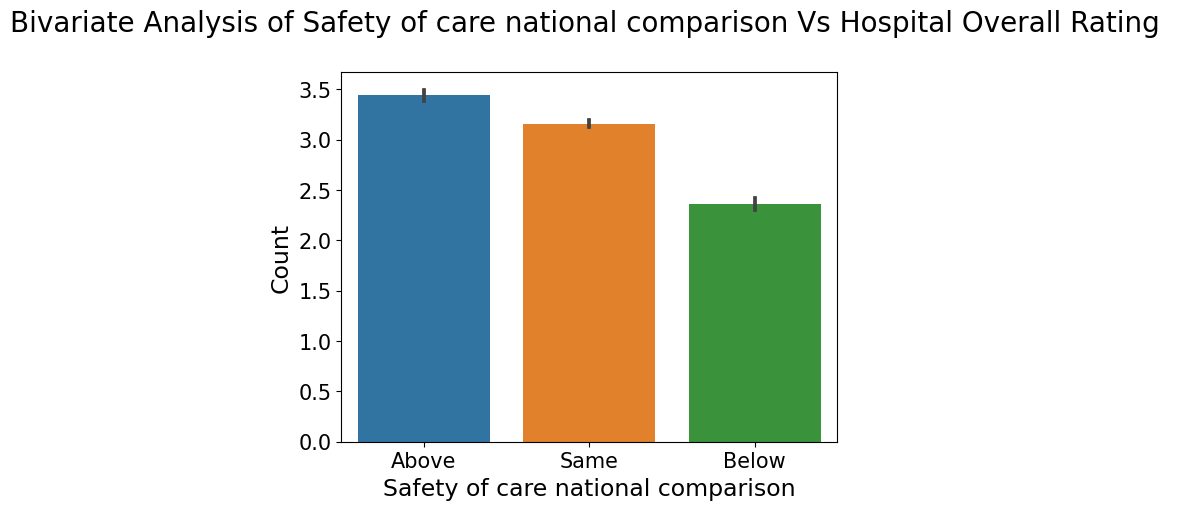

_____________________________________________________________________________________________________________________


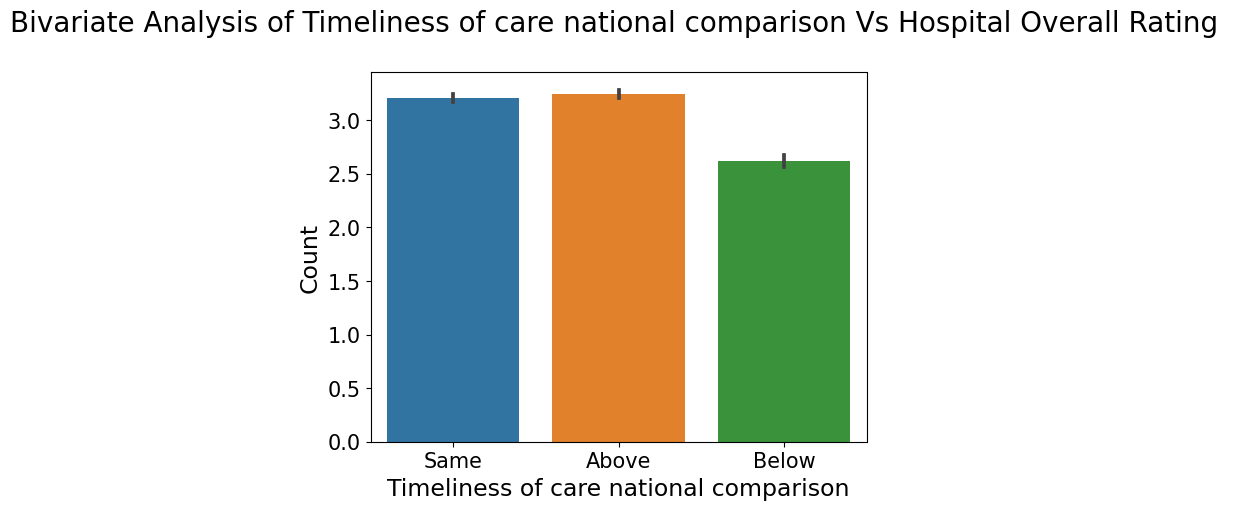

_____________________________________________________________________________________________________________________


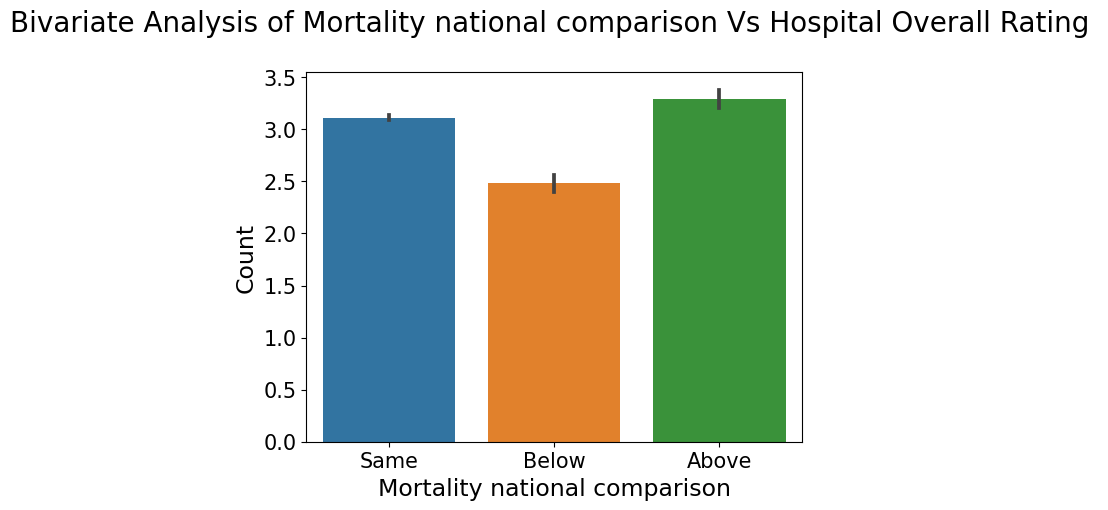

_____________________________________________________________________________________________________________________


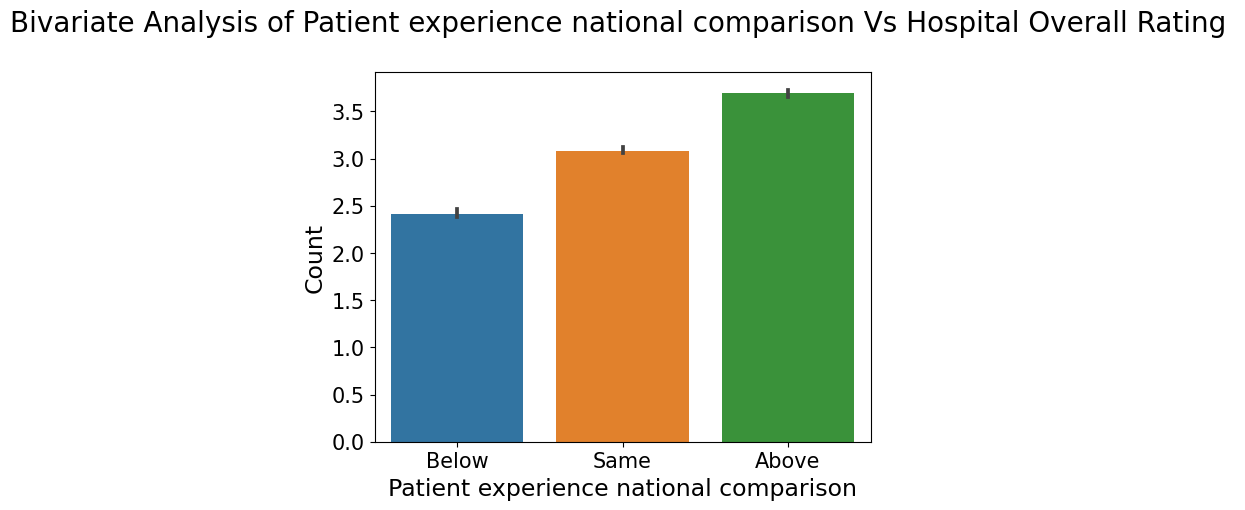

_____________________________________________________________________________________________________________________


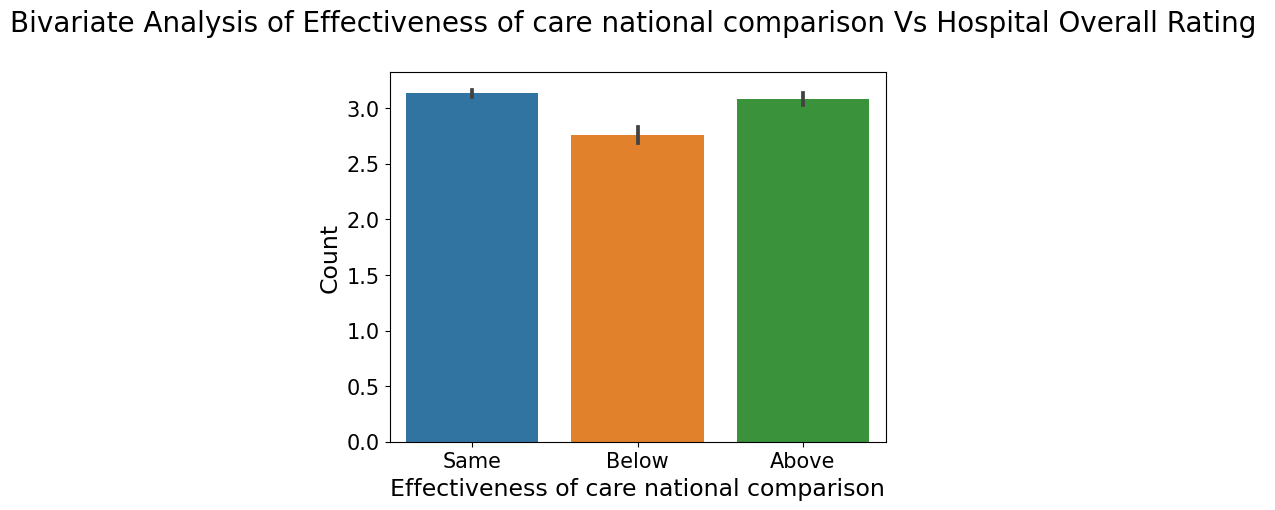

_____________________________________________________________________________________________________________________


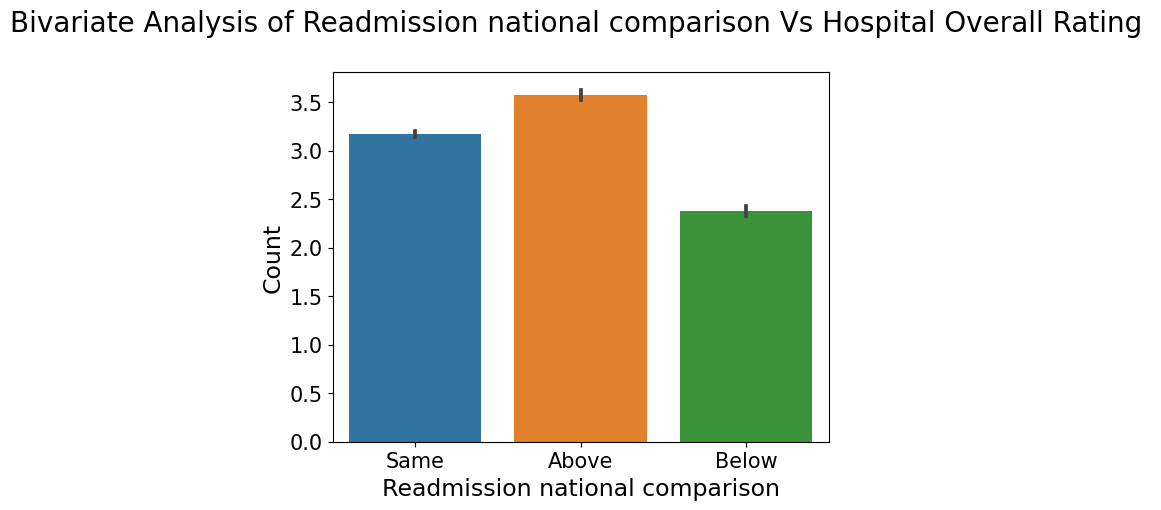

_____________________________________________________________________________________________________________________


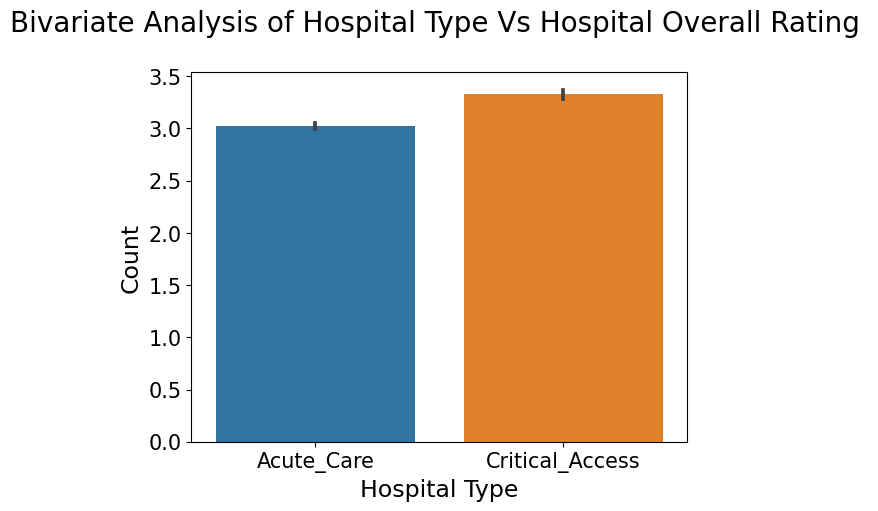

_____________________________________________________________________________________________________________________


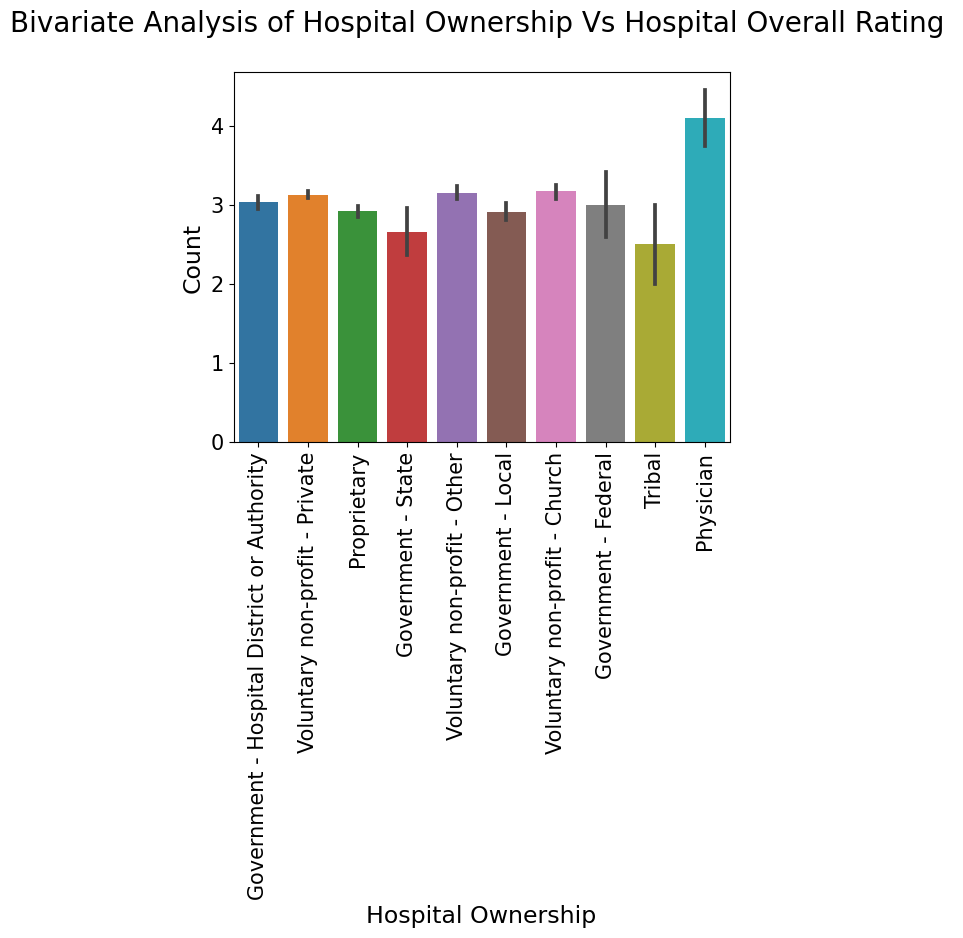

_____________________________________________________________________________________________________________________


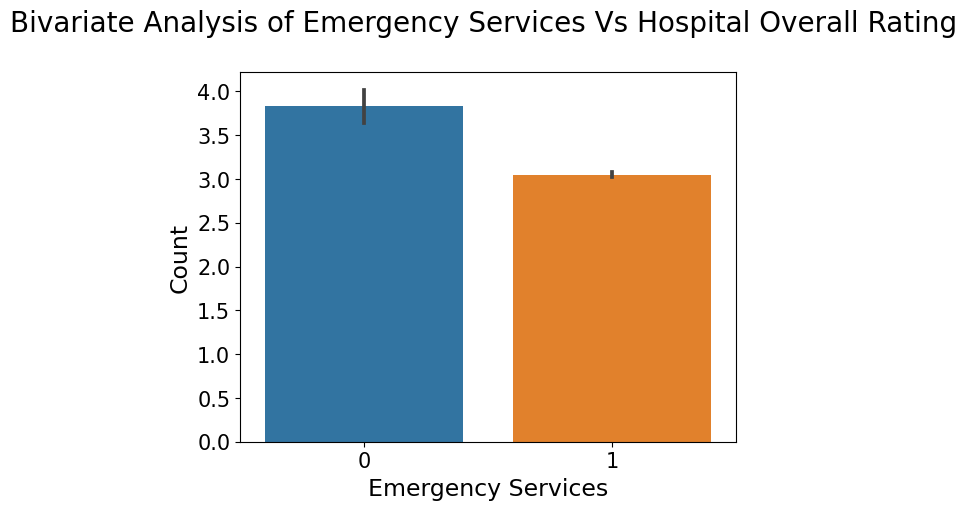

In [118]:
# Hospital Rating Vs Categorical columns
for i in categorical_columns:
    sns.barplot(x=hfinal[i],y=hfinal['Hospital overall rating'])
    plt.title(f'Bivariate Analysis of {i} Vs Hospital Overall Rating \n', fontdict={'size':20})
    if len(hfinal[i].value_counts()) > 4:
        plt.xticks(rotation=90, size=15)
    else:
        plt.xticks(rotation=0, size=15)
    
    plt.yticks(size=15)
    plt.xlabel(i,size=17)
    plt.ylabel('Count',size=17)
    print('_____________________________________________________________________________________________________________________')
    plt.show()

#### Inferences from Bivariate analysis :

- Medical Imaging has ratings between 0 and 3 only , majority of ratings match the national average levels
- Safety of care has maximum rating of 3.5 which is for above the national average level
- Mortality & Timeliness of care has maximum rating of 3.2
- Patient Experience has maximum rating of 3.7 where majority of providers are above national average levels
- Effectiveness of care has maximum rating of 3.1 & Readmission has maximum rating of 3.5 which has above national avg levels
- Acute_Care hospitals have ratings as high as 3 but Critical_care hospitals have max rating of 3.4
- Physians are given the highest rating of 4 followed by that are non-profit private hospitals with maximum rating of 3.2
- Providers with non-emergency services tend to have higher rating(3.7) compared to Providers with emergency services(3.0)


###### Bivariate analysis of numerical columns

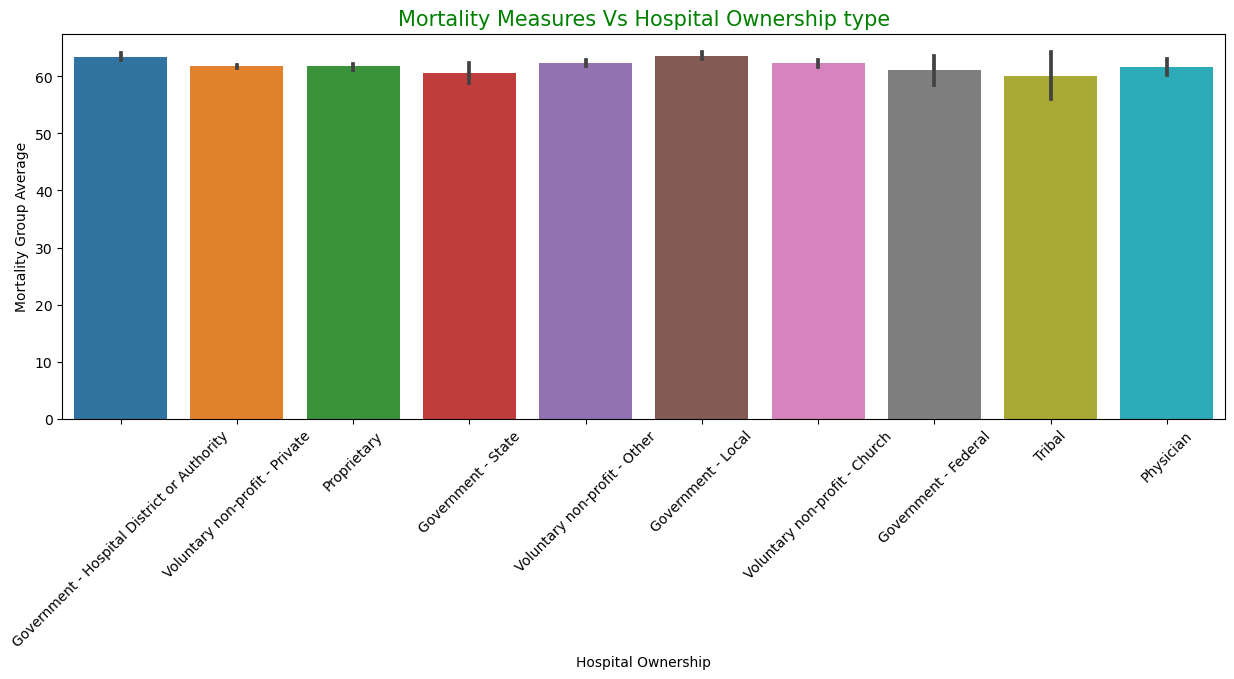

In [119]:
# Plotting Mortality Measures Vs Hospital Ownership type

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=(hfinal['Mortality_MORT_30_COPD']+hfinal['Mortality_MORT_30_HF']+hfinal['Mortality_MORT_30_PN'])/3)
plt.xticks(rotation=45)
plt.ylabel("Mortality Group Average")
plt.title("Mortality Measures Vs Hospital Ownership type", fontdict={'color': 'green', 'size':15})

plt.show()

All Hospital_Types show similar Mortality group scores with Government type hospitals showing a little higher scores.

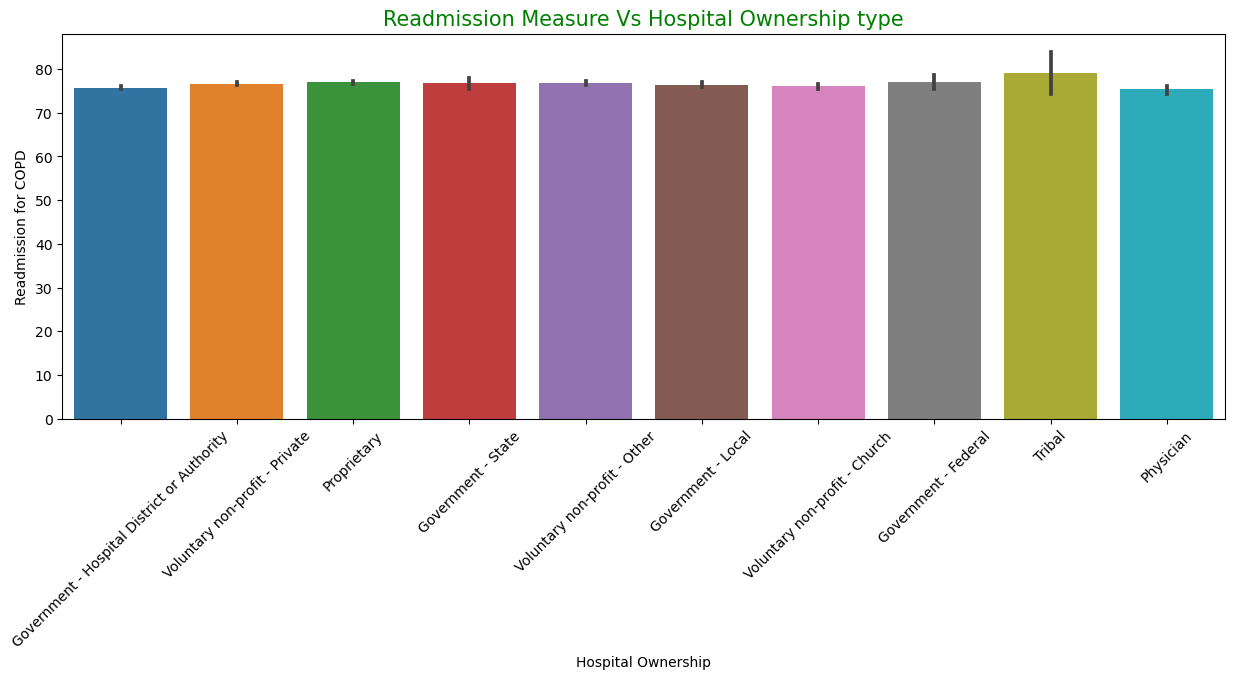

In [120]:
# Plotting Readmission Measure Vs Hospital Ownership types

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=hfinal['Readmissions_READM_30_COPD'])
plt.xticks(rotation=45)
plt.ylabel("Readmission for COPD")
plt.title("Readmission Measure Vs Hospital Ownership type", fontdict={'color': 'green', 'size':15})

plt.show()

Same as mortality Scores, except Tribal has little higher scores.

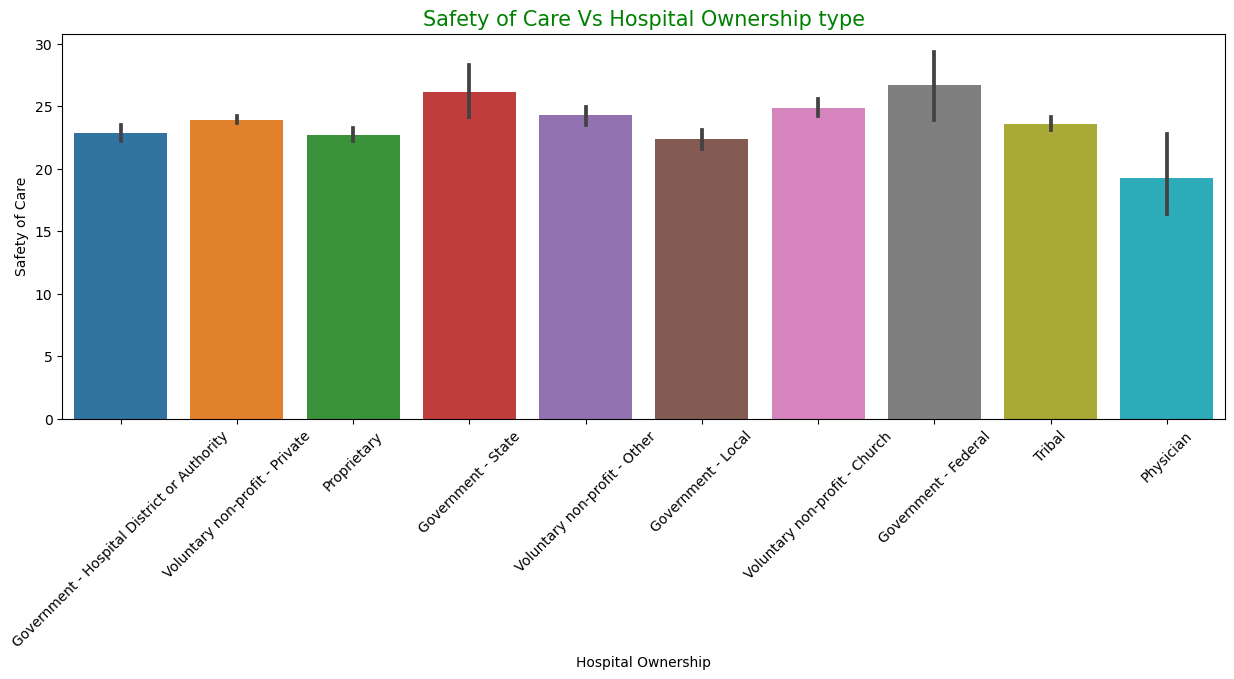

In [121]:
# Plotting Readmission Measure Vs Hospital Ownership types

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=(hfinal['Safetyofcare_HAI_2_SIR']+hfinal['Safetyofcare_HAI_6_SIR']+hfinal['Safetyofcare_PSI_90_SAFETY'])/3)
plt.xticks(rotation=45)
plt.ylabel("Safety of Care")
plt.title("Safety of Care Vs Hospital Ownership type", fontdict={'color': 'green', 'size':15})

plt.show()

We can infere that Government hospitals are slightly having higher scores for safety of care, Physician has lowest safety of care

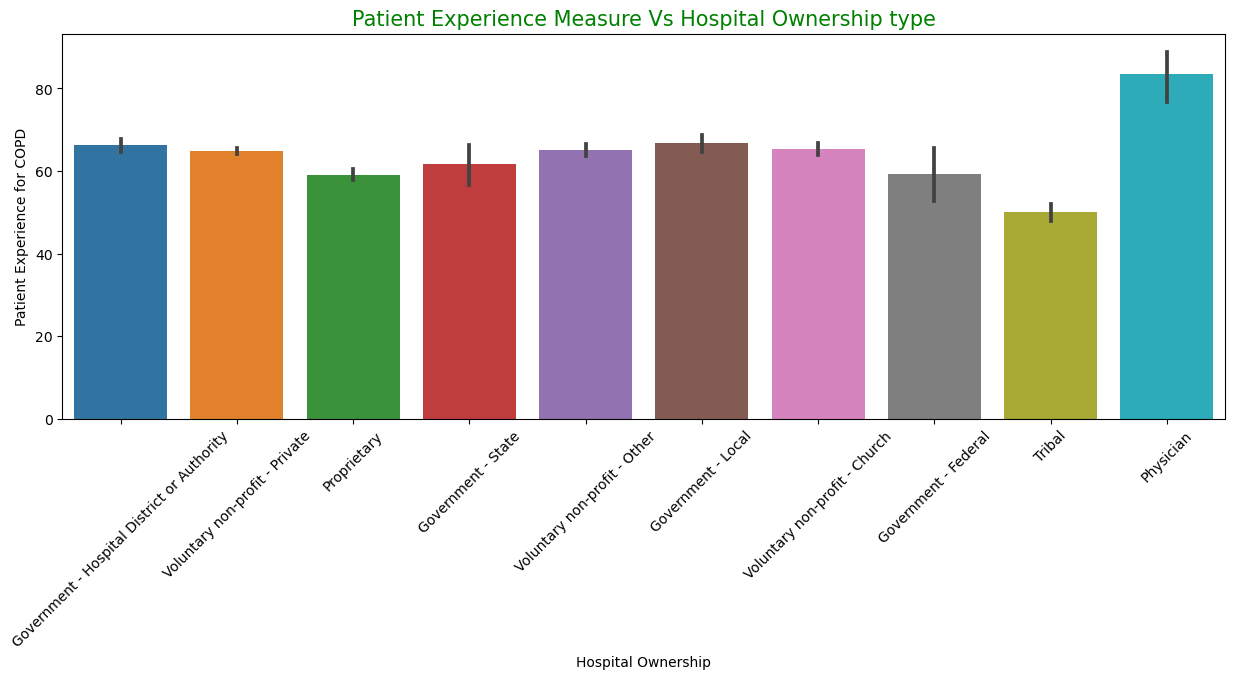

In [122]:
# Plotting Patient Experience Measure Vs Hospital Ownership types

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=(hfinal['PatientExperience_H_CLEAN']+hfinal['PatientExperience_H_COMP_1']+hfinal['PatientExperience_H_COMP_2']+hfinal['PatientExperience_H_COMP_3']+hfinal['PatientExperience_H_COMP_5']+hfinal['PatientExperience_H_COMP_6']+hfinal['PatientExperience_H_COMP_7']+hfinal['PatientExperience_H_HSP_RATING']+hfinal['PatientExperience_H_QUIET_HSP']+hfinal['PatientExperience_H_RECMND'])/10)
plt.xticks(rotation=45)
plt.ylabel("Patient Experience for COPD")
plt.title("Patient Experience Measure Vs Hospital Ownership type", fontdict={'color': 'green', 'size':15})
plt.show()

Physician has highest scores for Patient experience compared to others

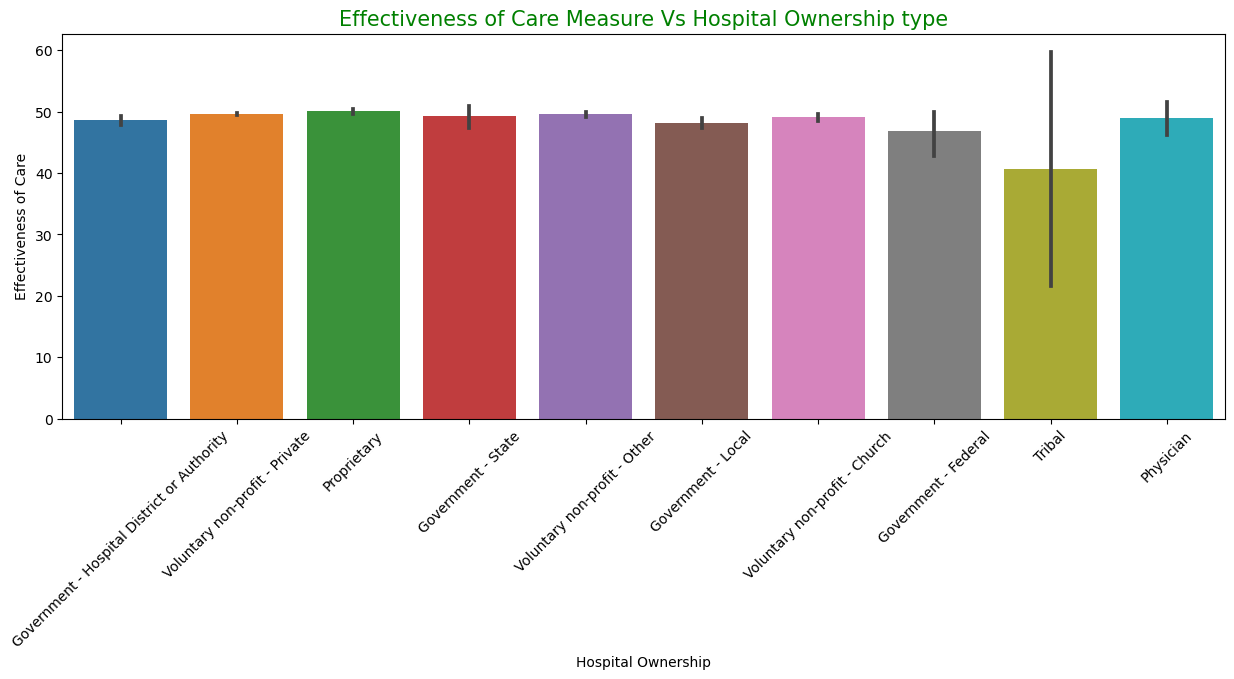

In [123]:
# Plotting Effectiveness of Care Measure Vs Hospital Ownership types

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=(hfinal['Effectivenessofcare_MORT_30_AMI']+hfinal['Effectivenessofcare_OP_22'])/2)
plt.xticks(rotation=45)
plt.ylabel("Effectiveness of Care")
plt.title("Effectiveness of Care Measure Vs Hospital Ownership type", fontdict={'color': 'green', 'size':15})

plt.show()

Almost all types of hospitals have similar scores for effectiveness of care except for Tribal(lowest score)

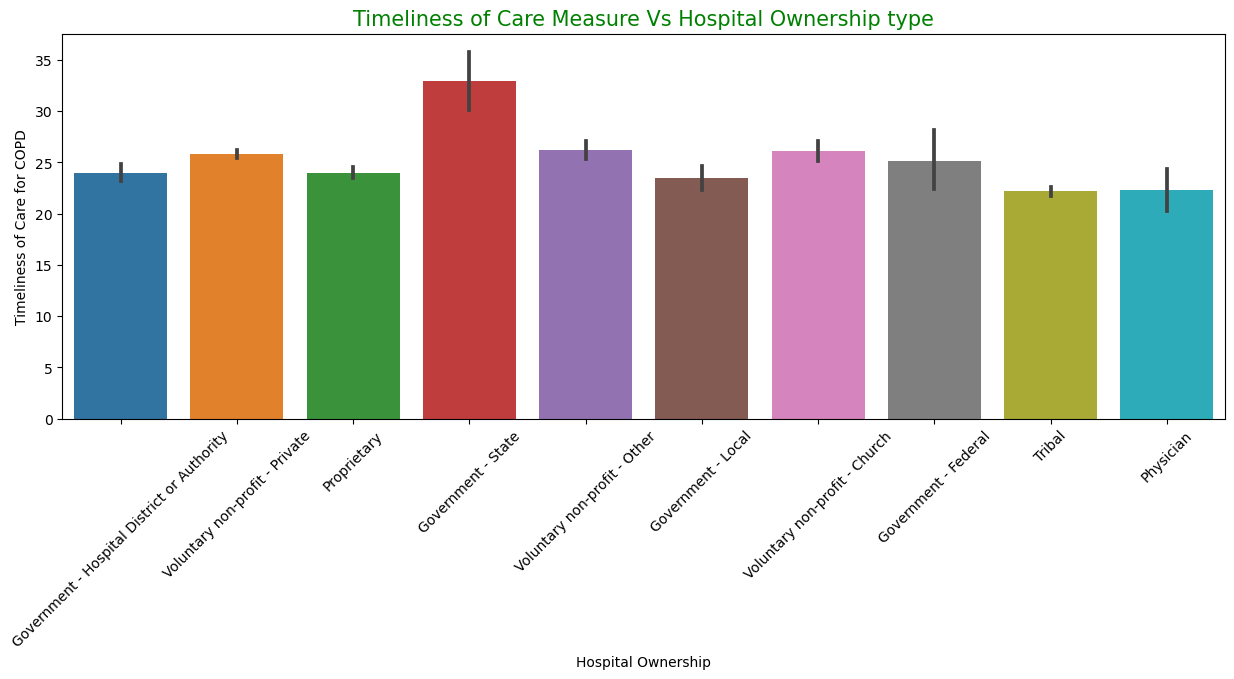

In [124]:
# Plotting Timeliness of Care Measure Vs Hospital Ownership types

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=(hfinal['Timelinessofcare_ED_1b']+hfinal['Timelinessofcare_ED_2b']+hfinal['Timelinessofcare_OP_18b'])/3)
plt.xticks(rotation=45)
plt.ylabel("Timeliness of Care for COPD")
plt.title("Timeliness of Care Measure Vs Hospital Ownership type", fontdict={'color': 'green', 'size':15})

plt.show()

Government hospitals show good scores for Timeliness of care compared to others

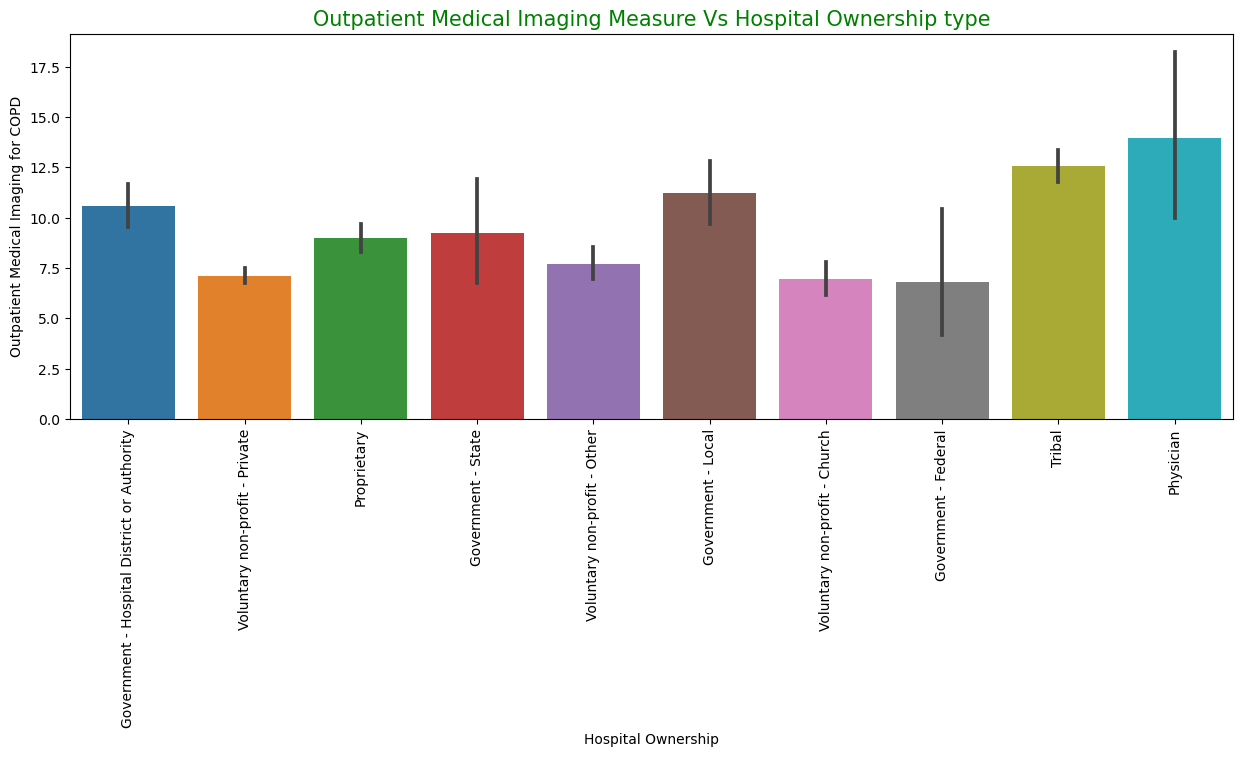

In [125]:
# Plotting Outpatient Medical Imaging Measure Vs Hospital Ownership types


plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=(hfinal['Medical_Imaging_OP_10']+hfinal['Medical_Imaging_OP_11'])/2)
plt.xticks(rotation=90)
plt.ylabel("Outpatient Medical Imaging for COPD")
plt.title("Outpatient Medical Imaging Measure Vs Hospital Ownership type",  fontdict={'color': 'green', 'size':15})

plt.show()

Physician have highest outpatient imaging scores where as private/church have lowest

#### Multivariate Analysis

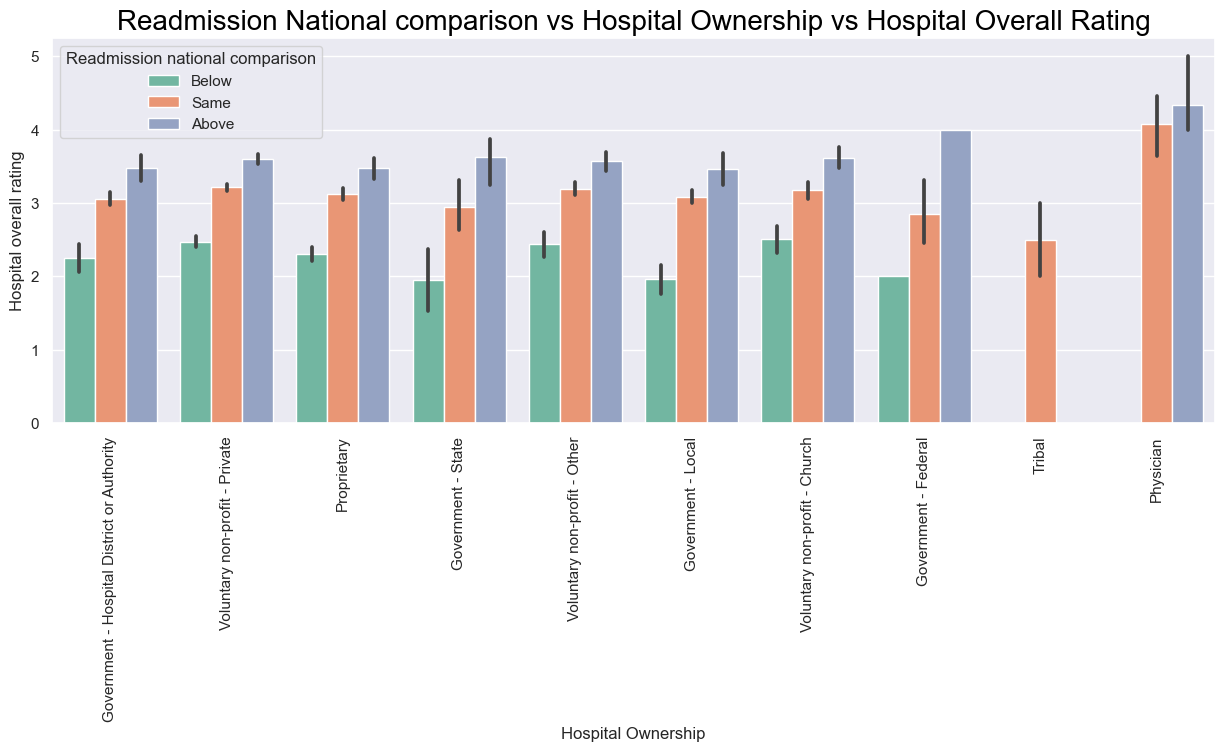

In [126]:
# Readmission National Comparison vs Hospital Ownership vs Hospital Overall Rating
sns.set_theme(style='darkgrid')
sns.set_palette("Set2")    
#sns.set(rc={'axes.facecolor':'lightgreen'})
plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=hfinal['Hospital overall rating'], 
            hue=hfinal['Readmission national comparison'], 
            hue_order=['Below', 'Same', 'Above'])
plt.xticks(rotation=90)
plt.title("Readmission National comparison vs Hospital Ownership vs Hospital Overall Rating", fontdict={'color': 'black', 'fontsize': 20})
plt.show()

From the above we can see that Majority of providers are above national average levels interms of readmission scores

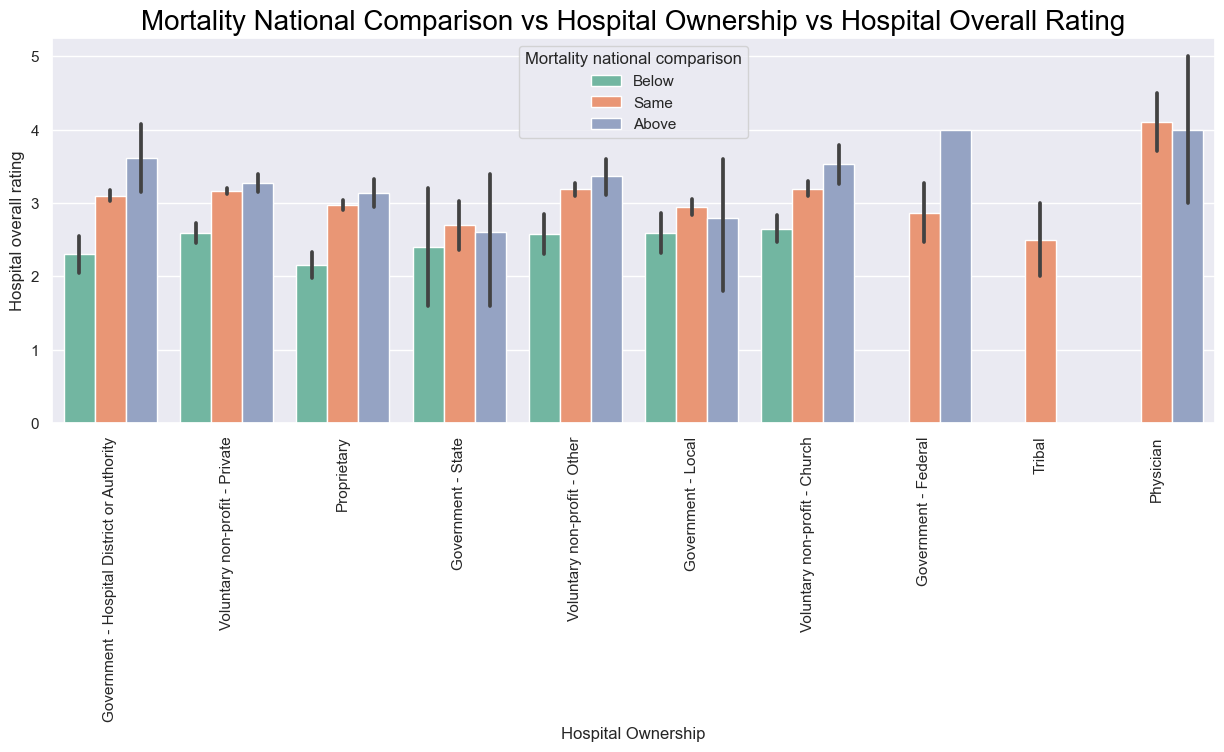

In [127]:
# Mortality National Comparison vs Hospital Ownership vs Hospital Overall Rating
sns.set_theme(style='darkgrid')
sns.set_palette("Set2")    
#sns.set(rc={'axes.facecolor':'lightgreen'})
plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=hfinal['Hospital overall rating'], 
            hue=hfinal['Mortality national comparison'], 
            hue_order=['Below', 'Same', 'Above'])
plt.xticks(rotation=90)
plt.title("Mortality National Comparison vs Hospital Ownership vs Hospital Overall Rating", fontdict={'color': 'black', 'fontsize': 20})
plt.show()

From the above we can see that Most of the providers have mortality scores above the national average levels except local govt hospitals, state govt hospitals and Physician

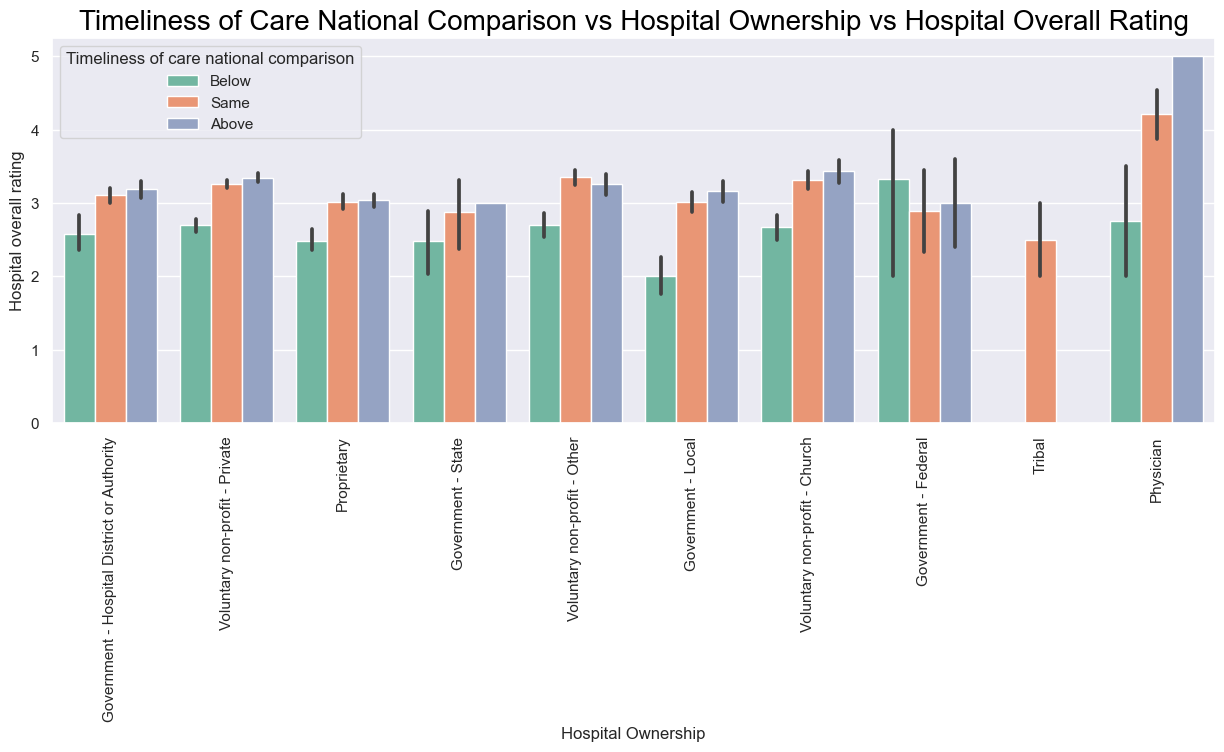

In [128]:
# Timeliness of Care National Comparison vs Hospital Ownership vs Hospital Overall Rating
sns.set_theme(style='darkgrid')
sns.set_palette("Set2")    

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=hfinal['Hospital overall rating'], 
            hue=hfinal['Timeliness of care national comparison'], 
            hue_order=['Below', 'Same', 'Above'])
plt.xticks(rotation=90)
plt.title("Timeliness of Care National Comparison vs Hospital Ownership vs Hospital Overall Rating", fontdict={'color': 'black', 'fontsize': 20})
plt.show()

Except Govt federal hospitals most of the providers/hospitals are having same or above national average levls interms of Timeliness of care

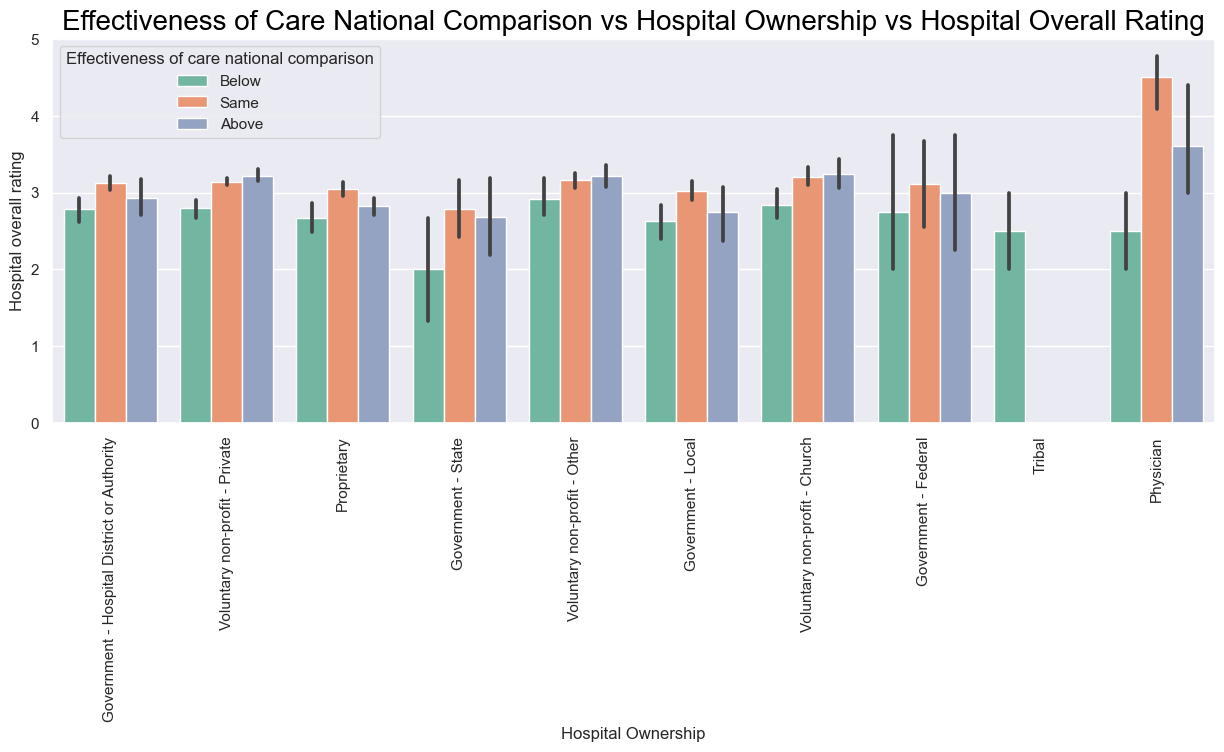

In [129]:
# Effectiveness of care National Comparison vs Hospital Ownership vs Hospital Overall Rating
sns.set_theme(style='darkgrid')
sns.set_palette("Set2")    

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=hfinal['Hospital overall rating'], 
            hue=hfinal['Effectiveness of care national comparison'], 
            hue_order=['Below', 'Same', 'Above'])
plt.xticks(rotation=90)
plt.title("Effectiveness of Care National Comparison vs Hospital Ownership vs Hospital Overall Rating", fontdict={'color': 'black', 'fontsize': 20})
plt.show()

Except for Voluntary non-profit type hospitals where scores are above national average, Rest of the providers have more or less same national average level scores interms of Effectiveness of care

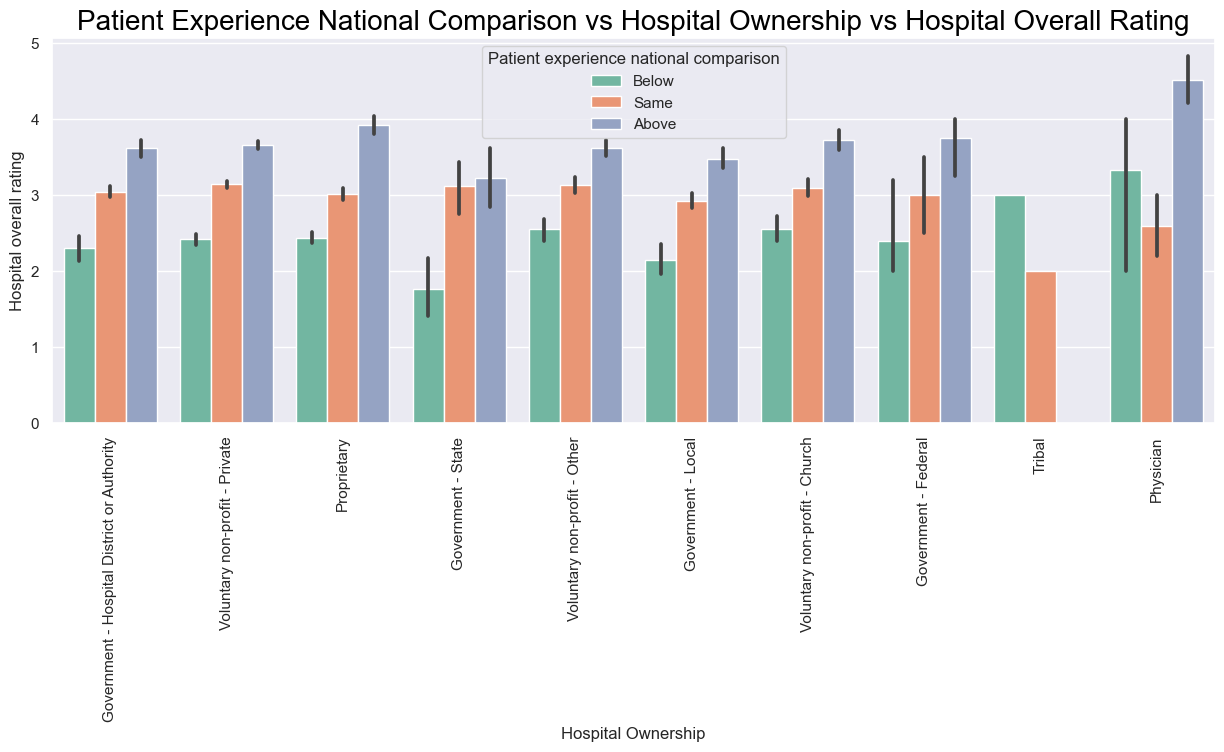

In [130]:
# Patient Experience National Comparison vs Hospital Ownership vs Hospital Overall Rating
sns.set_theme(style='darkgrid')
sns.set_palette("Set2")    

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=hfinal['Hospital overall rating'], 
            hue=hfinal['Patient experience national comparison'], 
            hue_order=['Below', 'Same', 'Above'])
plt.xticks(rotation=90)
plt.title("Patient Experience National Comparison vs Hospital Ownership vs Hospital Overall Rating", fontdict={'color': 'black', 'fontsize': 20})
plt.show()

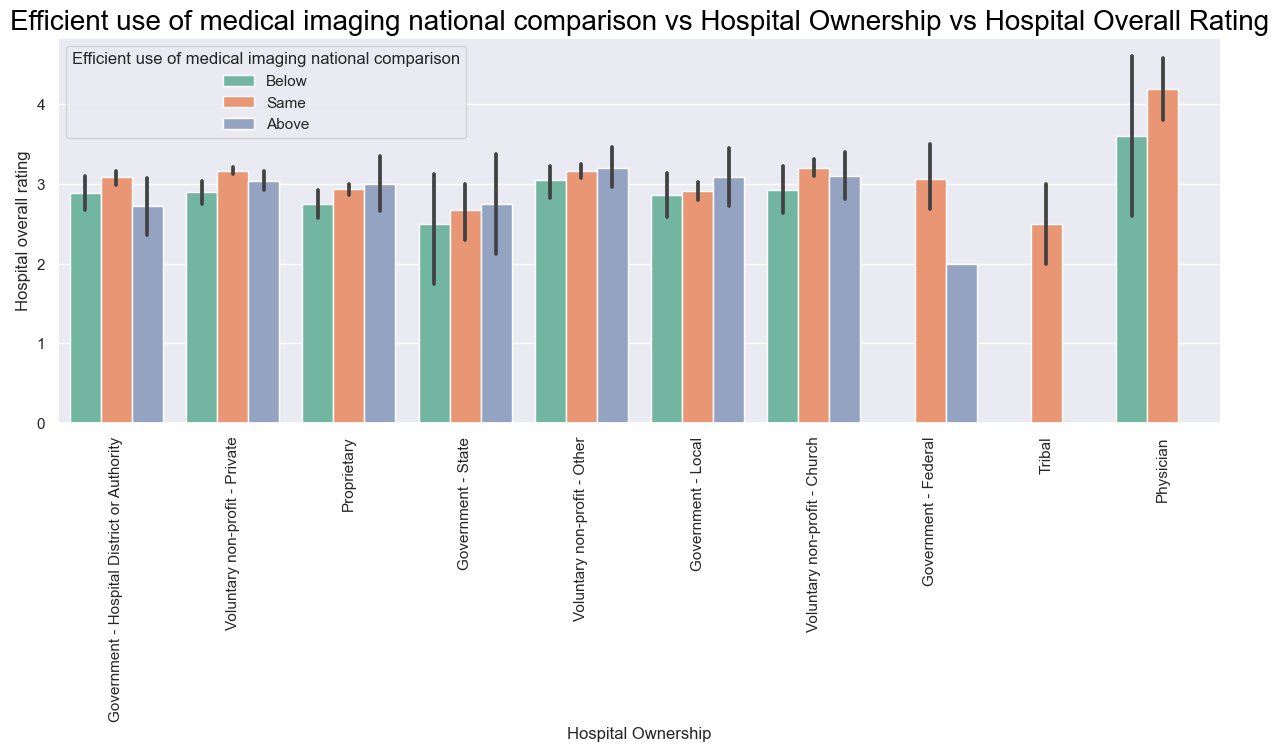

In [131]:
# Outpatient Imaging Efficiency National Comparison vs Hospital Ownership vs Hospital Overall Rating
sns.set_theme(style='darkgrid')
sns.set_palette("Set2")    

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=hfinal['Hospital overall rating'], 
            hue=hfinal['Efficient use of medical imaging national comparison'], 
            hue_order=['Below', 'Same', 'Above'])
plt.xticks(rotation=90)
plt.title("Efficient use of medical imaging national comparison vs Hospital Ownership vs Hospital Overall Rating", fontdict={'color': 'black', 'fontsize': 20})
plt.show()

Except Physician & Tribal providers rest all are above national average levels interms of outpatient imaging efficiency

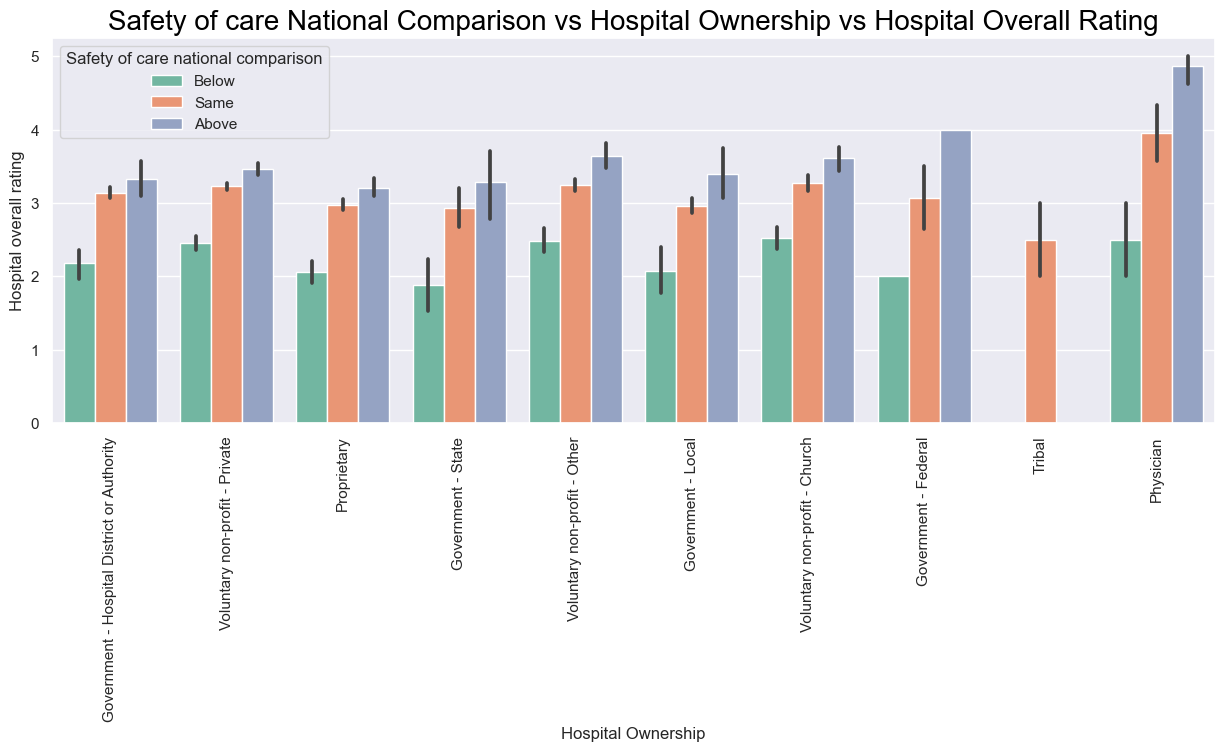

In [132]:
# Safety of care National Comparison vs Hospital Ownership vs Hospital Overall Rating
sns.set_theme(style='darkgrid')
sns.set_palette("Set2")    

plt.figure(figsize=(15,5))
sns.barplot(x=hfinal['Hospital Ownership'], 
            y=hfinal['Hospital overall rating'], 
            hue=hfinal['Safety of care national comparison'], 
            hue_order=['Below', 'Same', 'Above'])
plt.xticks(rotation=90)
plt.title("Safety of care National Comparison vs Hospital Ownership vs Hospital Overall Rating", fontdict={'color': 'black', 'fontsize': 20})
plt.show()

Safety of care scores are above national average for most of provider cases

#### Checking Correlation

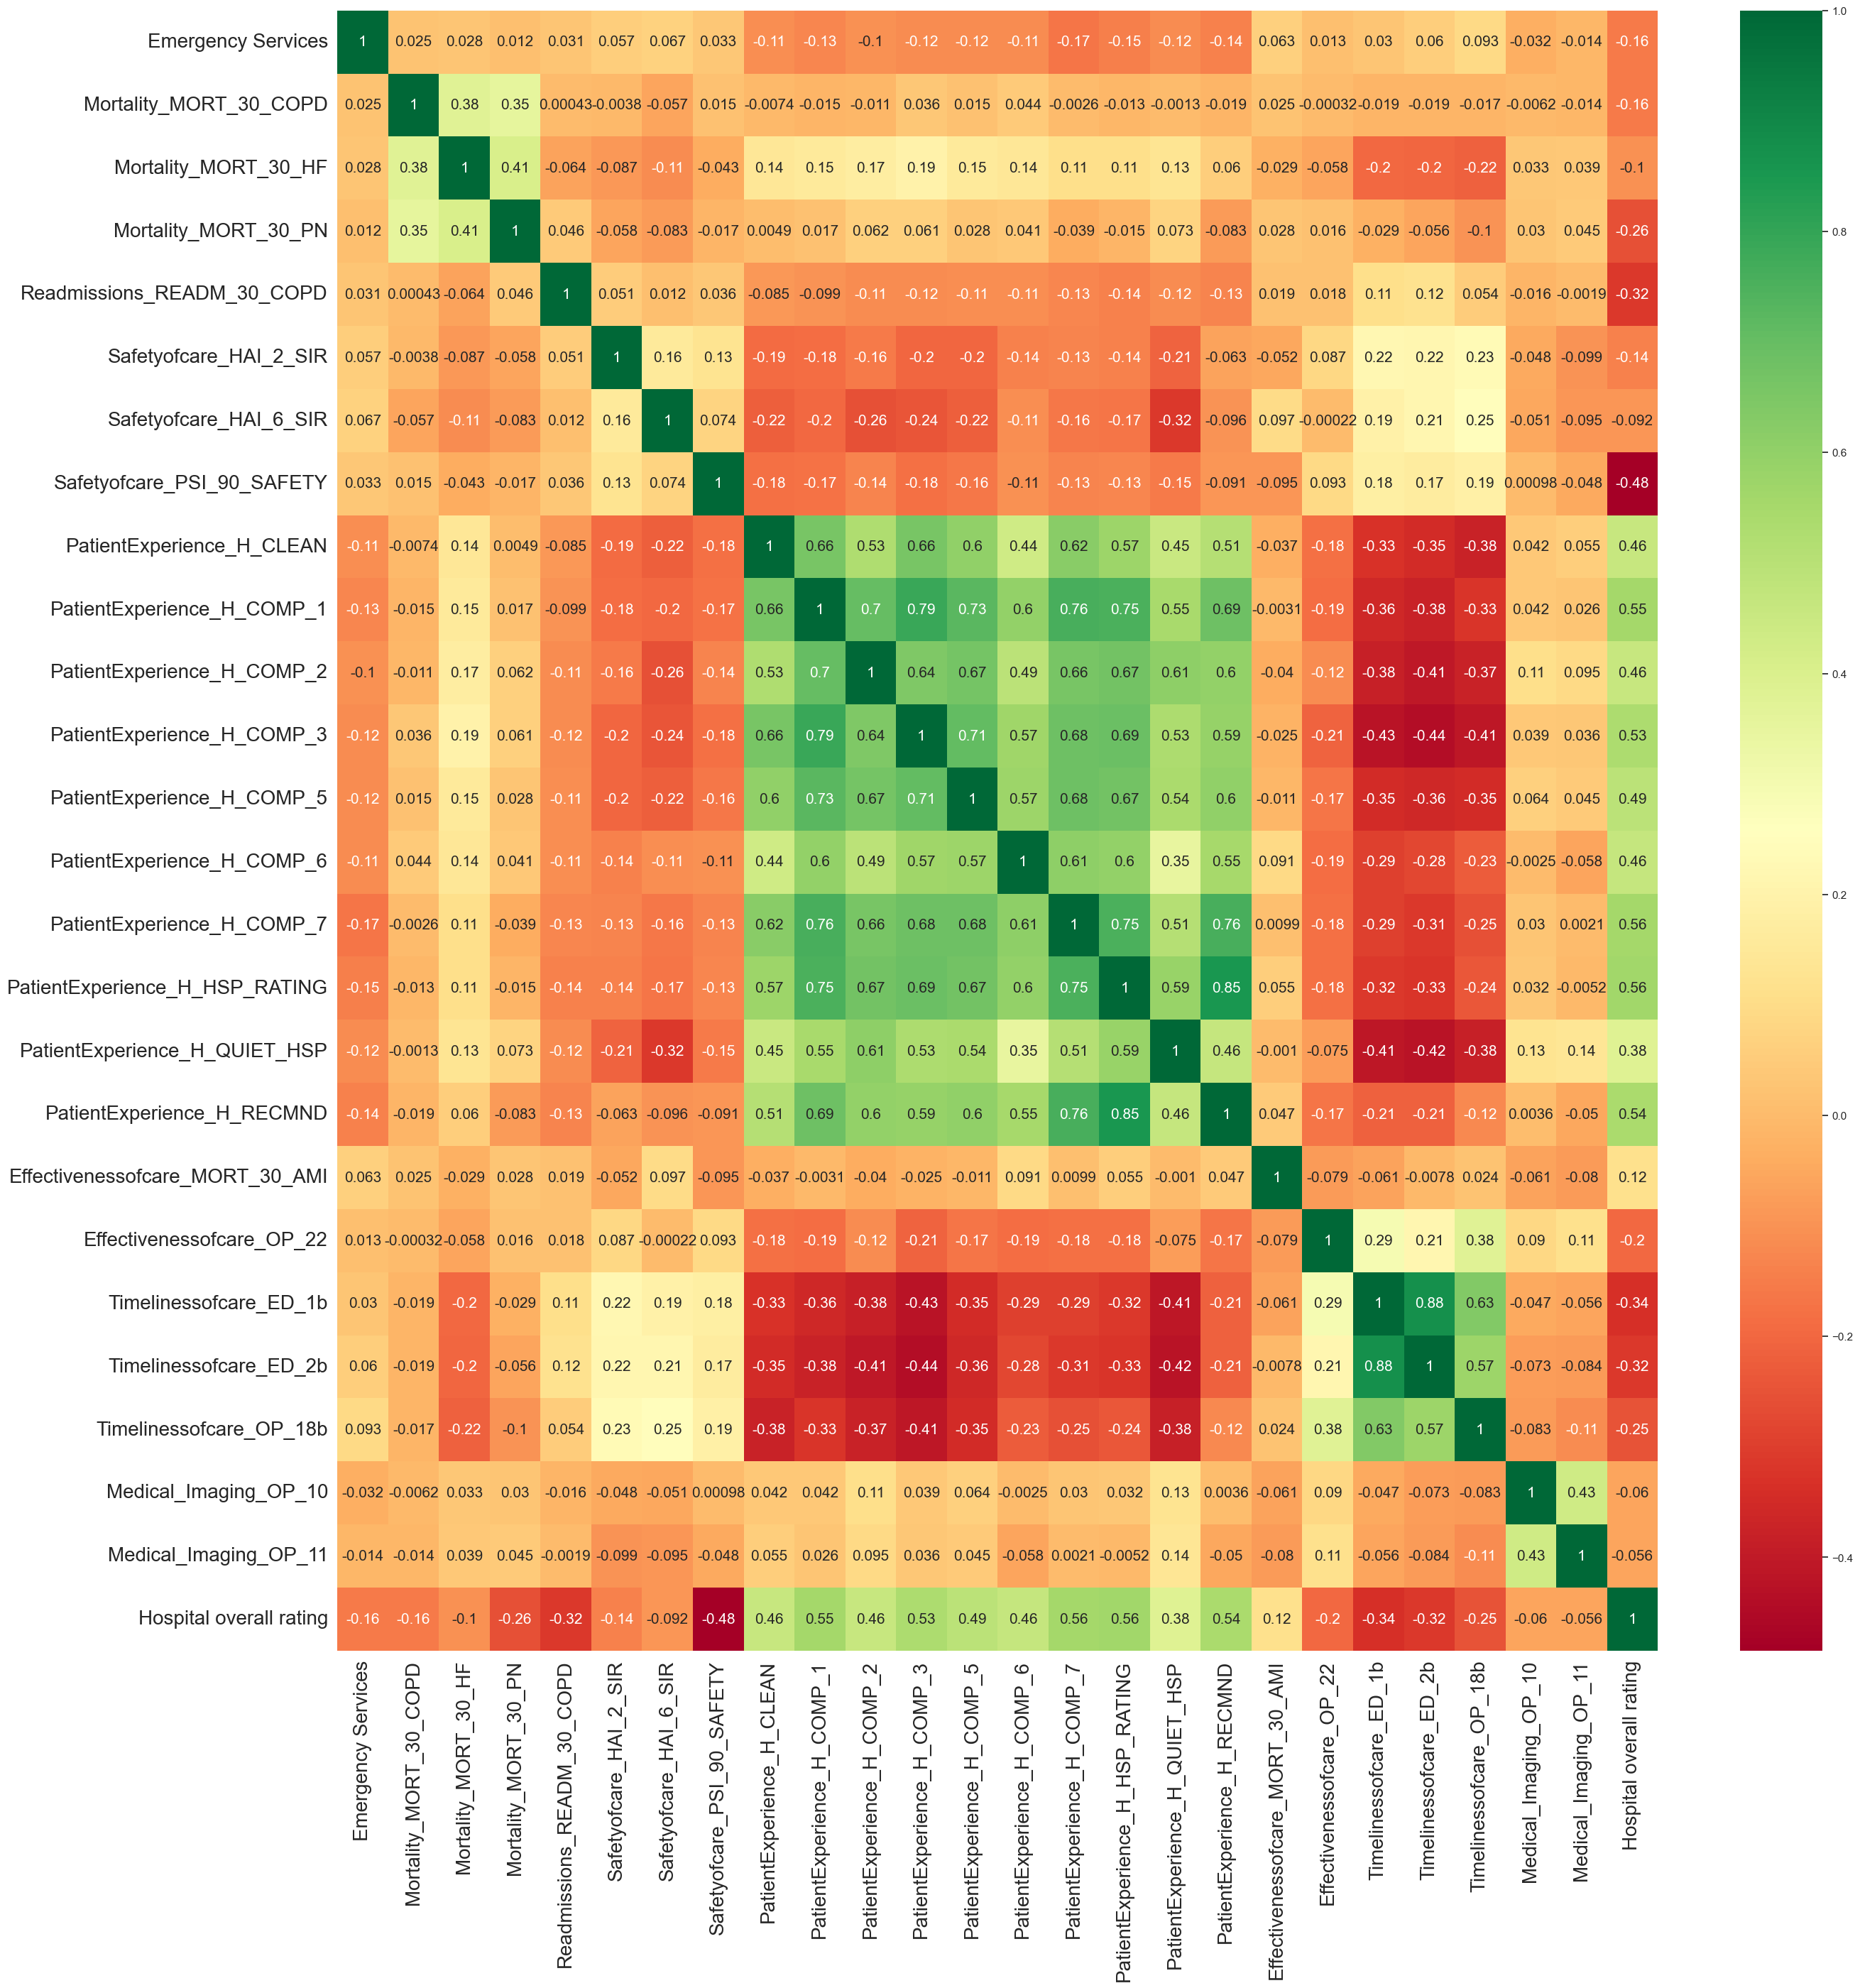

In [133]:
plt.figure(figsize = (30,30))
sns.heatmap(hfinal.corr(method='pearson'), cmap='RdYlGn', annot=True, annot_kws={"size":15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Preparing Data for Modelling

In [134]:
df = hfinal.copy()

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 10001 to 650001
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Efficient use of medical imaging national comparison  3648 non-null   object 
 1   Safety of care national comparison                    3648 non-null   object 
 2   Timeliness of care national comparison                3648 non-null   object 
 3   Mortality national comparison                         3648 non-null   object 
 4   Patient experience national comparison                3648 non-null   object 
 5   Effectiveness of care national comparison             3648 non-null   object 
 6   Readmission national comparison                       3648 non-null   object 
 7   Hospital Type                                         3648 non-null   object 
 8   Hospital Ownership                                  

In [136]:
# Bucketing the Categorical & Numerical columns
# -----------------------------------------------
categorical_columns = ['Efficient use of medical imaging national comparison', 
                    'Safety of care national comparison', 
                    'Timeliness of care national comparison', 
                    'Mortality national comparison', 
                    'Patient experience national comparison', 
                    'Effectiveness of care national comparison', 
                    'Readmission national comparison', 
                    'Hospital Type', 'Hospital Ownership']
temp_df = df.copy()
temp_df.drop(categorical_columns, axis=1 ,inplace=True)
temp_df.drop('Hospital overall rating', axis=1 ,inplace=True)
numerical_columns = list(temp_df.columns)

In [137]:
print('Categorical Columns:')
print(categorical_columns)
print('__________________________________________________________________________________________________________')
print('Numerical Columns:')
print(numerical_columns)

Categorical Columns:
['Efficient use of medical imaging national comparison', 'Safety of care national comparison', 'Timeliness of care national comparison', 'Mortality national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Readmission national comparison', 'Hospital Type', 'Hospital Ownership']
__________________________________________________________________________________________________________
Numerical Columns:
['Emergency Services', 'Mortality_MORT_30_COPD', 'Mortality_MORT_30_HF', 'Mortality_MORT_30_PN', 'Readmissions_READM_30_COPD', 'Safetyofcare_HAI_2_SIR', 'Safetyofcare_HAI_6_SIR', 'Safetyofcare_PSI_90_SAFETY', 'PatientExperience_H_CLEAN', 'PatientExperience_H_COMP_1', 'PatientExperience_H_COMP_2', 'PatientExperience_H_COMP_3', 'PatientExperience_H_COMP_5', 'PatientExperience_H_COMP_6', 'PatientExperience_H_COMP_7', 'PatientExperience_H_HSP_RATING', 'PatientExperience_H_QUIET_HSP', 'PatientExperience_H_RECMND', 'Effect

#### Dummy_Encoding

In [138]:
dummy_var = pd.get_dummies(df[categorical_columns], drop_first=True)
dummy_var.head(3)

Efficient use of medical imaging national comparison_Below  \
Provider ID                                                               
10001                                                        0            
10005                                                        1            
10006                                                        0            

             Efficient use of medical imaging national comparison_Same  \
Provider ID                                                              
10001                                                        1           
10005                                                        0           
10006                                                        1           

             Safety of care national comparison_Below  \
Provider ID                                             
10001                                               0   
10005                                               0   
10006                                               0   

             Safety of care national comparison_Same  \
Provider ID                                            
10001                                              0   
10005                                              1   
10006                                              1   

             Timeliness of care national comparison_Below  \
Provider ID                                                 
10001                                                   0   
10005                                                   0   
10006                                                   0   

             Timeliness of care national comparison_Same  \
Provider ID                                                
10001                                                  1   
10005                                                  0   
10006                                                  0   

             Mortality national comparison_Below  \
Provider ID                                        
10001                                          0   
10005                                          1   
10006                                          1   

             Mortality national comparison_Same  \
Provider ID                                       
10001                                         1   
10005                                         0   
10006                                         0   

             Patient experience national comparison_Below  \
Provider ID                                                 
10001                                                   1   
10005                                                   0   
10006                                                   1   

             Patient experience national comparison_Same  \
Provider ID                                                
10001                                                  0   
10005                                                  1   
10006                                                  0   

             Effectiveness of care national comparison_Below  \
Provider ID                                                    
10001                                                      0   
10005                                                      0   
10006                                                      0   

             Effectiveness of care national comparison_Same  \
Provider ID                                                   
10001                                                     1   
10005                                                     1   
10006                                                     1   

             Readmission national comparison_Below  \
Provider ID                                          
10001                                            0   
10005                                            0   
10006                                            0   

             Readmission national comparison_Same  \
Provide

In [139]:
df = pd.concat([df,dummy_var], axis=1)
df.drop(categorical_columns, axis=1, inplace=True)
df.head(3)

Emergency Services  Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                                     
10001                         1                   65.96                 69.27   
10005                         1                   53.90                 86.59   
10006                         1                   50.35                 87.15   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
10001                       57.84                       80.84   
10005                       77.61                       68.97   
10006                       67.91                       75.86   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
10001                         28.32                   21.12   
10005                          9.11                   10.70   
10006                         12.67                   13.64   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
10001                             31.78                       40.0   
10005                             39.72                       40.0   
10006                             42.52                       40.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
10001                              60.0                        60.0   
10005                              60.0                        80.0   
10006                              60.0                        80.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
10001                              40.0                        60.0   
10005                              60.0                        60.0   
10006                              60.0                        60.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
10001                              60.0                        60.0   
10005                              80.0                        40.0   
10006                              40.0                        40.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
10001                                  80.0                           80.0   
10005                                  80.0                           80.0   
10006                                  40.0                           80.0   

             PatientExperience_H_RECMND  Effectivenessofcare_MORT_30_AMI  \
Provider ID                                                                
10001                              80.0                             97.0   
10005                              60.0                             99.0   
10006                              40.0                            100.0   

             Effectivenessofcare_OP_22  Timelinessofcare_ED_1b  \
Provider ID                                                      
10001                            11.76                   25.97   
10005                             5.88                   23.46   
10006                             2.94                   20.95   

             Timelinessofcare_ED_2b  Timelinessofcare_OP_18b  \
Provider ID                                                    
10001                         10.30                    45.79   
10005                         10.76                    27.34   
10006                         11.82                    31.07   

             Medical_Imaging_OP_10  Medical_Imaging_OP_11  \
Provider ID                                                 


In [140]:
df.shape

(3648, 50)

#### Inspecting Class Imbalance of Target Variable

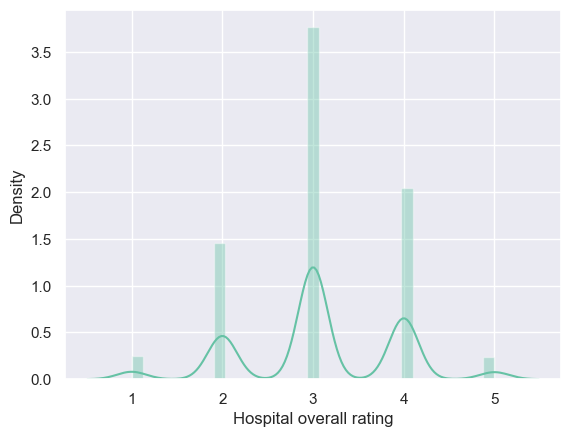

In [141]:
sns.distplot(df['Hospital overall rating'])
plt.show()

From the above we can see that '3' has majority volumes/counts making the dataset imbalance

In [142]:
# creating metrics list
metrics_list = ['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
models_scorecard = pd.DataFrame(columns=metrics_list)
models_scorecard

Empty DataFrame
Columns: [Model Name, Accuracy, Precision, Recall, F1 Score]
Index: []

In [143]:
df.shape

(3648, 50)

In [144]:
# Since we will be modelling now, before modelling let's separate our target hospital Evanston hospital(ID:140010) from dataset
target_hospital = df[df.index == 140010]
df = df[df.index != 140010]
target_hospital

Emergency Services  Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                                     
140010                        1                   40.43                 53.07   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
140010                      48.51                       75.48   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
140010                        11.49                   25.94   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
140010                            67.76                       60.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
140010                             60.0                        60.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
140010                             60.0                        40.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
140010                             60.0                        40.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
140010                                 80.0                           60.0   

             PatientExperience_H_RECMND  Effectivenessofcare_MORT_30_AMI  \
Provider ID                                                                
140010                             80.0                             97.0   

             Effectivenessofcare_OP_22  Timelinessofcare_ED_1b  \
Provider ID                                                      
140010                            2.94                   23.65   

             Timelinessofcare_ED_2b  Timelinessofcare_OP_18b  \
Provider ID                                                    
140010                        11.52                    38.79   

             Medical_Imaging_OP_10  Medical_Imaging_OP_11  \
Provider ID                                                 
140010                        7.63                   3.55   

             Hospital overall rating  \
Provider ID                            
140010                             3   

             Efficient use of medical imaging national comparison_Below  \
Provider ID                                                               
140010                                                       0            

             Efficient use of medical imaging national comparison_Same  \
Provider ID                                                              
140010                                                       0           

             Safety of care national comparison_Below  \
Provider ID                                             
140010                                              1   

             Safety of care national comparison_Same  \
Provider ID                                            
140010                                             0   

             Timeliness of care national comparison_Below  \
Provider ID                                                 
140010                                                  0   

             Timeliness of care national comparison_Same  \
Provider ID                                                
140010                                                 1   

             Mortality national comparison_Below  \
Provider ID                                        
140010                                         0   

             Mortality national comparison_Same  \
Provid

In [145]:
df.shape

(3647, 50)


### MODEL 1 - LINEAR REGRESSION 

In [146]:
df_linear = df.copy()

In [147]:
df_linear.head()

Emergency Services  Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                                     
10001                         1                   65.96                 69.27   
10005                         1                   53.90                 86.59   
10006                         1                   50.35                 87.15   
10007                         1                   65.96                 80.45   
10008                         1                   58.16                 70.95   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
10001                       57.84                       80.84   
10005                       77.61                       68.97   
10006                       67.91                       75.86   
10007                       70.15                       76.25   
10008                       58.58                       73.56   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
10001                         28.32                   21.12   
10005                          9.11                   10.70   
10006                         12.67                   13.64   
10007                          0.00                    0.00   
10008                         10.30                   15.51   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
10001                             31.78                       40.0   
10005                             39.72                       40.0   
10006                             42.52                       40.0   
10007                             36.92                       60.0   
10008                             42.06                       76.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
10001                              60.0                        60.0   
10005                              60.0                        80.0   
10006                              60.0                        80.0   
10007                              60.0                       100.0   
10008                              80.0                        76.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
10001                              40.0                        60.0   
10005                              60.0                        60.0   
10006                              60.0                        60.0   
10007                              80.0                        80.0   
10008                              76.0                        72.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
10001                              60.0                        60.0   
10005                              80.0                        40.0   
10006                              40.0                        40.0   
10007                              60.0                        60.0   
10008                              80.0                        64.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
10001                                  80.0                           80.0   
10005                                  80.0                           80.0   
10006                                  40.0                           80.0   
10007                                  60.0                          100.0   
10008                                  76.0                           76.0   

             Pa

In [148]:
#Defining X,Y Variables
X = df_linear.drop('Hospital overall rating', axis=1)
y = df_linear['Hospital overall rating']

print('X:',X.shape)
print()
print('Y:', y.shape)

X: (3647, 49)

Y: (3647,)


In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=100)

In [150]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2552, 49) (1095, 49) (2552,) (1095,)


In [151]:
X_train.head()

Emergency Services  Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                                     
450587                        1                   70.21                 68.72   
450163                        1                   52.48                 64.25   
500016                        1                   68.79                 79.89   
450044                        1                   56.03                 57.54   
30038                         1                   75.18                 52.51   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
450587                      87.69                       78.16   
450163                      48.88                       72.41   
500016                      79.85                       64.75   
450044                      52.61                       69.73   
30038                       55.60                       77.01   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
450587                         5.35                    8.56   
450163                         0.00                   13.37   
500016                         6.34                   20.86   
450044                         8.71                   30.48   
30038                         15.64                   28.34   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
450587                            30.37                       40.0   
450163                            35.05                       80.0   
500016                            28.97                       80.0   
450044                            51.40                       60.0   
30038                             49.53                       40.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
450587                             60.0                        80.0   
450163                             80.0                       100.0   
500016                             80.0                        80.0   
450044                             60.0                        60.0   
30038                              60.0                        40.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
450587                             60.0                        60.0   
450163                             60.0                        80.0   
500016                             80.0                        80.0   
450044                             40.0                        60.0   
30038                              80.0                        40.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
450587                             60.0                        40.0   
450163                             80.0                        60.0   
500016                            100.0                        80.0   
450044                             80.0                        80.0   
30038                              60.0                        40.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
450587                                 40.0                           40.0   
450163                                 60.0                           80.0   
500016                                 80.0                           60.0   
450044                                 80.0                           80.0   
30038                                  80.0                           20.0   

             Pa

In [152]:
#scaling the data
scaler = StandardScaler()
cols_to_scale = list(X_train.columns)
X_train[cols_to_scale]= scaler.fit_transform(X_train[cols_to_scale])
X_train.head()

Emergency Services  Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                                     
450587                 0.172809                1.710828              0.106156   
450163                 0.172809               -0.621339             -0.454064   
500016                 0.172809                1.524044              1.506080   
450044                 0.172809               -0.154380             -1.295021   
30038                  0.172809                2.364571             -1.925425   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
450587                   3.419688                    0.337633   
450163                  -1.585244                   -0.860768   
500016                   2.408643                   -2.457246   
450044                  -1.104224                   -1.419327   
30038                   -0.718634                    0.097953   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
450587                    -0.452948               -0.889862   
450163                    -1.115504               -0.530262   
500016                    -0.330344                0.029697   
450044                    -0.036838                0.748896   
30038                      0.821389                0.588908   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
450587                        -1.407510                  -0.924943   
450163                        -0.791545                   1.111688   
500016                        -1.591773                   1.111688   
450044                         1.360382                   0.093372   
30038                          1.114260                  -0.924943   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
450587                        -0.639374                    0.705425   
450163                         0.467752                    1.681909   
500016                         0.467752                    0.705425   
450044                        -0.639374                   -0.271058   
30038                         -0.639374                   -1.247542   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
450587                        -0.365239                   -0.145196   
450163                        -0.365239                    0.980380   
500016                         0.629097                    0.980380   
450044                        -1.359576                   -0.145196   
30038                          0.629097                   -1.270771   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
450587                        -0.439730                   -0.698481   
450163                         0.709115                    0.301364   
500016                         1.857959                    1.301208   
450044                         0.709115                    1.301208   
30038                         -0.439730                   -0.698481   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
450587                            -1.728845                      -0.960746   
450163                            -0.608476                       0.893466   
500016                             0.511893                      -0.033640   
450044                             0.511893                       0.893466   
30038                              0.511893                      -1.887852   

             Pa

In [153]:
# Instantiating Linear model
lineareg = LinearRegression()
lineareg.fit(X_train,y_train)

LinearRegression()

In [154]:
# Using Recursive Feature Engineering(RFE) to select top 15 features
rfe = RFE(estimator=lineareg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [155]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Emergency Services', False, 8),
 ('Mortality_MORT_30_COPD', False, 9),
 ('Mortality_MORT_30_HF', True, 1),
 ('Mortality_MORT_30_PN', True, 1),
 ('Readmissions_READM_30_COPD', False, 5),
 ('Safetyofcare_HAI_2_SIR', False, 34),
 ('Safetyofcare_HAI_6_SIR', False, 23),
 ('Safetyofcare_PSI_90_SAFETY', True, 1),
 ('PatientExperience_H_CLEAN', False, 11),
 ('PatientExperience_H_COMP_1', True, 1),
 ('PatientExperience_H_COMP_2', False, 14),
 ('PatientExperience_H_COMP_3', True, 1),
 ('PatientExperience_H_COMP_5', False, 13),
 ('PatientExperience_H_COMP_6', False, 7),
 ('PatientExperience_H_COMP_7', True, 1),
 ('PatientExperience_H_HSP_RATING', True, 1),
 ('PatientExperience_H_QUIET_HSP', False, 16),
 ('PatientExperience_H_RECMND', False, 10),
 ('Effectivenessofcare_MORT_30_AMI', False, 24),
 ('Effectivenessofcare_OP_22', False, 31),
 ('Timelinessofcare_ED_1b', False, 4),
 ('Timelinessofcare_ED_2b', False, 27),
 ('Timelinessofcare_OP_18b', False, 32),
 ('Medical_Imaging_OP_10', False, 6),
 (

In [156]:
# TOP 15 Features
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Mortality_MORT_30_HF', 'Mortality_MORT_30_PN',
       'Safetyofcare_PSI_90_SAFETY', 'PatientExperience_H_COMP_1',
       'PatientExperience_H_COMP_3', 'PatientExperience_H_COMP_7',
       'PatientExperience_H_HSP_RATING', 'Mortality national comparison_Below',
       'Mortality national comparison_Same',
       'Patient experience national comparison_Below',
       'Patient experience national comparison_Same',
       'Effectiveness of care national comparison_Below',
       'Readmission national comparison_Below',
       'Readmission national comparison_Same',
       'Hospital Type_Critical_Access'],
      dtype='object')

In [157]:
# Model Building
# Model - 1
X_train_lm = sm.add_constant(X_train[rfe_cols])
lr_1 = sm.OLS(y_train, X_train_lm)
model1 = lr_1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.758
Model:                                 OLS   Adj. R-squared:                  0.756
Method:                      Least Squares   F-statistic:                     528.6
Date:                     Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                             22:29:47   Log-Likelihood:                -1316.9
No. Observations:                     2552   AIC:                             2666.
Df Residuals:                         2536   BIC:                             2759.
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               3.0850      0.008    383.234      0.000       3.069       3.101
Mortality_MORT_30_HF                               -0.0891      0.010     -8.599      0.000      -0.109      -0.069
Mortality_MORT_30_PN                               -0.1176      0.010    -12.136      0.000      -0.137      -0.099
Safetyofcare_PSI_90_SAFETY                         -0.3100      0.008    -37.581      0.000      -0.326      -0.294
PatientExperience_H_COMP_1                          0.0726      0.016      4.478      0.000       0.041       0.104
PatientExperience_H_COMP_3                          0.1140      0.015      7.740      0.000       0.085       0.143
PatientExperience_H_COMP_7                          0.0794      0.014      5.483      0.000       0.051       0.108
PatientExperience_H_HSP_RATING                      0.1197      0.014      8.339      0.000       0.092       0.148
Mortality national comparison_Below                -0.1324      0.014     -9.422      0.000      -0.160      -0.105
Mortality national comparison_Same                 -0.0711      0.013     -5.620      0.000      -0.096      -0.046
Patient experience national comparison_Below       -0.1115      0.017     -6.621      0.000      -0.145      -0.079
Patient experience national comparison_Same        -0.1033      0.011     -9.166      0.000      -0.125      -0.081
Effectiveness of care national comparison_Below    -0.0781      0.008     -9.589      0.000      -0.094      -0.062
Readmission national comparison_Below              -0.3779      0.011    -35.619      0.000      -0.399      -0.357
Readmission national comparison_Same               -0.1990      0.011    -18.355      0.000      -0.220      -0.178
Hospital Type_Critical_Access                      -0.0761      0.009     -8.167      0.000      -0.094      -0.058
==============================================================================
Omnibus:                       10.270   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.563
Skew:                          -0.059   Prob(JB):                      0.00187
Kurtosis:                       3.323   Cond. No.                         5.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
#Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features   VIF
9      Patient experience national comparison_Below  4.38
3                        PatientExperience_H_COMP_1  4.05
4                        PatientExperience_H_COMP_3  3.35
5                        PatientExperience_H_COMP_7  3.24
6                    PatientExperience_H_HSP_RATING  3.18
7               Mortality national comparison_Below  3.05
8                Mortality national comparison_Same  2.47
10      Patient experience national comparison_Same  1.96
13             Readmission national comparison_Same  1.81
12            Readmission national comparison_Below  1.74
0                              Mortality_MORT_30_HF  1.66
1                              Mortality_MORT_30_PN  1.45
14                    Hospital Type_Critical_Access  1.34
2                        Safetyofcare_PSI_90_SAFETY  1.05
11  Effectiveness of care national comparison_Below  1.02

#### From the above we can see Model-1 has all the features with P-Value less than 0.05 (In Control) & VIF Scores are also below 5.00(In Control) Thus, This model is good enough for prediction

In [159]:
# Predicting

y_train_pred = model1.predict(X_train_lm)
y_train_pred

Provider ID
450587    2.488023
450163    3.304573
500016    3.803558
450044    2.911771
30038     3.034545
160024    3.722225
50108     3.379634
250102    3.204159
100260    2.060167
170075    3.147202
330233    1.056061
330085    2.497884
670060    3.429131
330234    0.819076
50296     2.153423
370037    3.004644
170006    2.924969
110076    2.168291
240038    2.859001
30088     4.215632
490143    4.238365
390157    1.875653
390231    2.142695
460015    4.145458
281320    2.915831
100018    3.064539
310010    2.727152
151303    3.608796
390223    3.772399
501314    3.146736
130065    3.154471
460019    2.914892
100057    2.539770
140032    3.905016
140182    2.098347
50641     2.753608
50071     3.261827
271318    3.776896
360098    3.154197
440048    2.104041
390228    3.821658
521311    3.825295
341325    3.884417
230030    3.070541
161347    3.740990
260209    3.140599
360066    3.804138
460042    4.360968
10089     2.932148
10109     3.300989
410010    2.062902
190160    2.641175


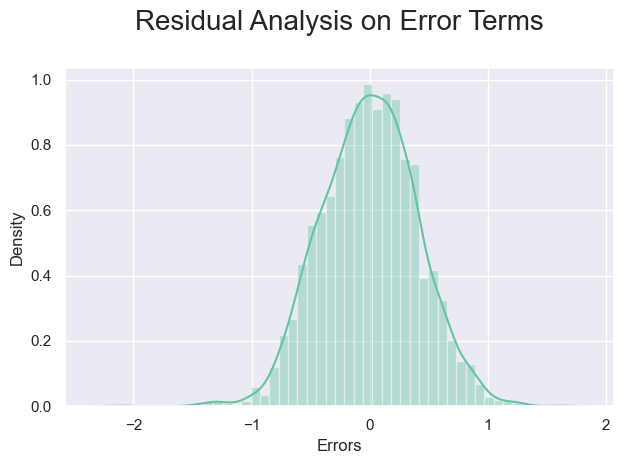

In [160]:
# Residual Analysis

# Plotting Error terms
error = y_train - y_train_pred
sns.distplot(error)
plt.title('Residual Analysis on Error Terms\n', fontsize=20)
plt.xlabel('Errors')

plt.tight_layout()

From the above, we can observe that our assumptions are satisfied, i.e. the Error terms are normally distributed.

In [161]:
# Predicting on test set
X_test.head()

Emergency Services  Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                                     
281322                        1                   58.30                 78.21   
50616                         1                   60.99                 75.98   
450082                        1                   53.19                 74.30   
360046                        1                   68.09                 81.01   
440125                        1                   56.03                 72.63   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
281322                      68.28                       75.48   
50616                       74.63                       81.99   
450082                      51.12                       74.71   
360046                      67.16                       77.01   
440125                      63.06                       82.38   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
281322                         7.13                    3.21   
50616                          2.77                   56.42   
450082                         0.00                   18.98   
360046                         0.00                   60.96   
440125                         7.72                   19.25   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
281322                            40.19                       72.0   
50616                             34.11                       40.0   
450082                            44.39                       80.0   
360046                            49.07                       60.0   
440125                            28.50                       40.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
281322                             76.0                        80.0   
50616                              60.0                        40.0   
450082                            100.0                        60.0   
360046                            100.0                       100.0   
440125                             80.0                        80.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
281322                             80.0                        76.0   
50616                              40.0                        60.0   
450082                             80.0                        60.0   
360046                             80.0                        80.0   
440125                             60.0                        60.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
281322                             80.0                        64.0   
50616                              60.0                        40.0   
450082                             60.0                        40.0   
360046                             80.0                        40.0   
440125                             80.0                        60.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
281322                                 84.0                           72.0   
50616                                  40.0                           20.0   
450082                                 60.0                           80.0   
360046                                 80.0                           80.0   
440125                                 80.0                           60.0   

             Pa

In [162]:
#scaling the data

cols_to_scale = list(X_test.columns)
X_test[cols_to_scale]= scaler.transform(X_test[cols_to_scale])
X_test.head()

Emergency Services  Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                                     
281322                 0.172809                0.144211              1.295528   
50616                  0.172809                0.498048              1.016044   
450082                 0.172809               -0.527947              0.805492   
360046                 0.172809                1.431967              1.646449   
440125                 0.172809               -0.154380              0.596192   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
281322                   0.916577                   -0.220926   
50616                    1.735472                    1.135872   
450082                  -1.296374                   -0.381407   
360046                   0.772142                    0.097953   
440125                   0.243407                    1.217155   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
281322                    -0.232509               -1.289832   
50616                     -0.772461                2.688193   
450082                    -1.115504               -0.110853   
360046                    -1.115504                3.027607   
440125                    -0.159442               -0.090668   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
281322                        -0.115037                   0.704362   
50616                         -0.915264                  -0.924943   
450082                         0.437752                   1.111688   
360046                         1.053716                   0.093372   
440125                        -1.653632                  -0.924943   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
281322                         0.246327                    0.705425   
50616                         -0.639374                   -1.247542   
450082                         1.574878                   -0.271058   
360046                         1.574878                    1.681909   
440125                         0.467752                    0.705425   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
281322                         0.629097                    0.755265   
50616                         -1.359576                   -0.145196   
450082                         0.629097                   -0.145196   
360046                         0.629097                    0.980380   
440125                        -0.365239                   -0.145196   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
281322                         0.709115                    0.501333   
50616                         -0.439730                   -0.698481   
450082                        -0.439730                   -0.698481   
360046                         0.709115                   -0.698481   
440125                         0.709115                    0.301364   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
281322                             0.735967                       0.522623   
50616                             -1.728845                      -1.887852   
450082                            -0.608476                       0.893466   
360046                             0.511893                       0.893466   
440125                             0.511893                      -0.033640   

             Pa

In [163]:
# Keeping only required columns as per RFE
X_test = X_test[rfe_cols]
X_test.head()

Mortality_MORT_30_HF  Mortality_MORT_30_PN  \
Provider ID                                               
281322                   1.295528              0.916577   
50616                    1.016044              1.735472   
450082                   0.805492             -1.296374   
360046                   1.646449              0.772142   
440125                   0.596192              0.243407   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_COMP_1  \
Provider ID                                                           
281322                        -0.115037                    0.246327   
50616                         -0.915264                   -0.639374   
450082                         0.437752                    1.574878   
360046                         1.053716                    1.574878   
440125                        -1.653632                    0.467752   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_7  \
Provider ID                                                           
281322                         0.629097                    0.501333   
50616                         -1.359576                   -0.698481   
450082                         0.629097                   -0.698481   
360046                         0.629097                   -0.698481   
440125                        -0.365239                    0.301364   

             PatientExperience_H_HSP_RATING  \
Provider ID                                   
281322                             0.735967   
50616                             -1.728845   
450082                            -0.608476   
360046                             0.511893   
440125                             0.511893   

             Mortality national comparison_Below  \
Provider ID                                        
281322                                 -0.319962   
50616                                   3.125369   
450082                                 -0.319962   
360046                                 -0.319962   
440125                                 -0.319962   

             Mortality national comparison_Same  \
Provider ID                                       
281322                                 0.504038   
50616                                 -1.983978   
450082                                 0.504038   
360046                                 0.504038   
440125                                 0.504038   

             Patient experience national comparison_Below  \
Provider ID                                                 
281322                                          -0.650015   
50616                                            1.538426   
450082                                          -0.650015   
360046                                          -0.650015   
440125                                          -0.650015   

             Patient experience national comparison_Same  \
Provider ID                                                
281322                                          1.250929   
50616                                          -0.799406   
450082                                          1.250929   
360046                                         -0.799406   
440125                                         -0.799406   

             Effectiveness of care national comparison_Below  \
Provider ID                                                    
281322                                             -0.377964   
50616                                              -0.377964   
450082                                             -0.377964   
360046                                              2.645751   
440125                                             -0.377964   

             Readmission national comparison_Below  \
Provider ID                                          
281322                                   -0.553812   
50616                                    -0.553812   
450082                              

In [164]:
# Adding constant
X_test_lm = sm.add_constant(X_test)

In [165]:
y_test_pred = model1.predict(X_test_lm)
y_test_pred

Provider ID
281322    2.946944
50616     2.339050
450082    3.127732
360046    2.728303
440125    3.845347
360144    2.955084
141310    3.628003
10019     1.733147
160040    2.959121
250020    3.128254
520035    4.071234
51304     3.009320
450874    3.845049
170109    4.066036
280032    2.954576
240047    2.783351
251309    3.287627
450518    3.260151
100211    2.089654
370029    3.026805
50191     3.170746
50030     3.283724
290039    2.248889
150090    2.435128
171375    3.314040
390194    2.415352
180029    2.631321
150002    3.548022
490120    2.516975
440102    2.611900
60032     3.858493
260027    2.466856
220175    3.249477
670004    3.612318
361308    3.888622
140213    3.925538
171380    3.148436
330191    3.847459
140122    4.625034
500051    3.688359
50242     3.181974
441314    3.038577
450747    2.944811
360132    3.905437
100035    1.361630
50376     2.708242
160032    3.150746
430013    4.275153
50570     3.606351
10034     3.350111
100117    3.982592
340126    3.764960


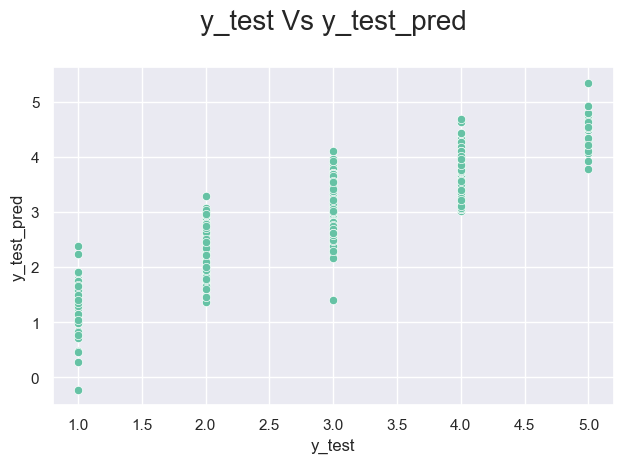

In [166]:
# Test_Data vs Predicted_Data
sns.scatterplot(x=y_test,y=y_test_pred)
plt.title('y_test Vs y_test_pred\n', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.tight_layout()

In [167]:
# Getting r2_Score:
r2_score(y_test, y_test_pred)

0.7858642860272698

In [168]:
# Concatenating
y_pred_final = pd.concat([y_test,y_test_pred],axis=1)

#y_pred_final = pd.concat([X_test_ind,y_pred_final],axis=1)
y_pred_final.rename(columns={0:'Predicted_rating'}, inplace=True)
y_pred_final.Predicted_rating = y_pred_final.Predicted_rating.apply(lambda x: int(round(x,0))) 
y_pred_final.reset_index(inplace=True)
y_pred_final

Provider ID  Hospital overall rating  Predicted_rating
0          281322                        3                 3
1           50616                        3                 2
2          450082                        3                 3
3          360046                        3                 3
4          440125                        4                 4
5          360144                        3                 3
6          141310                        4                 4
7           10019                        2                 2
8          160040                        3                 3
9          250020                        3                 3
10         520035                        4                 4
11          51304                        3                 3
12         450874                        4                 4
13         170109                        4                 4
14         280032                        3                 3
15         240047                        3                 3
16         251309                        2                 3
17         450518                        3                 3
18         100211                        2                 2
19         370029                        3                 3
20          50191                        3                 3
21          50030                        3                 3
22         290039                        2                 2
23         150090                        2                 2
24         171375                        3                 3
25         390194                        2                 2
26         180029                        2                 3
27         150002                        3                 4
28         490120                        2                 3
29         440102                        3                 3
30          60032                        4                 4
31         260027                        3                 2
32         220175                        3                 3
33         670004                        4                 4
34         361308                        4                 4
35         140213                        4                 4
36         171380                        3                 3
37         330191                        4                 4
38         140122                        4                 5
39         500051                        3                 4
40          50242                        4                 3
41         441314                        3                 3
42         450747                        3                 3
43         360132                        4                 4
44         100035                        2                 1
45          50376                        2                 3
46         160032                        3                 3
47         430013                        4                 4
48          50570                        4                 4
49          10034                        4                 3
50         100117                        4                 4
51         340126                        4                 4
52         530011                        2                 3
53         221302                        4                 4
54         420019                        3                 3
55         450015                        2                 2
56         360159                        3                 3
57         100183                        3                 3
58         140083                        3                 4
59         390079                        2                 3
60         420057                        3                 3
61         180011                        3                 3
62          10011                        2                 2
63         190236                        5                 5
64         100320                        

In [169]:
# Let's check the overall accuracy.
linear_reg_Accuracy = metrics.accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final['Predicted_rating'])
linear_reg_Accuracy

0.8

#### From the above linear regression model we can observe that the accuracy score is 78% which is decent score & R-Square is 76.9% which is good

In [170]:
# Reporting final model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.758
Model:                                 OLS   Adj. R-squared:                  0.756
Method:                      Least Squares   F-statistic:                     528.6
Date:                     Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                             22:29:49   Log-Likelihood:                -1316.9
No. Observations:                     2552   AIC:                             2666.
Df Residuals:                         2536   BIC:                             2759.
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               3.0850      0.008    383.234      0.000       3.069       3.101
Mortality_MORT_30_HF                               -0.0891      0.010     -8.599      0.000      -0.109      -0.069
Mortality_MORT_30_PN                               -0.1176      0.010    -12.136      0.000      -0.137      -0.099
Safetyofcare_PSI_90_SAFETY                         -0.3100      0.008    -37.581      0.000      -0.326      -0.294
PatientExperience_H_COMP_1                          0.0726      0.016      4.478      0.000       0.041       0.104
PatientExperience_H_COMP_3                          0.1140      0.015      7.740      0.000       0.085       0.143
PatientExperience_H_COMP_7                          0.0794      0.014      5.483      0.000       0.051       0.108
PatientExperience_H_HSP_RATING                      0.1197      0.014      8.339      0.000       0.092       0.148
Mortality national comparison_Below                -0.1324      0.014     -9.422      0.000      -0.160      -0.105
Mortality national comparison_Same                 -0.0711      0.013     -5.620      0.000      -0.096      -0.046
Patient experience national comparison_Below       -0.1115      0.017     -6.621      0.000      -0.145      -0.079
Patient experience national comparison_Same        -0.1033      0.011     -9.166      0.000      -0.125      -0.081
Effectiveness of care national comparison_Below    -0.0781      0.008     -9.589      0.000      -0.094      -0.062
Readmission national comparison_Below              -0.3779      0.011    -35.619      0.000      -0.399      -0.357
Readmission national comparison_Same               -0.1990      0.011    -18.355      0.000      -0.220      -0.178
Hospital Type_Critical_Access                      -0.0761      0.009     -8.167      0.000      -0.094      -0.058
==============================================================================
Omnibus:                       10.270   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.563
Skew:                          -0.059   Prob(JB):                      0.00187
Kurtosis:                       3.323   Cond. No.                         5.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Equation for best fitted line is:

Rating = 3.0866 + -0.0874 x Mortality_MORT_30_HF + -0.1212 x Mortality_MORT_30_PN + -0.3133 x Safetyofcare_PSI_90_SAFETY + 0.0649 x PatientExperience_H_COMP_1 + 0.1147 x PatientExperience_H_COMP_3 + 0.0844 x PatientExperience_H_COMP_7 + 0.1091 x PatientExperience_H_HSP_RATING + -0.1345 x Mortality national comparison_Below + -0.0696 x Mortality national comparison_Same + -0.1246 x Patient experience national comparison_Below + -0.1098 x Patient experience national comparison_Same + -0.077 x Effectiveness of care national comparison_Below + -0.3752 x Readmission national comparison_Below + -0.193 x Readmission national comparison_Same + -0.0753 x Hospital Type_Critical_Access

In [171]:
# Appending the Performance metrics to the scorecard dataframe
models_scorecard.loc[len(models_scorecard.index)] = ["Linear Regression", 
                                                       round((linear_reg_Accuracy*100),2), 
                                                       '-',
                                                       '-',
                                                       '-']
models_scorecard

Model Name  Accuracy Precision Recall F1 Score
0  Linear Regression      80.0         -      -        -


### MODEL 2 - LOGISTIC REGRESSION 

#### Logistic Regression without hyperparameter tuning

In [172]:
df_logistic = df.copy()

In [173]:
df_logistic.reset_index(inplace=True)

In [174]:
df_logistic.head()

Provider ID  Emergency Services  Mortality_MORT_30_COPD  \
0        10001                   1                   65.96   
1        10005                   1                   53.90   
2        10006                   1                   50.35   
3        10007                   1                   65.96   
4        10008                   1                   58.16   

   Mortality_MORT_30_HF  Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
0                 69.27                 57.84                       80.84   
1                 86.59                 77.61                       68.97   
2                 87.15                 67.91                       75.86   
3                 80.45                 70.15                       76.25   
4                 70.95                 58.58                       73.56   

   Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  Safetyofcare_PSI_90_SAFETY  \
0                   28.32                   21.12                       31.78   
1                    9.11                   10.70                       39.72   
2                   12.67                   13.64                       42.52   
3                    0.00                    0.00                       36.92   
4                   10.30                   15.51                       42.06   

   PatientExperience_H_CLEAN  PatientExperience_H_COMP_1  \
0                       40.0                        60.0   
1                       40.0                        60.0   
2                       40.0                        60.0   
3                       60.0                        60.0   
4                       76.0                        80.0   

   PatientExperience_H_COMP_2  PatientExperience_H_COMP_3  \
0                        60.0                        40.0   
1                        80.0                        60.0   
2                        80.0                        60.0   
3                       100.0                        80.0   
4                        76.0                        76.0   

   PatientExperience_H_COMP_5  PatientExperience_H_COMP_6  \
0                        60.0                        60.0   
1                        60.0                        80.0   
2                        60.0                        40.0   
3                        80.0                        60.0   
4                        72.0                        80.0   

   PatientExperience_H_COMP_7  PatientExperience_H_HSP_RATING  \
0                        60.0                            80.0   
1                        40.0                            80.0   
2                        40.0                            40.0   
3                        60.0                            60.0   
4                        64.0                            76.0   

   PatientExperience_H_QUIET_HSP  PatientExperience_H_RECMND  \
0                           80.0                        80.0   
1                           80.0                        60.0   
2                           80.0                        40.0   
3                          100.0                        60.0   
4                           76.0                        68.0   

   Effectivenessofcare_MORT_30_AMI  Effectivenessofcare_OP_22  \
0                             97.0                      11.76   
1                             99.0                       5.88   
2                            100.0                       2.94   
3                             99.0                       2.94   
4                             95.0                       2.94   

   Timelinessofcare_ED_1b  Timelinessofcare_ED_2b  Timelinessofcare_OP_18b  \
0                   25.97                   10.30                    45.79   
1                   23.46                   10.76                    27.34   
2                   20.95                   11.82                    31.07   
3                   21.14                   10.30                    27.80   
4                   17.37   

In [175]:
# Defining various Model Evaluation Metrics

logistic_accuracies_1 = []
logistic_precision_1 = []
logistic_recall_1 = []
logistic_f1scores_1 = []

In [176]:
#Defining X,Y Variables
X = df_logistic.drop('Hospital overall rating', axis=1)
y = df_logistic['Hospital overall rating']

print('X:',X.shape)
print()
print('Y:', y.shape)

X: (3647, 50)

Y: (3647,)


In [177]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [178]:
x_scaled

array([[-1.61849958,  0.17635136,  1.10936803, ..., -0.30800391,
        -0.34901099, -0.8796776 ],
       [-1.61847414,  0.17635136, -0.44007929, ..., -0.30800391,
        -0.34901099, -0.8796776 ],
       [-1.61846778,  0.17635136, -0.89617697, ..., -0.30800391,
        -0.34901099, -0.8796776 ],
       ...,
       [ 1.37012139,  0.17635136,  0.19845746, ..., -0.30800391,
        -0.34901099, -0.8796776 ],
       [ 1.37012775,  0.17635136,  1.20058757, ..., -0.30800391,
        -0.34901099, -0.8796776 ],
       [ 2.45111195,  0.17635136,  1.56418093, ..., -0.30800391,
        -0.34901099, -0.8796776 ]])

In [179]:
# Logistic regression model initiation
logistic_model = LogisticRegression(random_state=0, multi_class='ovr')

In [180]:
# Initialization of the Stratified K-Fold Cross Validation Object 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [181]:
#metrics
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [182]:
# Training and Evaluating the model using Stratified K-Fold Cross Validation

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    logistic_model.fit(x_train_fold, y_train_fold)
    
    y_test_fold_pred = logistic_model.predict(x_test_fold)
    
    logistic_accuracies_1.append(logistic_model.score(x_test_fold, y_test_fold))
    logistic_f1scores_1.append(metrics.f1_score(y_test_fold, y_test_fold_pred, average='macro'))
    logistic_precision_1.append(metrics.precision_score(y_test_fold, y_test_fold_pred, average='macro'))
    logistic_recall_1.append(metrics.recall_score(y_test_fold, y_test_fold_pred, average='macro'))

In [183]:
accuracy1 = str((mean(logistic_accuracies_1)*100).round(2))
precision1 = str((mean(logistic_precision_1)*100).round(2))
recall1 = str((mean(logistic_recall_1)*100).round(2))
f1score1 = str((mean(logistic_f1scores_1)*100).round(2))

In [184]:
# Appending the Performance metrics to the scorecard dataframe

models_scorecard.loc[len(models_scorecard.index)] = ["Logistic Regression", 
                                                       accuracy1, 
                                                       precision1,
                                                       recall1,
                                                       f1score1]
models_scorecard

Model Name Accuracy Precision Recall F1 Score
0    Linear Regression     80.0         -      -        -
1  Logistic Regression    73.95     77.56  59.71     65.3

#### Logistic Regression - With Hyperparameter Tuning

In [185]:
df_logistic_2 = df.copy()

In [186]:
df_logistic_2.reset_index(inplace=True)

In [187]:
#Defining X,Y Variables
X = df_logistic_2.drop('Hospital overall rating', axis=1)
y = df_logistic_2['Hospital overall rating']

print('X:',X.shape)
print()
print('Y:', y.shape)

X: (3647, 50)

Y: (3647,)


In [188]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [189]:
# Logistic regression model initiation
logistic_model_2 = LogisticRegression(random_state=0, multi_class='ovr', class_weight='Balanced')

In [190]:
# Defining the parameters for Logistic Regression
logistic_reg_parameters = {'penalty': ['l1', 'l2'], 
                     'C':[0.001, 0.01, 1, 10, 100, 1000, 10000]}

In [191]:
# Gridsearch CV
logistic_reg_cv = GridSearchCV(logistic_model_2, logistic_reg_parameters, verbose=2)

In [192]:
# Initialization of the Stratified K-Fold Cross Validation Object 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [193]:
# Training and Inspecting Logistic Regression models using Stratified K-Fold Cross Validation method
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    logistic_reg_cv.fit(x_train_fold, y_train_fold)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

[CV] END ...................................C=10, penalty=l2; total time=   0.5s
[CV] END ...................................C=10, penalty=l2; total time=   0.5s
[CV] END ...................................C=10, penalty=l2; total time=   0.5s
[CV] END ...................................C=10, penalty=l2; total time=   0.5s
[CV] END ...................................C=10, penalty=l2; total time=   0.6s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.4s
[CV] END ..................................C=100, penalty=l2; total time=   0.4s
[CV] END ...................

[CV] END ................................C=10000, penalty=l2; total time=   0.6s
[CV] END ................................C=10000, penalty=l2; total time=   0.5s
[CV] END ................................C=10000, penalty=l2; total time=   0.7s
[CV] END ................................C=10000, penalty=l2; total time=   0.5s
Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001

[CV] END ....................................C=1, penalty=l2; total time=   0.4s
[CV] END ....................................C=1, penalty=l2; total time=   0.4s
[CV] END ....................................C=1, penalty=l2; total time=   0.5s
[CV] END ....................................C=1, penalty=l2; total time=   0.5s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l2; total time=   0.7s
[CV] END ...................................C=10, penalty=l2; total time=   0.5s
[CV] END ...................................C=10, penalty=l2; total time=   0.5s
[CV] END ...................

[CV] END .................................C=1000, penalty=l2; total time=   0.3s
[CV] END .................................C=1000, penalty=l2; total time=   0.4s
[CV] END .................................C=1000, penalty=l2; total time=   0.3s
[CV] END ................................C=10000, penalty=l1; total time=   0.0s
[CV] END ................................C=10000, penalty=l1; total time=   0.0s
[CV] END ................................C=10000, penalty=l1; total time=   0.0s
[CV] END ................................C=10000, penalty=l1; total time=   0.0s
[CV] END ................................C=10000, penalty=l1; total time=   0.0s
[CV] END ................................C=10000, penalty=l2; total time=   0.3s
[CV] END ................................C=10000, penalty=l2; total time=   0.3s
[CV] END ................................C=10000, penalty=l2; total time=   0.3s
[CV] END ................................C=10000, penalty=l2; total time=   0.3s
[CV] END ...................

[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.2s
[CV] END ....................................C=1, penalty=l2; total time=   0.2s
[CV] END ....................................C=1, penalty=l2; total time=   0.2s
[CV] END ....................................C=1, penalty=l2; total time=   0.2s
[CV] END ...................

[CV] END ..................................C=100, penalty=l2; total time=   0.3s
[CV] END ..................................C=100, penalty=l2; total time=   0.3s
[CV] END .................................C=1000, penalty=l1; total time=   0.0s
[CV] END .................................C=1000, penalty=l1; total time=   0.0s
[CV] END .................................C=1000, penalty=l1; total time=   0.0s
[CV] END .................................C=1000, penalty=l1; total time=   0.0s
[CV] END .................................C=1000, penalty=l1; total time=   0.0s
[CV] END .................................C=1000, penalty=l2; total time=   0.3s
[CV] END .................................C=1000, penalty=l2; total time=   0.3s
[CV] END .................................C=1000, penalty=l2; total time=   0.2s
[CV] END .................................C=1000, penalty=l2; total time=   0.3s
[CV] END .................................C=1000, penalty=l2; total time=   0.3s
[CV] END ...................

In [194]:
# Best estimator
logistic_bestEstimator = logistic_reg_cv.best_estimator_
logistic_bestEstimator

LogisticRegression(C=10, class_weight='Balanced', multi_class='ovr',
                   random_state=0)

Since we have found our best estimator let's re-run the stratified K-Fold cross validation to get best metrics

In [195]:
# Defining various Model Evaluation Metrics

logistic_accuracies_2 = []
logistic_precision_2 = []
logistic_recall_2 = []
logistic_f1scores_2 = []

In [196]:
# Training and Inspecting the Best model using Stratified K-Fold Cross Validation

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    logistic_bestEstimator.fit(x_train_fold, y_train_fold)
    
    y_test_fold_pred = logistic_bestEstimator.predict(x_test_fold)
    
    logistic_accuracies_2.append(logistic_bestEstimator.score(x_test_fold, y_test_fold))
    logistic_f1scores_2.append(metrics.f1_score(y_test_fold, y_test_fold_pred, average='macro'))
    logistic_precision_2.append(metrics.precision_score(y_test_fold, y_test_fold_pred, average='macro'))
    logistic_recall_2.append(metrics.recall_score(y_test_fold, y_test_fold_pred, average='macro'))

In [197]:
accuracy2 = str((mean(logistic_accuracies_2)*100).round(2))
precision2 = str((mean(logistic_precision_2)*100).round(2))
recall2 = str((mean(logistic_recall_2)*100).round(2))
f1score2 = str((mean(logistic_f1scores_2)*100).round(2))

In [198]:
# Appending the Performance metrics to the scorecard dataframe

models_scorecard.loc[len(models_scorecard.index)] = ["Logistic Regression with hyper parameter tuning", 
                                                       accuracy2, 
                                                       precision2,
                                                       recall2,
                                                       f1score2]
models_scorecard

Model Name Accuracy Precision Recall  \
0                                Linear Regression     80.0         -      -   
1                              Logistic Regression    73.95     77.56  59.71   
2  Logistic Regression with hyper parameter tuning     74.2     78.32  62.36   

  F1 Score  
0        -  
1     65.3  
2    67.67


### MODEL 3 - DECISION TREES 

In [199]:
dfdt = df.copy()
dfdt.reset_index(inplace=True)

In [200]:
dfdt.head()

Provider ID  Emergency Services  Mortality_MORT_30_COPD  \
0        10001                   1                   65.96   
1        10005                   1                   53.90   
2        10006                   1                   50.35   
3        10007                   1                   65.96   
4        10008                   1                   58.16   

   Mortality_MORT_30_HF  Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
0                 69.27                 57.84                       80.84   
1                 86.59                 77.61                       68.97   
2                 87.15                 67.91                       75.86   
3                 80.45                 70.15                       76.25   
4                 70.95                 58.58                       73.56   

   Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  Safetyofcare_PSI_90_SAFETY  \
0                   28.32                   21.12                       31.78   
1                    9.11                   10.70                       39.72   
2                   12.67                   13.64                       42.52   
3                    0.00                    0.00                       36.92   
4                   10.30                   15.51                       42.06   

   PatientExperience_H_CLEAN  PatientExperience_H_COMP_1  \
0                       40.0                        60.0   
1                       40.0                        60.0   
2                       40.0                        60.0   
3                       60.0                        60.0   
4                       76.0                        80.0   

   PatientExperience_H_COMP_2  PatientExperience_H_COMP_3  \
0                        60.0                        40.0   
1                        80.0                        60.0   
2                        80.0                        60.0   
3                       100.0                        80.0   
4                        76.0                        76.0   

   PatientExperience_H_COMP_5  PatientExperience_H_COMP_6  \
0                        60.0                        60.0   
1                        60.0                        80.0   
2                        60.0                        40.0   
3                        80.0                        60.0   
4                        72.0                        80.0   

   PatientExperience_H_COMP_7  PatientExperience_H_HSP_RATING  \
0                        60.0                            80.0   
1                        40.0                            80.0   
2                        40.0                            40.0   
3                        60.0                            60.0   
4                        64.0                            76.0   

   PatientExperience_H_QUIET_HSP  PatientExperience_H_RECMND  \
0                           80.0                        80.0   
1                           80.0                        60.0   
2                           80.0                        40.0   
3                          100.0                        60.0   
4                           76.0                        68.0   

   Effectivenessofcare_MORT_30_AMI  Effectivenessofcare_OP_22  \
0                             97.0                      11.76   
1                             99.0                       5.88   
2                            100.0                       2.94   
3                             99.0                       2.94   
4                             95.0                       2.94   

   Timelinessofcare_ED_1b  Timelinessofcare_ED_2b  Timelinessofcare_OP_18b  \
0                   25.97                   10.30                    45.79   
1                   23.46                   10.76                    27.34   
2                   20.95                   11.82                    31.07   
3                   21.14                   10.30                    27.80   
4                   17.37   

In [201]:
# Creating X,y variables
X = dfdt.drop('Hospital overall rating', axis=1)

y = dfdt['Hospital overall rating']

print(X.shape, y.shape)

(3647, 50) (3647,)


In [202]:
# Creating List for the various Model Metrics

dtaccuracies = []
dtprecision = []
dtrecall = []
dtf1scores = []

In [203]:
scaler = StandardScaler()
x_scaled_dt = scaler.fit_transform(X)

In [204]:
# Creating DecisionTree classifier with class_weight balanced
dt_classifier = DecisionTreeClassifier(class_weight={1:0.032219,2:0.187422,3:0.483703,
                                                     4:0.264103,5:0.030252})

In [205]:
#Hyperparameters
hyper_params = {'max_depth': [3, 5, 10, 15, 20],'max_features': [1, 2, 3, 4, 5, 10, 20],'min_samples_leaf': [50, 100, 200, 300, 350]}

In [206]:
#gridsearch
dt_gridsearch = GridSearchCV(estimator = dt_classifier, 
                                   param_grid = hyper_params,
                                   verbose=1,
                                   cv=5,
                                   n_jobs=-1,
                                   return_train_score=True)

In [207]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [208]:
# Training and Inspecting models using Stratified K-Fold Cross Validation

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    dt_gridsearch.fit(x_train_fold, y_train_fold)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Fitting 5 folds for each of 175 candidates, totalling 875 fits


In [209]:
dt_best_estimator = dt_gridsearch.best_estimator_
dt_best_estimator

DecisionTreeClassifier(class_weight={1: 0.032219, 2: 0.187422, 3: 0.483703,
                                     4: 0.264103, 5: 0.030252},
                       max_depth=20, max_features=20, min_samples_leaf=50)

In [210]:
# Since we got our best estimator let's use it to get best model/results
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    dt_best_estimator.fit(x_train_fold, y_train_fold)
    
    y_test_fold_pred = dt_best_estimator.predict(x_test_fold)
    
    dtaccuracies.append(dt_best_estimator.score(x_test_fold, y_test_fold))
    dtf1scores.append(metrics.f1_score(y_test_fold, y_test_fold_pred, average='macro'))
    dtprecision.append(metrics.precision_score(y_test_fold, y_test_fold_pred, average='macro'))
    dtrecall.append(metrics.recall_score(y_test_fold, y_test_fold_pred, average='macro'))

In [211]:
accuracy_3 = str((mean( dtaccuracies)*100).round(2))
precision_3 = str((mean(dtprecision)*100).round(2))
recall_3 = str((mean(dtrecall)*100).round(2))
f1score_3 = str((mean(dtf1scores)*100).round(2))

In [212]:
# Appending results of the model to scorecard
models_scorecard.loc[len(models_scorecard.index)] = ["Decision Tree Classifier", 
                                                       accuracy_3, 
                                                       precision_3,
                                                       recall_3,
                                                       f1score_3]
models_scorecard

Model Name Accuracy Precision Recall  \
0                                Linear Regression     80.0         -      -   
1                              Logistic Regression    73.95     77.56  59.71   
2  Logistic Regression with hyper parameter tuning     74.2     78.32  62.36   
3                         Decision Tree Classifier    61.01     36.99  33.59   

  F1 Score  
0        -  
1     65.3  
2    67.67  
3    33.66

### MODEL 4 - Random Forest 

In [213]:
dfr = df.copy()

In [214]:
dfr.reset_index(inplace=True)

In [215]:
X = dfr.drop('Hospital overall rating', axis=1)
y = dfr['Hospital overall rating']

In [216]:
print(X.shape, y.shape)

(3647, 50) (3647,)


In [217]:
rfaccuracies = []
rfprecision = []
rfrecall = []
rff1scores = []

In [218]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(X)

In [219]:
rfclassifier = RandomForestClassifier(random_state=42, n_jobs=-1)

In [220]:
hyper_params = {'max_depth': [5,10,20],
                    'min_samples_leaf': [5 ,10 ,20, 50, 100],
                    'n_estimators': [10, 25, 50, 100, 200, 500]}


In [221]:
gridsearch_rf = GridSearchCV(estimator=rfclassifier,
                              param_grid=hyper_params, 
                              verbose=1,
                              cv=5,
                              n_jobs=-1)

In [222]:
# using stratified k-fold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [223]:
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    gridsearch_rf.fit(x_train_fold, y_train_fold)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [224]:
#getting best estimator
rfbest = gridsearch_rf.best_estimator_
rfbest

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [225]:
#using best estimator now
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    rfbest.fit(x_train_fold, y_train_fold)
    
    y_test_fold_pred = rfbest.predict(x_test_fold)
    
    rfaccuracies.append(rfbest.score(x_test_fold, y_test_fold))
    rff1scores.append(metrics.f1_score(y_test_fold, y_test_fold_pred, average='macro'))
    rfprecision.append(metrics.precision_score(y_test_fold, y_test_fold_pred, average='macro'))
    rfrecall.append(metrics.recall_score(y_test_fold, y_test_fold_pred, average='macro'))

In [226]:
accuracy_4 = str((mean(rfaccuracies)*100).round(2))
precision_4 = str((mean(rfprecision)*100).round(2))
recall_4 = str((mean(rfrecall)*100).round(2))
f1score_4 = str((mean(rff1scores)*100).round(2))

In [227]:
# appending to scorecard
models_scorecard.loc[len(models_scorecard.index)] = ["Random Forest With Hyperparameter Tuning", 
                                                       accuracy_4, 
                                                       precision_4,
                                                       recall_4,
                                                       f1score_4]
models_scorecard

Model Name Accuracy Precision Recall  \
0                                Linear Regression     80.0         -      -   
1                              Logistic Regression    73.95     77.56  59.71   
2  Logistic Regression with hyper parameter tuning     74.2     78.32  62.36   
3                         Decision Tree Classifier    61.01     36.99  33.59   
4         Random Forest With Hyperparameter Tuning    73.95     81.43  52.69   

  F1 Score  
0        -  
1     65.3  
2    67.67  
3    33.66  
4    58.01

In [228]:
# Getting the Top Significant Features from our Random Forest model
top_features_df = pd.DataFrame({'Feature': X.columns, 'Importance': rfbest.feature_importances_})

In [229]:
top_features_df.Importance = round(top_features_df.Importance,3)*100

In [230]:
top_features_df = top_features_df.sort_values(by='Importance', ascending=False)
top_features_df

Feature  Importance
8                          Safetyofcare_PSI_90_SAFETY         9.6
4                                Mortality_MORT_30_PN         6.3
15                         PatientExperience_H_COMP_7         5.3
38              Readmission national comparison_Below         4.9
3                                Mortality_MORT_30_HF         4.6
10                         PatientExperience_H_COMP_1         4.0
5                          Readmissions_READM_30_COPD         4.0
35        Patient experience national comparison_Same         3.7
2                              Mortality_MORT_30_COPD         3.4
18                         PatientExperience_H_RECMND         3.4
34       Patient experience national comparison_Below         3.3
16                     PatientExperience_H_HSP_RATING         3.1
12                         PatientExperience_H_COMP_3         3.1
21                             Timelinessofcare_ED_1b         2.9
28           Safety of care national comparison_Below         2.9
39               Readmission national comparison_Same         2.6
22                             Timelinessofcare_ED_2b         2.5
0                                         Provider ID         2.4
24                              Medical_Imaging_OP_10         2.3
7                              Safetyofcare_HAI_6_SIR         2.3
23                            Timelinessofcare_OP_18b         2.3
25                              Medical_Imaging_OP_11         2.1
19                    Effectivenessofcare_MORT_30_AMI         2.0
6                              Safetyofcare_HAI_2_SIR         1.9
14                         PatientExperience_H_COMP_6         1.8
13                         PatientExperience_H_COMP_5         1.8
9                           PatientExperience_H_CLEAN         1.6
29            Safety of care national comparison_Same         1.4
20                          Effectivenessofcare_OP_22         1.3
11                         PatientExperience_H_COMP_2         1.2
17                      PatientExperience_H_QUIET_HSP         0.8
32                Mortality national comparison_Below         0.8
33                 Mortality national comparison_Same         0.6
1                                  Emergency Services         0.5
30       Timeliness of care national comparison_Below         0.5
37     Effectiveness of care national comparison_Same         0.4
40                      Hospital Type_Critical_Access         0.4
49  Hospital Ownership_Voluntary non-profit - Private         0.4
31        Timeliness of care national comparison_Same         0.4
27  Efficient use of medical imaging national comp...         0.2
45                     Hospital Ownership_Proprietary         0.2
36    Effectiveness of care national comparison_Below         0.2
26  Efficient use of medical imaging national comp...         0.1
41  Hospital Ownership_Government - Hospital Distr...         0.1
42              Hospital Ownership_Government - Local         0.1
44                       Hospital Ownership_Physician         0.1
48    Hospital Ownership_Voluntary non-profit - Other         0.1
43              Hospital Ownership_Government - State         0.0
46                          Hospital Ownership_Tribal         0.0
47   Hospital Ownership_Voluntary non-profit - Church         0.0

On the basis of above we can get top features for overall ratings of hospital, However we need to identify what are the top features that are responsible for low rating of our target hospital Evanston Hospital, This can be acheieved by predicting Evanston hospital's rating using our best estimator with blend of eli5 library to get top features for ratings

In [231]:
rfbest.predict(target_hospital)

array([3], dtype=int64)

We can see that our model predicts '3' for Evanston hospital which is a correct prediction

In [232]:
target_hospital

Emergency Services  Mortality_MORT_30_COPD  Mortality_MORT_30_HF  \
Provider ID                                                                     
140010                        1                   40.43                 53.07   

             Mortality_MORT_30_PN  Readmissions_READM_30_COPD  \
Provider ID                                                     
140010                      48.51                       75.48   

             Safetyofcare_HAI_2_SIR  Safetyofcare_HAI_6_SIR  \
Provider ID                                                   
140010                        11.49                   25.94   

             Safetyofcare_PSI_90_SAFETY  PatientExperience_H_CLEAN  \
Provider ID                                                          
140010                            67.76                       60.0   

             PatientExperience_H_COMP_1  PatientExperience_H_COMP_2  \
Provider ID                                                           
140010                             60.0                        60.0   

             PatientExperience_H_COMP_3  PatientExperience_H_COMP_5  \
Provider ID                                                           
140010                             60.0                        40.0   

             PatientExperience_H_COMP_6  PatientExperience_H_COMP_7  \
Provider ID                                                           
140010                             60.0                        40.0   

             PatientExperience_H_HSP_RATING  PatientExperience_H_QUIET_HSP  \
Provider ID                                                                  
140010                                 80.0                           60.0   

             PatientExperience_H_RECMND  Effectivenessofcare_MORT_30_AMI  \
Provider ID                                                                
140010                             80.0                             97.0   

             Effectivenessofcare_OP_22  Timelinessofcare_ED_1b  \
Provider ID                                                      
140010                            2.94                   23.65   

             Timelinessofcare_ED_2b  Timelinessofcare_OP_18b  \
Provider ID                                                    
140010                        11.52                    38.79   

             Medical_Imaging_OP_10  Medical_Imaging_OP_11  \
Provider ID                                                 
140010                        7.63                   3.55   

             Hospital overall rating  \
Provider ID                            
140010                             3   

             Efficient use of medical imaging national comparison_Below  \
Provider ID                                                               
140010                                                       0            

             Efficient use of medical imaging national comparison_Same  \
Provider ID                                                              
140010                                                       0           

             Safety of care national comparison_Below  \
Provider ID                                             
140010                                              1   

             Safety of care national comparison_Same  \
Provider ID                                            
140010                                             0   

             Timeliness of care national comparison_Below  \
Provider ID                                                 
140010                                                  0   

             Timeliness of care national comparison_Same  \
Provider ID                                                
140010                                                 1   

             Mortality national comparison_Below  \
Provider ID                                        
140010                                         0   

             Mortality national comparison_Same  \
Provid

#### The Top 10 Features for Evanston Hospital to Focus are:

- 1) Patient Experience - Clean Environment 
- 2) Readmission_COPD - Chronic Obstructive Pulmonary Disease - 30 days readmission rate
- 3) Patient Experience - Overall Rating of the Hospital Experience
- 4) Mortality - Pnemonia  - 30 days mortality rate
- 5) Readmission National Comparison (Below national level)
- 5) Safety of Care - Catherer Associated Urinary Tract Infection 
- 6) Patient Experience - Doctor Communication(H_COMP_2)
- 7) Patient Experience National Comparison (below & same)
- 8) Mortality - Acute Myocardial Infarction (AMI-Heart attack) mortality rate 
- 9) Mortality - Heart Failure 30 days mortality rate
- 10) Patient Experience - Quietness of the Hospital(H_QUIET_HSP)

### Conclusions & Recommendations 

In [233]:
models_scorecard

Model Name Accuracy Precision Recall  \
0                                Linear Regression     80.0         -      -   
1                              Logistic Regression    73.95     77.56  59.71   
2  Logistic Regression with hyper parameter tuning     74.2     78.32  62.36   
3                         Decision Tree Classifier    61.01     36.99  33.59   
4         Random Forest With Hyperparameter Tuning    73.95     81.43  52.69   

  F1 Score  
0        -  
1     65.3  
2    67.67  
3    33.66  
4    58.01

#### The Main Metrics we would want to focus here among all are Precision(To aim for True positives) & Accuracy(Since we have removed class imbalance using CV technic, we can rely on it confidently) 

- Considering the above factors we can see that Logistic Regression(With Hyper parameter tuning) & Random Forest are two competitive candidates

- Although apart from Accuracy, Precision is our main target thus Random Forest here is the clear winner(Best Model/Algorithm)

### Recommendations to Evanston Hospital:

Based on the above Top 10 Features' analysis we found on Top 4 Areas that impacts Evanston Hospital's ratings: 

- 1) Safety of Care
- 2) Patient Experience
- 3) Mortality Rates
- 4) Readmission Rates & Procedures

The Evanston Hospital must focus on the below suggestions:

#### Safety of Care
It's one of areas where the Evanston Hospital is consistently performing bad as compared to National standards. 

- Complications from the patient's multiple illnesses are one of the key factors. The Catherer Associated Urinary Tract Infection is the most prevalent and significant one. Patients who receive a catheter typically experience this while they are confined to a bed. In order to prevent the use of an infectious catheter on a patient, the hospital staff should be in charge of maintaining the cleanliness of the catheter instruments and devices. One of the simplest areas where the hospital can improve is this.

#### Patient Experience
One of the most crucial areas Evanston Hospital should focus on improving is the patient experience. It's not good that their patient experience rating is worse than the National average.

- By adhering to good cleaning procedures, you can keep the location where you are and the areas around it clean and healthy. The hospital ought to take the lead on this.
- Here, too, there is inadequate doctor-patient communication. To communicate with patients in a more courteous and professional manner, doctors could be required to complete communications training.
- The hospital should examine all the areas where the patient interacts or is actively involved on a regular basis because the overall patient experience rating (previous ratings) matters. They all need to be enhanced.

#### Mortality Rates

One of the obvious places where the hospital falls short is here. It is experiencing significant rates of mortality. The following illnesses and conditions have death rates.

- Heart Failure 30 days mortality rate.
- Pneumonia 30 days mortality rate.
- Acute Myocardial Infarction (Heart Attack) 30 days mortality rate.



#### Readmission Rates & Procedures
Although the Hospital's overall Readmission Score is on par with the National Average, there is still room for improvement.
- For chronic obstructive pulmonary disease, the 30-day readmission rate is greater. When a patient has this sickness, the hospital should make sure they are recovering according to the best practices.
